<img src='https://www.moex.com/assets-redesign-2021/images/logo-ru.svg' width='350' align='left'></img>  

# <a id='0'>Table of contents (っ・ _・)っ</a>  
- <a href='#1'>Introduction</a> 
- <a href='#2'>Preparing</a> 
    - <a href='#201'>Import libraries</a>   
    - <a href='#202'>Functions</a> 
    - <a href='#203'>Constants</a>     
- <a href='#3'>Парсинг</a> 
    - <a href='#301'>Информация об открытых позициях по производным финансовым инструментам</a>  
    - <a href='#302'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
    - <a href='#303'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a> 
    - <a href='#304'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>
    - <a href='#305'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a> 
    - <a href='#306'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a>     
    - <a href='#307'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>  
    - <a href='#308'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>  
    - <a href='#309'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a> 
    - <a href='#310'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>  
    - <a href='#311'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>  
- <a href='#4'>Графики</a> 
    - <a href='#401'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
    - <a href='#402'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a>     
    - <a href='#403'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>     
    - <a href='#404'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a> 
    - <a href='#405'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a>     
    - <a href='#406'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>     
    - <a href='#407'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>     
    - <a href='#408'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>         
    - <a href='#409'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>      
    - <a href='#410'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a>    
- <a href='#5'>Создание датасета</a> 
    - <a href='#502'>Объединение таблиц</a> 
    - <a href='#503'>Пропуски в данных</a> 
    - <a href='#504'>Корреляционная зависимость - Курс доллара США</a> 
    - <a href='#505'>Парная корреляция USD & EUR_RUB</a> 
    - <a href='#506'>Корреляционная зависимость - ПАО «Сбербанк»</a> 
    - <a href='#507'>Парная корреляция SBER & ROSN</a>
    - <a href='#508'>Корреляционная зависимость - ПАО «Газпром»</a> 
    - <a href='#509'>Парная корреляция GAZP & VTBR</a>
    - <a href='#510'>Конструирование признаков</a>  
- <a href='#6'>Выбор модели и обучение</a> 
    - <a href='#601'>Первичный выбор модели</a> 
    - <a href='#602'>Обучение модели</a> 
- <a href='#7'>Прогнозирование временных рядов</a> 
    - <a href='#701'>Подготовка данных</a>     

# <a id='1'>Introduction</a>  

# <a id='2'>Preparing</a>  

## <a id='201'>Import libraries</a>  
- <a href='#0'>Table of contents</a> 

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:82.5% !important}</style>'))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import glob

import math
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint, adfuller

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import time
from datetime import date
from datetime import datetime
from dateutil.rrule import rrule, DAILY
# !pip install python-dateutil

import requests

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

## <a id='202'>Functions</a>  
- <a href='#0'>Table of contents</a> 

In [5]:
# Функция создания директории
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f'Directory «{directory}» created.')
    else:
        print(f'Directory «{directory}» already exists.')

In [6]:
# Функция удаления директории
def del_empty(directory):
    files = glob.glob(directory + '/*.csv')
    for f in files:
        if os.stat(f).st_size <= 500:
            os.remove(f)
            print(f'Empty file «{f}» has been deleted.')

In [7]:
# Function to calculate the root mean squared percentage error
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Function to early stop with root mean squared percentage error
def feval_rmspe(y_pred, lgb_train):
    y_true = lgb_train.get_label()
    return 'RMSPE', rmspe(y_true, y_pred), False

## <a id='203'>Constants</a>  
- <a href='#0'>Table of contents</a> 

In [8]:
current_date = datetime.now().date()

In [9]:
current_date

datetime.date(2022, 1, 7)

In [10]:
# Диапазон дат для парсинга файлов
moment_start = date(2021, 12, 25) # 2019, 1, 1
moment_end = current_date
# moment_end = date(2021, 12, 10)

# <a id='3'>Parsing</a>  

## <a id='301'>Информация об открытых позициях по производным финансовым инструментам</a>  
- <a href='#0'>Table of contents</a> 

In [11]:
# Создание директории - «derivatives-open-positions»
derivatives = 'derivatives-open-positions'
create_directory(derivatives)

Directory «derivatives-open-positions» already exists.


In [12]:
# Перебор ссылок по дате и сохранение файлов с информацией об открытых позициях по производным финансовым инструментам
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = str(to_date) + '.csv'
    with requests.get('https://www.moex.com/ru/derivatives/open-positions-csv.aspx?d={}&t=1'.format(to_date)) as response:
        with open('{}/{}'.format(derivatives, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [13]:
# https://www.moex.com/ru/derivatives/open-positions-csv.aspx?d=20210902&t=1 - вид полной ссылки
# t=1 - разделители запятые, t=2 - разделители точка с запятой

In [14]:
# Удаление пустых файлов
del_empty(derivatives)

Empty file «derivatives-open-positions\20211225.csv» has been deleted.
Empty file «derivatives-open-positions\20211226.csv» has been deleted.
Empty file «derivatives-open-positions\20211231.csv» has been deleted.
Empty file «derivatives-open-positions\20220101.csv» has been deleted.
Empty file «derivatives-open-positions\20220102.csv» has been deleted.
Empty file «derivatives-open-positions\20220107.csv» has been deleted.


### Извлечение данных по фьючерсным контрактам

In [15]:
# Список файлов и директорий в папке
derivatives_files = os.listdir(derivatives)
# Указание пути к директории «'derivatives-open-positions/»
DERIVATIVES_FILES_PATH = derivatives + '/'

In [16]:
derivatives_si = pd.DataFrame()     # Фьючерсный контракт на курс доллар США - российский рубль  
derivatives_eu = pd.DataFrame()     # Фьючерсный контракт на курс евро-российский рубль  
derivatives_brent = pd.DataFrame()  # Фьючерсный контракт на нефть Brent  
derivatives_gold = pd.DataFrame()   # Фьючерсный контракт на аффинированное золото в слитках  
derivatives_silv = pd.DataFrame()   # Фьючерсный контракт на аффинированное серебро в слитках  
derivatives_ng = pd.DataFrame()     # Фьючерсный контракт на природный газ  
derivatives_sbrf = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО Сбербанк  
derivatives_vtbr = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)  
derivatives_gazr = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "Газпром"  
derivatives_gmkn = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
derivatives_aflt = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "Аэрофлот"  
derivatives_mgnt = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО «Магнит»  
derivatives_lkoh = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"  
derivatives_rosn = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"  
derivatives_rts = pd.DataFrame()    # Фьючерсный контракт на Индекс РТС  
derivatives_mix = pd.DataFrame()    # Фьючерсный контракт на Индекс МосБиржи  
derivatives_spyf = pd.DataFrame()   # Фьючерсный контракт на инвестиционные паи SPDR S&P 500 ETF Trust  

for file in derivatives_files:
    derivatives_tmp = pd.read_csv(DERIVATIVES_FILES_PATH + file)
    # Преобразование из объекта в дату
    derivatives_tmp['moment'] = derivatives_tmp['moment'].astype('datetime64[ns]')
    # Удаление пустых или малозначимых столбцов
    derivatives_tmp.drop('contract_type', axis=1, inplace=True)
    derivatives_tmp.drop('change_prev_week_short_perc', axis=1, inplace=True)
    derivatives_tmp.drop('change_prev_week_long_perc', axis=1, inplace=True)
    derivatives_tmp.drop('Unnamed: 13', axis=1, inplace=True)
    # Изменение последовательности столбцов
    derivatives_tmp = derivatives_tmp[['moment', 'isin', 'name', 'iz_fiz', 'long_position', 'short_position', 'change_prev_week_long_abs', 'change_prev_week_short_abs', 'clients_in_long', 'clients_in_short']]
    
    ##### Валюта #####
    # Фьючерсный контракт на курс доллар США - российский рубль
    si_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на курс доллар США - российский рубль']
    # Отбор физических и юридических лиц, по признаку
    si_ind = si_tmp[si_tmp['iz_fiz'] == 1]
    si_ent = si_tmp[si_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    si_tmp = pd.merge(si_ind, si_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_si_ind', '_si_ent'))
    # Удаление пустых или малозначимых столбцов
    si_tmp.drop('iz_fiz_si_ind', axis=1, inplace=True)
    si_tmp.drop('iz_fiz_si_ent', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_long_abs_si_ind', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_short_abs_si_ind', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_long_abs_si_ent', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_short_abs_si_ent', axis=1, inplace=True)
    derivatives_si = derivatives_si.append(si_tmp, ignore_index = True)
    
    # Фьючерсный контракт на курс евро-российский рубль
    eu_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на курс евро - российский рубль']
    # Отбор физических и юридических лиц, по признаку
    eu_ind = eu_tmp[eu_tmp['iz_fiz'] == 1]
    eu_ent = eu_tmp[eu_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    eu_tmp = pd.merge(eu_ind, eu_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_eu_ind', '_eu_ent'))
    # Удаление пустых или малозначимых столбцов
    eu_tmp.drop('iz_fiz_eu_ind', axis=1, inplace=True)
    eu_tmp.drop('iz_fiz_eu_ent', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_long_abs_eu_ind', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_short_abs_eu_ind', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_long_abs_eu_ent', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_short_abs_eu_ent', axis=1, inplace=True)
    derivatives_eu = derivatives_eu.append(eu_tmp, ignore_index = True)
    
    
    ##### Товарные контракты #####
    # Фьючерсный контракт на нефть Brent
    brent_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на нефть BRENT']
    # Отбор физических и юридических лиц, по признаку
    brent_ind = brent_tmp[brent_tmp['iz_fiz'] == 1]
    brent_ent = brent_tmp[brent_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    brent_tmp = pd.merge(brent_ind, brent_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_brent_ind', '_brent_ent'))
    # Удаление пустых или малозначимых столбцов
    brent_tmp.drop('iz_fiz_brent_ind', axis=1, inplace=True)
    brent_tmp.drop('iz_fiz_brent_ent', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_long_abs_brent_ind', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_short_abs_brent_ind', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_long_abs_brent_ent', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_short_abs_brent_ent', axis=1, inplace=True)
    derivatives_brent = derivatives_brent.append(brent_tmp, ignore_index = True)
    
    # Фьючерсный контракт на аффинированное золото в слитках
    gold_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на аффинированное золото в слитках']
    # Отбор физических и юридических лиц, по признаку
    gold_ind = gold_tmp[gold_tmp['iz_fiz'] == 1]
    gold_ent = gold_tmp[gold_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    gold_tmp = pd.merge(gold_ind, gold_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_gold_ind', '_gold_ent'))
    # Удаление пустых или малозначимых столбцов
    gold_tmp.drop('iz_fiz_gold_ind', axis=1, inplace=True)
    gold_tmp.drop('iz_fiz_gold_ent', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_long_abs_gold_ind', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_short_abs_gold_ind', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_long_abs_gold_ent', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_short_abs_gold_ent', axis=1, inplace=True)
    derivatives_gold = derivatives_gold.append(gold_tmp, ignore_index = True)
    
    # Фьючерсный контракт на аффинированное серебро в слитках
    silv_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на аффинированное серебро в слитках']
    # Отбор физических и юридических лиц, по признаку
    silv_ind = silv_tmp[silv_tmp['iz_fiz'] == 1]
    silv_ent = silv_tmp[silv_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    silv_tmp = pd.merge(silv_ind, silv_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_silv_ind', '_silv_ent'))
    # Удаление пустых или малозначимых столбцов
    silv_tmp.drop('iz_fiz_silv_ind', axis=1, inplace=True)
    silv_tmp.drop('iz_fiz_silv_ent', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_long_abs_silv_ind', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_short_abs_silv_ind', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_long_abs_silv_ent', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_short_abs_silv_ent', axis=1, inplace=True)
    derivatives_silv = derivatives_silv.append(silv_tmp, ignore_index = True)
    
    # Фьючерсный контракт на природный газ
    ng_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на природный газ']
    # Отбор физических и юридических лиц, по признаку
    ng_ind = ng_tmp[ng_tmp['iz_fiz'] == 1]
    ng_ent = ng_tmp[ng_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    ng_tmp = pd.merge(ng_ind, ng_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_ng_ind', '_ng_ent'))
    # Удаление пустых или малозначимых столбцов
    ng_tmp.drop('iz_fiz_ng_ind', axis=1, inplace=True)
    ng_tmp.drop('iz_fiz_ng_ent', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_long_abs_ng_ind', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_short_abs_ng_ind', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_long_abs_ng_ent', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_short_abs_ng_ent', axis=1, inplace=True)
    derivatives_ng = derivatives_ng.append(ng_tmp, ignore_index = True)
    
    
    ##### Акции ##### 
    # Фьючерсный контракт на обыкновенные акции ПАО Сбербанк SBRF
    sbrf_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО Сбербанк']
    # Отбор физических и юридических лиц, по признаку
    sbrf_ind = sbrf_tmp[sbrf_tmp['iz_fiz'] == 1]
    sbrf_ent = sbrf_tmp[sbrf_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    sbrf_tmp = pd.merge(sbrf_ind, sbrf_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_sbrf_ind', '_sbrf_ent'))
    # Удаление пустых или малозначимых столбцов
    sbrf_tmp.drop('iz_fiz_sbrf_ind', axis=1, inplace=True)
    sbrf_tmp.drop('iz_fiz_sbrf_ent', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_long_abs_sbrf_ind', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_short_abs_sbrf_ind', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_long_abs_sbrf_ent', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_short_abs_sbrf_ent', axis=1, inplace=True)
    derivatives_sbrf = derivatives_sbrf.append(sbrf_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)
    vtbr_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)']
    # Отбор физических и юридических лиц, по признаку
    vtbr_ind = vtbr_tmp[vtbr_tmp['iz_fiz'] == 1]
    vtbr_ent = vtbr_tmp[vtbr_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    vtbr_tmp = pd.merge(vtbr_ind, vtbr_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_vtbr_ind', '_vtbr_ent'))
    # Удаление пустых или малозначимых столбцов
    vtbr_tmp.drop('iz_fiz_vtbr_ind', axis=1, inplace=True)
    vtbr_tmp.drop('iz_fiz_vtbr_ent', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_long_abs_vtbr_ind', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_short_abs_vtbr_ind', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_long_abs_vtbr_ent', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_short_abs_vtbr_ent', axis=1, inplace=True)
    derivatives_vtbr = derivatives_vtbr.append(vtbr_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "Газпром"
    gazr_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "Газпром"']
    # Отбор физических и юридических лиц, по признаку
    gazr_ind = gazr_tmp[gazr_tmp['iz_fiz'] == 1]
    gazr_ent = gazr_tmp[gazr_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    gazr_tmp = pd.merge(gazr_ind, gazr_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_gazr_ind', '_gazr_ent'))
    # Удаление пустых или малозначимых столбцов
    gazr_tmp.drop('iz_fiz_gazr_ind', axis=1, inplace=True)
    gazr_tmp.drop('iz_fiz_gazr_ent', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_long_abs_gazr_ind', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_short_abs_gazr_ind', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_long_abs_gazr_ent', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_short_abs_gazr_ent', axis=1, inplace=True)
    derivatives_gazr = derivatives_gazr.append(gazr_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"
    gmkn_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"']
    # Отбор физических и юридических лиц, по признаку
    gmkn_ind = gmkn_tmp[gmkn_tmp['iz_fiz'] == 1]
    gmkn_ent = gmkn_tmp[gmkn_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    gmkn_tmp = pd.merge(gmkn_ind, gmkn_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_gmkn_ind', '_gmkn_ent'))
    # Удаление пустых или малозначимых столбцов
    gmkn_tmp.drop('iz_fiz_gmkn_ind', axis=1, inplace=True)
    gmkn_tmp.drop('iz_fiz_gmkn_ent', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_long_abs_gmkn_ind', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_short_abs_gmkn_ind', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_long_abs_gmkn_ent', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_short_abs_gmkn_ent', axis=1, inplace=True)
    derivatives_gmkn = derivatives_gmkn.append(gmkn_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "Аэрофлот"
    aflt_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"']
    # Отбор физических и юридических лиц, по признаку
    aflt_ind = aflt_tmp[aflt_tmp['iz_fiz'] == 1]
    aflt_ent = aflt_tmp[aflt_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    aflt_tmp = pd.merge(aflt_ind, aflt_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_aflt_ind', '_aflt_ent'))
    # Удаление пустых или малозначимых столбцов
    aflt_tmp.drop('iz_fiz_aflt_ind', axis=1, inplace=True)
    aflt_tmp.drop('iz_fiz_aflt_ent', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_long_abs_aflt_ind', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_short_abs_aflt_ind', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_long_abs_aflt_ent', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_short_abs_aflt_ent', axis=1, inplace=True)
    derivatives_aflt = derivatives_aflt.append(aflt_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО «Магнит»
    mgnt_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "Магнит"']
    # Отбор физических и юридических лиц, по признаку
    mgnt_ind = mgnt_tmp[mgnt_tmp['iz_fiz'] == 1]
    mgnt_ent = mgnt_tmp[mgnt_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    mgnt_tmp = pd.merge(mgnt_ind, mgnt_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_mgnt_ind', '_mgnt_ent'))
    # Удаление пустых или малозначимых столбцов
    mgnt_tmp.drop('iz_fiz_mgnt_ind', axis=1, inplace=True)
    mgnt_tmp.drop('iz_fiz_mgnt_ent', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_long_abs_mgnt_ind', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_short_abs_mgnt_ind', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_long_abs_mgnt_ent', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_short_abs_mgnt_ent', axis=1, inplace=True)
    derivatives_mgnt = derivatives_mgnt.append(mgnt_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"
    lkoh_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"']
    # Отбор физических и юридических лиц, по признаку
    lkoh_ind = lkoh_tmp[lkoh_tmp['iz_fiz'] == 1]
    lkoh_ent = lkoh_tmp[lkoh_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    lkoh_tmp = pd.merge(lkoh_ind, lkoh_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_lkoh_ind', '_lkoh_ent'))
    # Удаление пустых или малозначимых столбцов
    lkoh_tmp.drop('iz_fiz_lkoh_ind', axis=1, inplace=True)
    lkoh_tmp.drop('iz_fiz_lkoh_ent', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_long_abs_lkoh_ind', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_short_abs_lkoh_ind', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_long_abs_lkoh_ent', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_short_abs_lkoh_ent', axis=1, inplace=True)
    derivatives_lkoh = derivatives_lkoh.append(lkoh_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"
    rosn_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"']
    # Отбор физических и юридических лиц, по признаку
    rosn_ind = rosn_tmp[rosn_tmp['iz_fiz'] == 1]
    rosn_ent = rosn_tmp[rosn_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    rosn_tmp = pd.merge(rosn_ind, rosn_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_rosn_ind', '_rosn_ent'))
    # Удаление пустых или малозначимых столбцов
    rosn_tmp.drop('iz_fiz_rosn_ind', axis=1, inplace=True)
    rosn_tmp.drop('iz_fiz_rosn_ent', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_long_abs_rosn_ind', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_short_abs_rosn_ind', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_long_abs_rosn_ent', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_short_abs_rosn_ent', axis=1, inplace=True)
    derivatives_rosn = derivatives_rosn.append(rosn_tmp, ignore_index = True)
    
    
    ##### Индексы #####
    # Фьючерсный контракт на Индекс РТС
    rts_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на Индекс РТС']
    # Отбор физических и юридических лиц, по признаку
    rts_ind = rts_tmp[rts_tmp['iz_fiz'] == 1]
    rts_ent = rts_tmp[rts_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    rts_tmp = pd.merge(rts_ind, rts_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_rts_ind', '_rts_ent'))
    # Удаление пустых или малозначимых столбцов
    rts_tmp.drop('iz_fiz_rts_ind', axis=1, inplace=True)
    rts_tmp.drop('iz_fiz_rts_ent', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_long_abs_rts_ind', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_short_abs_rts_ind', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_long_abs_rts_ent', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_short_abs_rts_ent', axis=1, inplace=True)
    derivatives_rts = derivatives_rts.append(rts_tmp, ignore_index = True)
    
    # Фьючерсный контракт на Индекс МосБиржи
    mix_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на Индекс МосБиржи']
    # Отбор физических и юридических лиц, по признаку
    mix_ind = mix_tmp[mix_tmp['iz_fiz'] == 1]
    mix_ent = mix_tmp[mix_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    mix_tmp = pd.merge(mix_ind, mix_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_mix_ind', '_mix_ent'))
    # Удаление пустых или малозначимых столбцов
    mix_tmp.drop('iz_fiz_mix_ind', axis=1, inplace=True)
    mix_tmp.drop('iz_fiz_mix_ent', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_long_abs_mix_ind', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_short_abs_mix_ind', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_long_abs_mix_ent', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_short_abs_mix_ent', axis=1, inplace=True)
    derivatives_mix = derivatives_mix.append(mix_tmp, ignore_index = True)
    
    # Фьючерсный контракт на инвестиционные паи SPDR S&P 500 ETF Trust
    spyf_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на инвестиционные паи SPDR SP500 ETF Trust']
    # Отбор физических и юридических лиц, по признаку
    spyf_ind = spyf_tmp[spyf_tmp['iz_fiz'] == 1]
    spyf_ent = spyf_tmp[spyf_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    spyf_tmp = pd.merge(spyf_ind, spyf_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_spyf_ind', '_spyf_ent'))
    # Удаление пустых или малозначимых столбцов
    spyf_tmp.drop('iz_fiz_spyf_ind', axis=1, inplace=True)
    spyf_tmp.drop('iz_fiz_spyf_ent', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_long_abs_spyf_ind', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_short_abs_spyf_ind', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_long_abs_spyf_ent', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_short_abs_spyf_ent', axis=1, inplace=True)
    derivatives_spyf = derivatives_spyf.append(spyf_tmp, ignore_index = True)

## <a id='302'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
- <a href='#0'>Table of contents</a>  

In [17]:
# Создание директории - «contracts_si»
contracts_si = 'contract-results/contracts_si'
create_directory(contracts_si)

Directory «contract-results/contracts_si» already exists.


In [18]:
# Код инструмента
SECID = 'USD000UTSTOM'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_si, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [19]:
# https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/USD000UTSTOM.html?iss.meta=on&iss.only=history&limit=1&from=2021-09-14 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - USD000UTSTOM

In [20]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_si)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_si + '/'

In [21]:
contract_si = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True) 
    contract_si = contract_si.append(contract_tmp, ignore_index = True)

In [22]:
contract_si = contract_si.rename({'TRADEDATE': 'moment', 'OPEN': 'si_open', 'LOW': 'si_low', 'HIGH': 'si_high', 'CLOSE': 'si_close', 
                                  'VOLRUR': 'si_volrur', 'WAPRICE': 'si_price'}, axis='columns')

In [23]:
# BOARDID - Идентификатор режима торгов / The particular board for which security information should be sent, or BLANK for all boards.
# SHORTNAME - Краткое наименование бумаги / The short name for the security.
# SECID - Идентификатор финансового инструмента.
# NUMTRADES - Количество сделок за торговый день / Number of the trades for current trade session.
# OPEN - Цена первой сделки / Open price for the security today.
# LOW - Минимальная цена сделки / The lowest traded price for the security today.
# HIGH - Максимальная цена сделки / The highest traded price for the security today.
# CLOSE - Цена последней сделки

In [24]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_si['si_h'] = contract_si['si_high'] - contract_si['si_open']
# Глубина опускания цены (l = O - L)
contract_si['si_l'] = contract_si['si_open'] - contract_si['si_low']
# Доходность (r = C - O)
contract_si['si_r'] = contract_si['si_close'] - contract_si['si_open']
# # Амплитуда размаха цены (a = h + l)
# contract_si['si_a'] = contract_si['si_h'] + contract_si['si_l']
# # Модифицированная амплитуда размаха (v = a - abs(r)/2)
# contract_si['si_v'] = contract_si['si_a'] - abs(contract_si['si_r'])/2

# contract_si['upper_shadow_si'] = contract_si['si_high'] - np.maximum(contract_si['si_close'], contract_si['si_open'])
# contract_si['lower_shadow_si'] = np.minimum(contract_si['si_close'], contract_si['si_open']) - contract_si['si_low']

In [25]:
contract_si.drop('si_open', axis=1, inplace=True)
contract_si.drop('si_low', axis=1, inplace=True)
contract_si.drop('si_high', axis=1, inplace=True)
contract_si.drop('si_close', axis=1, inplace=True)

In [26]:
# Удаление дублирующих строк
contract_si = contract_si.drop_duplicates(subset=['moment'])

In [27]:
contract_si.head()

moment          si_volrur  si_price    si_h    si_l     si_r
0 2019-01-03  70407381295.00000  69.04240 2.05750 0.87250 -0.75500
3 2019-01-04  88010746665.00000  68.01030 0.94750 0.28750 -0.06000
4 2019-01-08  66532359815.00000  67.02320 0.46250 0.12500  0.02000
8 2019-01-09 223118391100.00000  66.99830 0.15000 0.63250 -0.55500
9 2019-01-10 206781362150.00000  67.03050 0.51500 0.12500  0.08500

In [28]:
# Объединение таблиц на основе ключа - 'moment'
si_df = pd.merge(derivatives_si, contract_si, on='moment', how='left')

In [29]:
si_df.head()

moment isin                                                       name  \
0 2019-01-03   Si  Фьючерсный контракт на курс доллар США - российский рубль   
1 2019-01-04   Si  Фьючерсный контракт на курс доллар США - российский рубль   
2 2019-01-08   Si  Фьючерсный контракт на курс доллар США - российский рубль   
3 2019-01-09   Si  Фьючерсный контракт на курс доллар США - российский рубль   
4 2019-01-10   Si  Фьючерсный контракт на курс доллар США - российский рубль   

   long_position_si_ind  short_position_si_ind  clients_in_long_si_ind  \
0          495046.00000           152387.00000              7082.00000   
1          513385.00000           134988.00000              7204.00000   
2          534128.00000           122767.00000              7911.00000   
3          580272.00000           109831.00000              8887.00000   
4          685629.00000            80301.00000             10598.00000   

   clients_in_short_si_ind  long_position_si_ent  short_position_si_ent  \
0               3583.00000          752916.00000          1095575.00000   
1               3390.00000          671794.00000          1050191.00000   
2               3341.00000          667668.00000          1079029.00000   
3               3242.00000          680891.00000          1151332.00000   
4               2322.00000          699811.00000          1305139.00000   

   clients_in_long_si_ent  clients_in_short_si_ent          si_volrur  \
0               284.00000                133.00000  70407381295.00000   
1               292.00000                114.00000  88010746665.00000   
2               307.00000                120.00000  66532359815.00000   
3               332.00000                102.00000 223118391100.00000   
4               350.00000                 94.00000 206781362150.00000   

   si_price    si_h    si_l     si_r  
0  69.04240 2.05750 0.87250 -0.75500  
1  68.01030 0.94750 0.28750 -0.06000  
2  67.02320 0.46250 0.12500  0.02000  
3  66.99830 0.15000 0.63250 -0.55500  
4  67.03050 0.51500 0.12500  0.08500

In [30]:
si_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='303'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a>  
- <a href='#0'>Table of contents</a>  

In [31]:
# Создание директории - «contracts_eu»
contracts_eu = 'contract-results/contracts_eu'
create_directory(contracts_eu)

Directory «contract-results/contracts_eu» already exists.


In [32]:
# Код инструмента
SECID = 'EUR_RUB__TOM'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_eu, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [33]:
# https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/EUR_RUB__TOM.html?iss.meta=on&iss.only=history&limit=1&from=2021-09-14 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - EUR_RUB__TOM

In [34]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_eu)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_eu + '/'

In [35]:
contract_eu = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True) 
    contract_eu = contract_eu.append(contract_tmp, ignore_index = True)

In [36]:
contract_eu = contract_eu.rename({'TRADEDATE': 'moment', 'OPEN': 'eu_open', 'LOW': 'eu_low', 'HIGH': 'eu_high', 'CLOSE': 'eu_close', 
                                  'VOLRUR': 'eu_volrur', 'WAPRICE': 'eu_price'}, axis='columns')

In [37]:
# BOARDID - Идентификатор режима торгов / The particular board for which security information should be sent, or BLANK for all boards.
# SHORTNAME - Краткое наименование бумаги / The short name for the security.
# SECID - Идентификатор финансового инструмента.
# NUMTRADES - Количество сделок за торговый день / Number of the trades for current trade session.
# OPEN - Цена первой сделки / Open price for the security today.
# LOW - Минимальная цена сделки / The lowest traded price for the security today.
# HIGH - Максимальная цена сделки / The highest traded price for the security today.
# CLOSE - Цена последней сделки

In [38]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_eu['eu_h'] = contract_eu['eu_high'] - contract_eu['eu_open']
# Глубина опускания цены (l = O - L)
contract_eu['eu_l'] = contract_eu['eu_open'] - contract_eu['eu_low']
# Доходность (r = C - O)
contract_eu['eu_r'] = contract_eu['eu_close'] - contract_eu['eu_open']

In [39]:
contract_eu.drop('eu_open', axis=1, inplace=True)
contract_eu.drop('eu_low', axis=1, inplace=True)
contract_eu.drop('eu_high', axis=1, inplace=True)
contract_eu.drop('eu_close', axis=1, inplace=True)

In [40]:
# Удаление дублирующих строк
contract_eu = contract_eu.drop_duplicates(subset=['moment'])

In [41]:
contract_eu.head()

moment         eu_volrur  eu_price    eu_h    eu_l     eu_r
0 2019-01-03  8319800877.50000  78.58510 0.31750 0.75500 -0.62250
3 2019-01-04  7531006237.50000  77.62960 0.30250 0.96000 -0.69250
4 2019-01-08  7914974070.00000  76.75500 0.49250 0.15500  0.01500
8 2019-01-09 23753273645.00000  76.85450 0.54500 0.11250  0.41250
9 2019-01-10 25225514445.00000  77.26940 0.45750 0.24500 -0.24500

In [42]:
# Объединение таблиц на основе ключа - 'moment'
eu_df = pd.merge(derivatives_eu, contract_eu, on='moment', how='left')

In [43]:
eu_df.head()

moment isin                                                 name  \
0 2019-01-03   Eu  Фьючерсный контракт на курс евро - российский рубль   
1 2019-01-04   Eu  Фьючерсный контракт на курс евро - российский рубль   
2 2019-01-08   Eu  Фьючерсный контракт на курс евро - российский рубль   
3 2019-01-09   Eu  Фьючерсный контракт на курс евро - российский рубль   
4 2019-01-10   Eu  Фьючерсный контракт на курс евро - российский рубль   

   long_position_eu_ind  short_position_eu_ind  clients_in_long_eu_ind  \
0           17070.00000            15852.00000               684.00000   
1           19169.00000            13869.00000               695.00000   
2           22967.00000            12008.00000               800.00000   
3           25947.00000             7053.00000               939.00000   
4           35567.00000             5383.00000              1077.00000   

   clients_in_short_eu_ind  long_position_eu_ent  short_position_eu_ent  \
0                415.00000           60385.00000            61603.00000   
1                368.00000           57815.00000            63115.00000   
2                355.00000           51439.00000            62398.00000   
3                273.00000           48815.00000            67709.00000   
4                221.00000           43930.00000            74114.00000   

   clients_in_long_eu_ent  clients_in_short_eu_ent         eu_volrur  \
0                52.00000                 43.00000  8319800877.50000   
1                52.00000                 42.00000  7531006237.50000   
2                55.00000                 41.00000  7914974070.00000   
3                56.00000                 41.00000 23753273645.00000   
4                69.00000                 29.00000 25225514445.00000   

   eu_price    eu_h    eu_l     eu_r  
0  78.58510 0.31750 0.75500 -0.62250  
1  77.62960 0.30250 0.96000 -0.69250  
2  76.75500 0.49250 0.15500  0.01500  
3  76.85450 0.54500 0.11250  0.41250  
4  77.26940 0.45750 0.24500 -0.24500

In [44]:
eu_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='304'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>  
- <a href='#0'>Table of contents</a>  

In [45]:
# Создание директории - «contracts_sber»
contracts_sber = 'contract-results/contracts_sber'
create_directory(contracts_sber)

Directory «contract-results/contracts_sber» already exists.


In [46]:
# Код инструмента
SECID = 'SBER'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_sber, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [47]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/SBER.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (SBER)

In [48]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_sber)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_sber + '/'

In [49]:
contract_sber = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_sber = contract_sber.append(contract_tmp, ignore_index = True)

In [50]:
contract_sber = contract_sber.rename({'TRADEDATE': 'moment', 'VALUE': 'sber_value', 'OPEN': 'sber_open', 'LOW': 'sber_low', 'HIGH': 'sber_high',
                                      'CLOSE': 'sber_close', 'WAPRICE': 'sber_price', 'VOLUME': 'sber_volume'}, axis='columns')

In [51]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_sber['sber_h'] = contract_sber['sber_high'] - contract_sber['sber_open']
# Глубина опускания цены (l = O - L)
contract_sber['sber_l'] = contract_sber['sber_open'] - contract_sber['sber_low']
# Доходность (r = C - O)
contract_sber['sber_r'] = contract_sber['sber_close'] - contract_sber['sber_open']

In [52]:
contract_sber.drop('sber_open', axis=1, inplace=True)
contract_sber.drop('sber_low', axis=1, inplace=True)
contract_sber.drop('sber_high', axis=1, inplace=True)
contract_sber.drop('sber_close', axis=1, inplace=True)

In [53]:
# Удаление дублирующих строк
contract_sber = contract_sber.drop_duplicates(subset=['moment'])

In [54]:
contract_sber.head()

moment        sber_value  sber_price  sber_volume  sber_h  sber_l  \
0 2019-01-03  7606839232.60000   188.97000     40249190 5.13000 0.37000   
3 2019-01-04  6178982723.20000   189.64000     32583360 2.99000 0.23000   
4 2019-01-08  7439747926.70000   191.48000     38856560 1.53000 1.28000   
8 2019-01-09 13793750286.70000   195.08000     70707820 4.29000 0.61000   
9 2019-01-10 11072132895.50000   196.39000     56378780 1.39000 1.22000   

    sber_r  
0  0.62000  
3  2.99000  
4 -0.41000  
8  4.29000  
9  0.50000

In [55]:
# Объединение таблиц на основе ключа - 'moment'
sber_df = pd.merge(derivatives_sbrf, contract_sber, on='moment', how='left')

In [56]:
sber_df.head()

moment  isin                                                    name  \
0 2019-01-03  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
1 2019-01-04  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
2 2019-01-08  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
3 2019-01-09  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
4 2019-01-10  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   

   long_position_sbrf_ind  short_position_sbrf_ind  clients_in_long_sbrf_ind  \
0            125849.00000              41794.00000                2311.00000   
1            128721.00000              40539.00000                2346.00000   
2            117245.00000              49817.00000                2138.00000   
3            146550.00000              67674.00000                2316.00000   
4            123306.00000              64565.00000                2241.00000   

   clients_in_short_sbrf_ind  long_position_sbrf_ent  short_position_sbrf_ent  \
0                 1447.00000            193033.00000             277088.00000   
1                 1454.00000            195949.00000             284131.00000   
2                 1936.00000            194523.00000             261951.00000   
3                 2228.00000            195839.00000             274715.00000   
4                 2252.00000            212535.00000             271276.00000   

   clients_in_long_sbrf_ent  clients_in_short_sbrf_ent        sber_value  \
0                  67.00000                   52.00000  7606839232.60000   
1                  77.00000                   44.00000  6178982723.20000   
2                  53.00000                   65.00000  7439747926.70000   
3                  77.00000                   61.00000 13793750286.70000   
4                  73.00000                   77.00000 11072132895.50000   

   sber_price  sber_volume  sber_h  sber_l   sber_r  
0   188.97000     40249190 5.13000 0.37000  0.62000  
1   189.64000     32583360 2.99000 0.23000  2.99000  
2   191.48000     38856560 1.53000 1.28000 -0.41000  
3   195.08000     70707820 4.29000 0.61000  4.29000  
4   196.39000     56378780 1.39000 1.22000  0.50000

In [57]:
sber_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='305'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a>  
- <a href='#0'>Table of contents</a>  

In [58]:
# Создание директории - «contracts_gazp»
contracts_gazp = 'contract-results/contracts_gazp'
create_directory(contracts_gazp)

Directory «contract-results/contracts_gazp» already exists.


In [59]:
# Код инструмента
SECID = 'GAZP'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_gazp, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [60]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/GAZP.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (GAZP)

In [61]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_gazp)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_gazp + '/'

In [62]:
contract_gazp = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_gazp = contract_gazp.append(contract_tmp, ignore_index = True)

In [63]:
contract_gazp = contract_gazp.rename({'TRADEDATE': 'moment', 'VALUE': 'gazr_value', 'OPEN': 'gazr_open', 'LOW': 'gazr_low', 'HIGH': 'gazr_high',
                                      'CLOSE': 'gazr_close', 'WAPRICE': 'gazr_price', 'VOLUME': 'gazr_volume'}, axis='columns')

In [64]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_gazp['gazr_h'] = contract_gazp['gazr_high'] - contract_gazp['gazr_open']
# Глубина опускания цены (l = O - L)
contract_gazp['gazr_l'] = contract_gazp['gazr_open'] - contract_gazp['gazr_low']
# Доходность (r = C - O)
contract_gazp['gazr_r'] = contract_gazp['gazr_close'] - contract_gazp['gazr_open']

In [65]:
contract_gazp.drop('gazr_open', axis=1, inplace=True)
contract_gazp.drop('gazr_low', axis=1, inplace=True)
contract_gazp.drop('gazr_high', axis=1, inplace=True)
contract_gazp.drop('gazr_close', axis=1, inplace=True)

In [66]:
# Удаление дублирующих строк
contract_gazp = contract_gazp.drop_duplicates(subset=['moment'])

In [67]:
contract_gazp.head()

moment       gazr_value  gazr_price  gazr_volume  gazr_h  gazr_l  \
0 2019-01-03 2210472430.10000   155.92000     14178500 3.17000 0.02000   
3 2019-01-04 2297413672.70000   157.75000     14563370 2.44000 0.00000   
4 2019-01-08 2686999296.30000   157.68000     17041340 0.19000 2.20000   
8 2019-01-09 3059300418.10000   159.74000     19149630 1.52000 0.48000   
9 2019-01-10 3175534988.40000   159.17000     19950220 0.45000 2.19000   

    gazr_r  
0  2.15000  
3  2.44000  
4 -0.49000  
8  1.36000  
9  0.45000

In [68]:
# Объединение таблиц на основе ключа - 'moment'
gazr_df = pd.merge(derivatives_gazr, contract_gazp, on='moment', how='left')

In [69]:
gazr_df.head()

moment  isin                                                     name  \
0 2019-01-03  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
1 2019-01-04  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
2 2019-01-08  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
3 2019-01-09  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
4 2019-01-10  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   

   long_position_gazr_ind  short_position_gazr_ind  clients_in_long_gazr_ind  \
0             81833.00000              14477.00000                 916.00000   
1             77810.00000              15572.00000                 905.00000   
2             79237.00000              16524.00000                 923.00000   
3             78593.00000              17386.00000                 913.00000   
4             78866.00000              22166.00000                 886.00000   

   clients_in_short_gazr_ind  long_position_gazr_ent  short_position_gazr_ent  \
0                  543.00000             15413.00000              82769.00000   
1                  545.00000             14343.00000              76581.00000   
2                  587.00000             14187.00000              76900.00000   
3                  713.00000             13628.00000              74835.00000   
4                  809.00000             19256.00000              75956.00000   

   clients_in_long_gazr_ent  clients_in_short_gazr_ent       gazr_value  \
0                  38.00000                   31.00000 2210472430.10000   
1                  42.00000                   29.00000 2297413672.70000   
2                  32.00000                   39.00000 2686999296.30000   
3                  32.00000                   38.00000 3059300418.10000   
4                  37.00000                   34.00000 3175534988.40000   

   gazr_price  gazr_volume  gazr_h  gazr_l   gazr_r  
0   155.92000     14178500 3.17000 0.02000  2.15000  
1   157.75000     14563370 2.44000 0.00000  2.44000  
2   157.68000     17041340 0.19000 2.20000 -0.49000  
3   159.74000     19149630 1.52000 0.48000  1.36000  
4   159.17000     19950220 0.45000 2.19000  0.45000

In [70]:
gazr_df.drop(['isin', 'name'], axis=1, inplace=True)

In [71]:
gazr_df.isnull().sum()

moment                       0
long_position_gazr_ind       0
short_position_gazr_ind      0
clients_in_long_gazr_ind     0
clients_in_short_gazr_ind    0
long_position_gazr_ent       0
short_position_gazr_ent      0
clients_in_long_gazr_ent     0
clients_in_short_gazr_ent    0
gazr_value                   0
gazr_price                   0
gazr_volume                  0
gazr_h                       0
gazr_l                       0
gazr_r                       0
dtype: int64

## <a id='306'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a>  
- <a href='#0'>Table of contents</a>  

In [72]:
# Создание директории - «contracts_vtbr»
contracts_vtbr = 'contract-results/contracts_vtbr'
create_directory(contracts_vtbr)

Directory «contract-results/contracts_vtbr» already exists.


In [73]:
# Код инструмента
SECID = 'VTBR'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_vtbr, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [74]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/VTBR.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (VTBR)

In [75]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_vtbr)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_vtbr + '/'

In [76]:
contract_vtbr = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_vtbr = contract_vtbr.append(contract_tmp, ignore_index = True)

In [77]:
contract_vtbr = contract_vtbr.rename({'TRADEDATE': 'moment', 'VALUE': 'vtbr_value', 'OPEN': 'vtbr_open', 'LOW': 'vtbr_low', 'HIGH': 'vtbr_high',
                                      'CLOSE': 'vtbr_close', 'WAPRICE': 'vtbr_price', 'VOLUME': 'vtbr_volume'}, axis='columns')

In [78]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_vtbr['vtbr_h'] = contract_vtbr['vtbr_high'] - contract_vtbr['vtbr_open']
# Глубина опускания цены (l = O - L)
contract_vtbr['vtbr_l'] = contract_vtbr['vtbr_open'] - contract_vtbr['vtbr_low']
# Доходность (r = C - O)
contract_vtbr['vtbr_r'] = contract_vtbr['vtbr_close'] - contract_vtbr['vtbr_open']

In [79]:
contract_vtbr.drop('vtbr_open', axis=1, inplace=True)
contract_vtbr.drop('vtbr_low', axis=1, inplace=True)
contract_vtbr.drop('vtbr_high', axis=1, inplace=True)
contract_vtbr.drop('vtbr_close', axis=1, inplace=True)

In [80]:
# Удаление дублирующих строк
contract_vtbr = contract_vtbr.drop_duplicates(subset=['moment'])

In [81]:
contract_vtbr.head()

moment      vtbr_value  vtbr_price  vtbr_volume  vtbr_h  vtbr_l  vtbr_r
0 2019-01-03 307679094.85000     0.03413    423175408 0.00046 0.00024 0.00030
3 2019-01-04 296856106.25000     0.03448     19455408 0.00038 0.00002 0.00038
4 2019-01-08 383012779.55000     0.03478  -1866791888 0.00029 0.00023 0.00014
8 2019-01-09 429540026.75000     0.03501   -615541888 0.00014 0.00016 0.00000
9 2019-01-10 448676794.15000     0.03486    -15991888 0.00006 0.00035 0.00004

In [82]:
# Объединение таблиц на основе ключа - 'moment'
vtbr_df = pd.merge(derivatives_vtbr, contract_vtbr, on='moment', how='left')

In [83]:
vtbr_df.head()

moment  isin                                                      name  \
0 2019-01-03  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
1 2019-01-04  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
2 2019-01-08  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
3 2019-01-09  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
4 2019-01-10  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   

   long_position_vtbr_ind  short_position_vtbr_ind  clients_in_long_vtbr_ind  \
0             97988.00000               8276.00000                1182.00000   
1             96199.00000               7374.00000                1191.00000   
2             94640.00000               7363.00000                1159.00000   
3             95509.00000               7549.00000                1201.00000   
4            101394.00000               7353.00000                1196.00000   

   clients_in_short_vtbr_ind  long_position_vtbr_ent  short_position_vtbr_ent  \
0                  301.00000             35848.00000             125560.00000   
1                  263.00000             35770.00000             124595.00000   
2                  286.00000             35788.00000             123065.00000   
3                  307.00000             35873.00000             123833.00000   
4                  303.00000             36069.00000             130110.00000   

   clients_in_long_vtbr_ent  clients_in_short_vtbr_ent      vtbr_value  \
0                  22.00000                   21.00000 307679094.85000   
1                  21.00000                   22.00000 296856106.25000   
2                  19.00000                   26.00000 383012779.55000   
3                  20.00000                   29.00000 429540026.75000   
4                  21.00000                   30.00000 448676794.15000   

   vtbr_price  vtbr_volume  vtbr_h  vtbr_l  vtbr_r  
0     0.03413    423175408 0.00046 0.00024 0.00030  
1     0.03448     19455408 0.00038 0.00002 0.00038  
2     0.03478  -1866791888 0.00029 0.00023 0.00014  
3     0.03501   -615541888 0.00014 0.00016 0.00000  
4     0.03486    -15991888 0.00006 0.00035 0.00004

In [84]:
vtbr_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='307'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>  
- <a href='#0'>Table of contents</a>  

In [85]:
# Создание директории - «contracts_mgnt»
contracts_mgnt = 'contract-results/contracts_mgnt'
create_directory(contracts_mgnt)

Directory «contract-results/contracts_mgnt» already exists.


In [86]:
# Код инструмента
SECID = 'MGNT'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_mgnt, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [87]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/MGNT.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (MGNT)

In [88]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_mgnt)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_mgnt + '/'

In [89]:
contract_mgnt = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)    
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_mgnt = contract_mgnt.append(contract_tmp, ignore_index = True)

In [90]:
contract_mgnt = contract_mgnt.rename({'TRADEDATE': 'moment', 'VALUE': 'mgnt_value', 'OPEN': 'mgnt_open', 'LOW': 'mgnt_low', 'HIGH': 'mgnt_high',
                                      'CLOSE': 'mgnt_close', 'WAPRICE': 'mgnt_price', 'VOLUME': 'mgnt_volume'}, axis='columns')

In [91]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_mgnt['mgnt_h'] = contract_mgnt['mgnt_high'] - contract_mgnt['mgnt_open']
# Глубина опускания цены (l = O - L)
contract_mgnt['mgnt_l'] = contract_mgnt['mgnt_open'] - contract_mgnt['mgnt_low']
# Доходность (r = C - O)
contract_mgnt['mgnt_r'] = contract_mgnt['mgnt_close'] - contract_mgnt['mgnt_open']

In [92]:
contract_mgnt.drop('mgnt_open', axis=1, inplace=True)
contract_mgnt.drop('mgnt_low', axis=1, inplace=True)
contract_mgnt.drop('mgnt_high', axis=1, inplace=True)
contract_mgnt.drop('mgnt_close', axis=1, inplace=True)

In [93]:
# Удаление дублирующих строк
contract_mgnt = contract_mgnt.drop_duplicates(subset=['moment'])

In [94]:
contract_mgnt.head()

moment       mgnt_value  mgnt_price  mgnt_volume    mgnt_h   mgnt_l  \
0 2019-01-03  789639918.00000  3559.50000       221569  85.00000 29.50000   
3 2019-01-04  937284010.50000  3613.00000       259359  52.50000 20.00000   
4 2019-01-08  845062571.00000  3625.50000       232888  88.00000 37.00000   
8 2019-01-09  938679697.50000  3704.00000       252901  71.00000 18.00000   
9 2019-01-10 1602459070.50000  3775.00000       423307 135.50000  4.00000   

     mgnt_r  
0  64.50000  
3   0.00000  
4  80.00000  
8  19.50000  
9 127.00000

In [95]:
# Объединение таблиц на основе ключа - 'moment'
mgnt_df = pd.merge(derivatives_mgnt, contract_mgnt, on='moment', how='left')

In [96]:
mgnt_df.head()

moment  isin                                                    name  \
0 2019-01-03  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
1 2019-01-04  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
2 2019-01-08  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
3 2019-01-09  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
4 2019-01-10  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   

   long_position_mgnt_ind  short_position_mgnt_ind  clients_in_long_mgnt_ind  \
0             82563.00000               5395.00000                 550.00000   
1             79871.00000               4466.00000                 559.00000   
2             80326.00000               5659.00000                 567.00000   
3             79202.00000               5220.00000                 569.00000   
4             85295.00000               8135.00000                 590.00000   

   clients_in_short_mgnt_ind  long_position_mgnt_ent  short_position_mgnt_ent  \
0                  104.00000              4739.00000              81907.00000   
1                  107.00000              4520.00000              79925.00000   
2                  126.00000              4437.00000              79104.00000   
3                  123.00000              4238.00000              78220.00000   
4                  185.00000              5677.00000              82837.00000   

   clients_in_long_mgnt_ent  clients_in_short_mgnt_ent       mgnt_value  \
0                  13.00000                   16.00000  789639918.00000   
1                  14.00000                   18.00000  937284010.50000   
2                  15.00000                   17.00000  845062571.00000   
3                  14.00000                   18.00000  938679697.50000   
4                  19.00000                   18.00000 1602459070.50000   

   mgnt_price  mgnt_volume    mgnt_h   mgnt_l    mgnt_r  
0  3559.50000       221569  85.00000 29.50000  64.50000  
1  3613.00000       259359  52.50000 20.00000   0.00000  
2  3625.50000       232888  88.00000 37.00000  80.00000  
3  3704.00000       252901  71.00000 18.00000  19.50000  
4  3775.00000       423307 135.50000  4.00000 127.00000

In [97]:
mgnt_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='308'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>  
- <a href='#0'>Table of contents</a>  

In [98]:
# Создание директории - «contracts_aflt»
contracts_aflt = 'contract-results/contracts_aflt'
create_directory(contracts_aflt)

Directory «contract-results/contracts_aflt» already exists.


In [99]:
# Код инструмента
SECID = 'AFLT'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_aflt, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [100]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/AFLT.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (AFLT)

In [101]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_aflt)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_aflt + '/'

In [102]:
contract_aflt = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_aflt = contract_aflt.append(contract_tmp, ignore_index = True)

In [103]:
contract_aflt = contract_aflt.rename({'TRADEDATE': 'moment', 'VALUE': 'aflt_value', 'OPEN': 'aflt_open', 'LOW': 'aflt_low', 'HIGH': 'aflt_high',
                                      'CLOSE': 'aflt_close', 'WAPRICE': 'aflt_price', 'VOLUME': 'aflt_volume'}, axis='columns')

In [104]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_aflt['aflt_h'] = contract_aflt['aflt_high'] - contract_aflt['aflt_open']
# Глубина опускания цены (l = O - L)
contract_aflt['aflt_l'] = contract_aflt['aflt_open'] - contract_aflt['aflt_low']
# Доходность (r = C - O)
contract_aflt['aflt_r'] = contract_aflt['aflt_close'] - contract_aflt['aflt_open']

In [105]:
contract_aflt.drop('aflt_open', axis=1, inplace=True)
contract_aflt.drop('aflt_low', axis=1, inplace=True)
contract_aflt.drop('aflt_high', axis=1, inplace=True)
contract_aflt.drop('aflt_close', axis=1, inplace=True)

In [106]:
# Удаление дублирующих строк
contract_aflt = contract_aflt.drop_duplicates(subset=['moment'])

In [107]:
contract_aflt.head()

moment      aflt_value  aflt_price  aflt_volume  aflt_h  aflt_l   aflt_r
0 2019-01-03 172958364.20000   101.14000      1710190 0.00000 1.18000 -0.40000
3 2019-01-04 133536174.20000   101.10000      1320990 0.18000 0.70000 -0.40000
4 2019-01-08 127848168.80000   101.06000      1265180 0.34000 0.70000 -0.40000
8 2019-01-09 567022794.80000   102.40000      5537730 2.04000 0.28000  0.92000
9 2019-01-10 649031504.60000   104.10000      6235350 2.26000 0.42000  2.26000

In [108]:
# Объединение таблиц на основе ключа - 'moment'
aflt_df = pd.merge(derivatives_aflt, contract_aflt, on='moment', how='left')

In [109]:
aflt_df.head()

moment  isin                                                       name  \
0 2019-01-03  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
1 2019-01-04  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
2 2019-01-08  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
3 2019-01-09  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
4 2019-01-10  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   

   long_position_aflt_ind  short_position_aflt_ind  clients_in_long_aflt_ind  \
0              5113.00000                671.00000                 203.00000   
1              5154.00000                733.00000                 207.00000   
2              5524.00000                735.00000                 219.00000   
3              5538.00000                722.00000                 222.00000   
4              6031.00000                905.00000                 254.00000   

   clients_in_short_aflt_ind  long_position_aflt_ent  short_position_aflt_ent  \
0                   58.00000               145.00000               4587.00000   
1                   61.00000               145.00000               4566.00000   
2                   63.00000               185.00000               4974.00000   
3                   64.00000               184.00000               5000.00000   
4                   77.00000               182.00000               5308.00000   

   clients_in_long_aflt_ent  clients_in_short_aflt_ent      aflt_value  \
0                   3.00000                    8.00000 172958364.20000   
1                   3.00000                    7.00000 133536174.20000   
2                   3.00000                    8.00000 127848168.80000   
3                   3.00000                    7.00000 567022794.80000   
4                   3.00000                    7.00000 649031504.60000   

   aflt_price  aflt_volume  aflt_h  aflt_l   aflt_r  
0   101.14000      1710190 0.00000 1.18000 -0.40000  
1   101.10000      1320990 0.18000 0.70000 -0.40000  
2   101.06000      1265180 0.34000 0.70000 -0.40000  
3   102.40000      5537730 2.04000 0.28000  0.92000  
4   104.10000      6235350 2.26000 0.42000  2.26000

In [110]:
aflt_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='309'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a>  
- <a href='#0'>Table of contents</a>  

In [111]:
# Создание директории - «contracts_gmkn»
contracts_gmkn = 'contract-results/contracts_gmkn'
create_directory(contracts_gmkn)

Directory «contract-results/contracts_gmkn» already exists.


In [112]:
# Код инструмента
SECID = 'GMKN'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_gmkn, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [113]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/GMKN.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (GMKN)

In [114]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_gmkn)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_gmkn + '/'

In [115]:
contract_gmkn = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    contract_tmp['VALUE'] = contract_tmp['VALUE'].astype(int)
    contract_tmp['WAPRICE'] = contract_tmp['WAPRICE'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_gmkn = contract_gmkn.append(contract_tmp, ignore_index = True)

In [116]:
contract_gmkn = contract_gmkn.rename({'TRADEDATE': 'moment', 'VALUE': 'gmkn_value', 'OPEN': 'gmkn_open', 'LOW': 'gmkn_low', 'HIGH': 'gmkn_high',
                                      'CLOSE': 'gmkn_close', 'WAPRICE': 'gmkn_price', 'VOLUME': 'gmkn_volume'}, axis='columns')

In [117]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_gmkn['gmkn_h'] = contract_gmkn['gmkn_high'] - contract_gmkn['gmkn_open']
# Глубина опускания цены (l = O - L)
contract_gmkn['gmkn_l'] = contract_gmkn['gmkn_open'] - contract_gmkn['gmkn_low']
# Доходность (r = C - O)
contract_gmkn['gmkn_r'] = contract_gmkn['gmkn_close'] - contract_gmkn['gmkn_open']
contract_gmkn['gmkn_h'] = contract_gmkn['gmkn_h'].astype(float)
contract_gmkn['gmkn_l'] = contract_gmkn['gmkn_l'].astype(float)
contract_gmkn['gmkn_r'] = contract_gmkn['gmkn_r'].astype(float)

In [118]:
contract_gmkn.drop('gmkn_open', axis=1, inplace=True)
contract_gmkn.drop('gmkn_low', axis=1, inplace=True)
contract_gmkn.drop('gmkn_high', axis=1, inplace=True)
contract_gmkn.drop('gmkn_close', axis=1, inplace=True)

In [119]:
# Удаление дублирующих строк
contract_gmkn = contract_gmkn.drop_duplicates(subset=['moment'])

In [120]:
contract_gmkn.head()

moment  gmkn_value  gmkn_price  gmkn_volume    gmkn_h    gmkn_l  \
0 2019-01-03   823238868       12964        63500  65.00000 127.00000   
3 2019-01-04   752858512       13005        57889  54.00000  87.00000   
4 2019-01-08  1043469533       13081        79771  34.00000  64.00000   
8 2019-01-09  1197818561       13234        90514 142.00000  12.00000   
9 2019-01-10  1412106190       13273       106387 108.00000  98.00000   

     gmkn_r  
0  15.00000  
3  49.00000  
4  34.00000  
8  54.00000  
9 108.00000

In [121]:
# Объединение таблиц на основе ключа - 'moment'
gmkn_df = pd.merge(derivatives_gmkn, contract_gmkn, on='moment', how='left')

In [122]:
gmkn_df.head()

moment  isin  \
0 2019-01-03  GMKR   
1 2019-01-04  GMKR   
2 2019-01-08  GMKR   
3 2019-01-09  GMKR   
4 2019-01-10  GMKR   

                                                                     name  \
0  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
1  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
2  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
3  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
4  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   

   long_position_gmkn_ind  short_position_gmkn_ind  clients_in_long_gmkn_ind  \
0               280.00000               1952.00000                  76.00000   
1               298.00000               1964.00000                  80.00000   
2               392.00000               2047.00000                  78.00000   
3               411.00000               2186.00000                  81.00000   
4               410.00000               2240.00000                  80.00000   

   clients_in_short_gmkn_ind  long_position_gmkn_ent  short_position_gmkn_ent  \
0                  230.00000              2817.00000               1145.00000   
1                  237.00000              2850.00000               1184.00000   
2                  242.00000              2891.00000               1236.00000   
3                  258.00000              3086.00000               1311.00000   
4                  276.00000              3156.00000               1326.00000   

   clients_in_long_gmkn_ent  clients_in_short_gmkn_ent  gmkn_value  \
0                  11.00000                   14.00000   823238868   
1                   7.00000                   14.00000   752858512   
2                   9.00000                   12.00000  1043469533   
3                   9.00000                   15.00000  1197818561   
4                  12.00000                   12.00000  1412106190   

   gmkn_price  gmkn_volume    gmkn_h    gmkn_l    gmkn_r  
0       12964        63500  65.00000 127.00000  15.00000  
1       13005        57889  54.00000  87.00000  49.00000  
2       13081        79771  34.00000  64.00000  34.00000  
3       13234        90514 142.00000  12.00000  54.00000  
4       13273       106387 108.00000  98.00000 108.00000

In [123]:
gmkn_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='310'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>  
- <a href='#0'>Table of contents</a>  

In [124]:
# Создание директории - «contracts_lkoh»
contracts_lkoh = 'contract-results/contracts_lkoh'
create_directory(contracts_lkoh)

Directory «contract-results/contracts_lkoh» already exists.


In [125]:
# Код инструмента
SECID = 'LKOH'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_lkoh, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [126]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/LKOH.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (LKOH)

In [127]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_lkoh)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_lkoh + '/'

In [128]:
contract_lkoh = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_lkoh = contract_lkoh.append(contract_tmp, ignore_index = True)

In [129]:
contract_lkoh = contract_lkoh.rename({'TRADEDATE': 'moment', 'VALUE': 'lkoh_value', 'OPEN': 'lkoh_open', 'LOW': 'lkoh_low', 'HIGH': 'lkoh_high',
                                      'CLOSE': 'lkoh_close', 'WAPRICE': 'lkoh_price', 'VOLUME': 'lkoh_volume'}, axis='columns')

In [130]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_lkoh['lkoh_h'] = contract_lkoh['lkoh_high'] - contract_lkoh['lkoh_open']
# Глубина опускания цены (l = O - L)
contract_lkoh['lkoh_l'] = contract_lkoh['lkoh_open'] - contract_lkoh['lkoh_low']
# Доходность (r = C - O)
contract_lkoh['lkoh_r'] = contract_lkoh['lkoh_close'] - contract_lkoh['lkoh_open']

In [131]:
contract_lkoh.drop('lkoh_open', axis=1, inplace=True)
contract_lkoh.drop('lkoh_low', axis=1, inplace=True)
contract_lkoh.drop('lkoh_high', axis=1, inplace=True)
contract_lkoh.drop('lkoh_close', axis=1, inplace=True)

In [132]:
# Удаление дублирующих строк
contract_lkoh = contract_lkoh.drop_duplicates(subset=['moment'])

In [133]:
contract_lkoh.head()

moment       lkoh_value  lkoh_price  lkoh_volume    lkoh_h   lkoh_l  \
0 2019-01-03 3143864937.50000  4974.50000       632153  66.00000 97.50000   
3 2019-01-04 1775079431.50000  5061.00000       350743  62.00000  0.00000   
4 2019-01-08 4951378795.50000  5004.00000       989453  19.00000 72.50000   
8 2019-01-09 4148359675.00000  5053.50000       820940  27.00000 25.00000   
9 2019-01-10 4114282628.50000  5094.00000       807655 103.50000 44.50000   

     lkoh_r  
0  23.00000  
3  53.50000  
4   2.00000  
8  10.00000  
9 103.50000

In [134]:
# Объединение таблиц на основе ключа - 'moment'
lkoh_df = pd.merge(derivatives_lkoh, contract_lkoh, on='moment', how='left')

In [135]:
lkoh_df.head()

moment  isin  \
0 2019-01-03  LKOH   
1 2019-01-04  LKOH   
2 2019-01-08  LKOH   
3 2019-01-09  LKOH   
4 2019-01-10  LKOH   

                                                         name  \
0  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
1  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
2  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
3  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
4  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   

   long_position_lkoh_ind  short_position_lkoh_ind  clients_in_long_lkoh_ind  \
0              2888.00000               5819.00000                 241.00000   
1              2502.00000               5997.00000                 240.00000   
2              3010.00000               6502.00000                 219.00000   
3              2714.00000               6752.00000                 239.00000   
4              3718.00000               7734.00000                 242.00000   

   clients_in_short_lkoh_ind  long_position_lkoh_ent  short_position_lkoh_ent  \
0                  422.00000             11643.00000               8712.00000   
1                  433.00000             11358.00000               7863.00000   
2                  465.00000             11118.00000               7626.00000   
3                  481.00000             11756.00000               7718.00000   
4                  576.00000             11943.00000               7927.00000   

   clients_in_long_lkoh_ent  clients_in_short_lkoh_ent       lkoh_value  \
0                  24.00000                   24.00000 3143864937.50000   
1                  26.00000                   21.00000 1775079431.50000   
2                  22.00000                   23.00000 4951378795.50000   
3                  22.00000                   26.00000 4148359675.00000   
4                  25.00000                   25.00000 4114282628.50000   

   lkoh_price  lkoh_volume    lkoh_h   lkoh_l    lkoh_r  
0  4974.50000       632153  66.00000 97.50000  23.00000  
1  5061.00000       350743  62.00000  0.00000  53.50000  
2  5004.00000       989453  19.00000 72.50000   2.00000  
3  5053.50000       820940  27.00000 25.00000  10.00000  
4  5094.00000       807655 103.50000 44.50000 103.50000

In [136]:
lkoh_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='311'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>  
- <a href='#0'>Table of contents</a>  

In [137]:
# Создание директории - «contracts_rosn»
contracts_rosn = 'contract-results/contracts_rosn'
create_directory(contracts_rosn)

Directory «contract-results/contracts_rosn» already exists.


In [138]:
# Код инструмента
SECID = 'ROSN'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_rosn, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [139]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/ROSN.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (ROSN)

In [140]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_rosn)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_rosn + '/'

In [141]:
contract_rosn = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_rosn = contract_rosn.append(contract_tmp, ignore_index = True)

In [142]:
contract_rosn = contract_rosn.rename({'TRADEDATE': 'moment', 'VALUE': 'rosn_value', 'OPEN': 'rosn_open', 'LOW': 'rosn_low', 'HIGH': 'rosn_high',
                                      'CLOSE': 'rosn_close', 'WAPRICE': 'rosn_price', 'VOLUME': 'rosn_volume'}, axis='columns')

In [143]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_rosn['rosn_h'] = contract_rosn['rosn_high'] - contract_rosn['rosn_open']
# Глубина опускания цены (l = O - L)
contract_rosn['rosn_l'] = contract_rosn['rosn_open'] - contract_rosn['rosn_low']
# Доходность (r = C - O)
contract_rosn['rosn_r'] = contract_rosn['rosn_close'] - contract_rosn['rosn_open']

In [144]:
contract_rosn.drop('rosn_open', axis=1, inplace=True)
contract_rosn.drop('rosn_low', axis=1, inplace=True)
contract_rosn.drop('rosn_high', axis=1, inplace=True)
contract_rosn.drop('rosn_close', axis=1, inplace=True)

In [145]:
# Удаление дублирующих строк
contract_rosn = contract_rosn.drop_duplicates(subset=['moment'])

In [146]:
contract_rosn.head()

moment       rosn_value  rosn_price  rosn_volume   rosn_h  rosn_l  \
0 2019-01-03  652509993.50000   426.95000      1528310  0.65000 6.75000   
3 2019-01-04  702937677.00000   429.75000      1635750 11.90000 0.90000   
4 2019-01-08  867731354.50000   422.85000      2052160  0.00000 6.35000   
8 2019-01-09 1031882301.50000   427.60000      2413050  3.90000 0.00000   
9 2019-01-10 1069755342.50000   429.00000      2493560  5.25000 3.75000   

    rosn_r  
0 -3.30000  
3  3.30000  
4 -3.40000  
8  2.70000  
9  4.35000

In [147]:
# Объединение таблиц на основе ключа - 'moment'
rosn_df = pd.merge(derivatives_rosn, contract_rosn, on='moment', how='left')

In [148]:
rosn_df.tail()

moment  isin  \
756 2021-12-30  ROSN   
757 2022-01-03  ROSN   
758 2022-01-04  ROSN   
759 2022-01-05  ROSN   
760 2022-01-06  ROSN   

                                                             name  \
756  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
757  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
758  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
759  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
760  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   

     long_position_rosn_ind  short_position_rosn_ind  \
756              4062.00000               6558.00000   
757              4016.00000               7021.00000   
758              4167.00000               7244.00000   
759              4031.00000               7066.00000   
760              4151.00000               6649.00000   

     clients_in_long_rosn_ind  clients_in_short_rosn_ind  \
756                 540.00000                  223.00000   
757                 512.00000                  256.00000   
758                 528.00000                  247.00000   
759                 538.00000                  245.00000   
760                 540.00000                  202.00000   

     long_position_rosn_ent  short_position_rosn_ent  \
756              3990.00000               1494.00000   
757              4350.00000               1345.00000   
758              4398.00000               1321.00000   
759              4314.00000               1279.00000   
760              4388.00000               1890.00000   

     clients_in_long_rosn_ent  clients_in_short_rosn_ent       rosn_value  \
756                  14.00000                   10.00000 2048558235.65000   
757                  19.00000                    7.00000 1922806205.10000   
758                  17.00000                    9.00000 1455030088.35000   
759                  16.00000                    9.00000 2563337507.85000   
760                  18.00000                   12.00000 3919303775.05000   

     rosn_price  rosn_volume   rosn_h   rosn_l    rosn_r  
756   597.65000      3427321  9.60000  2.90000   7.00000  
757   607.70000      3164034 14.45000  1.10000  11.05000  
758   612.80000      2374410  6.10000  5.35000   2.60000  
759   602.90000      4251726  4.00000 29.40000 -21.90000  
760   593.40000      6599722 16.95000  7.70000  13.30000

In [149]:
rosn_df.drop(['isin', 'name'], axis=1, inplace=True)

# <a id='4'>Графики</a>  
- <a href='#0'>Table of contents</a>  

In [150]:
# Создание директории - «graphs»
graphs = 'graphs'
create_directory(graphs)

Directory «graphs» already exists.


## <a id='401'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
- <a href='#0'>Table of contents</a>  

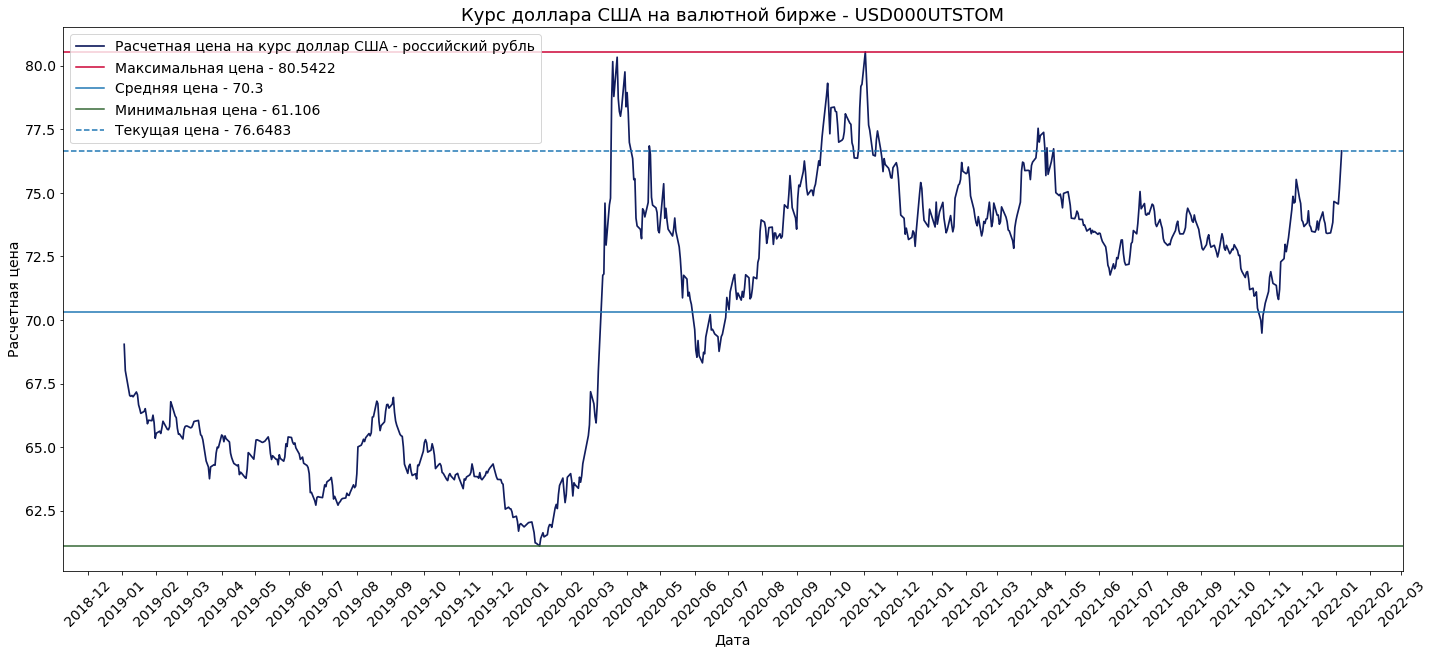

In [151]:
fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(si_df['moment'], si_df['si_price'], label='Расчетная цена на курс доллар США - российский рубль', color='#111d5e', linewidth=1.7)
plt.axhline(y=np.nanmax(si_df['si_price']), label='Максимальная цена - '+str(np.nanmax(si_df['si_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(si_df['si_price']), label='Средняя цена - '+str(round(np.mean(si_df['si_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(si_df['si_price']), label='Минимальная цена - '+str(np.nanmin(si_df['si_price'])), linestyle='-', color='#336633')
plt.axhline(y=si_df['si_price'].iat[-1], label='Текущая цена - '+str(si_df['si_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс доллара США на валютной бирже - USD000UTSTOM', fontsize=18)
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/Si.png')

In [152]:
long_position_si_ind = round(si_df['long_position_si_ind'].iat[-1])
long_position_si_ent = round(si_df['long_position_si_ent'].iat[-1])

long_position_si = pd.DataFrame({'Количество договоров (контрактов)': [long_position_si_ind, long_position_si_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [153]:
short_position_si_ind = round(si_df['short_position_si_ind'].iat[-1])
short_position_si_ent = round(si_df['short_position_si_ent'].iat[-1])

short_position_si = pd.DataFrame({'Количество договоров (контрактов)': [short_position_si_ind, short_position_si_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

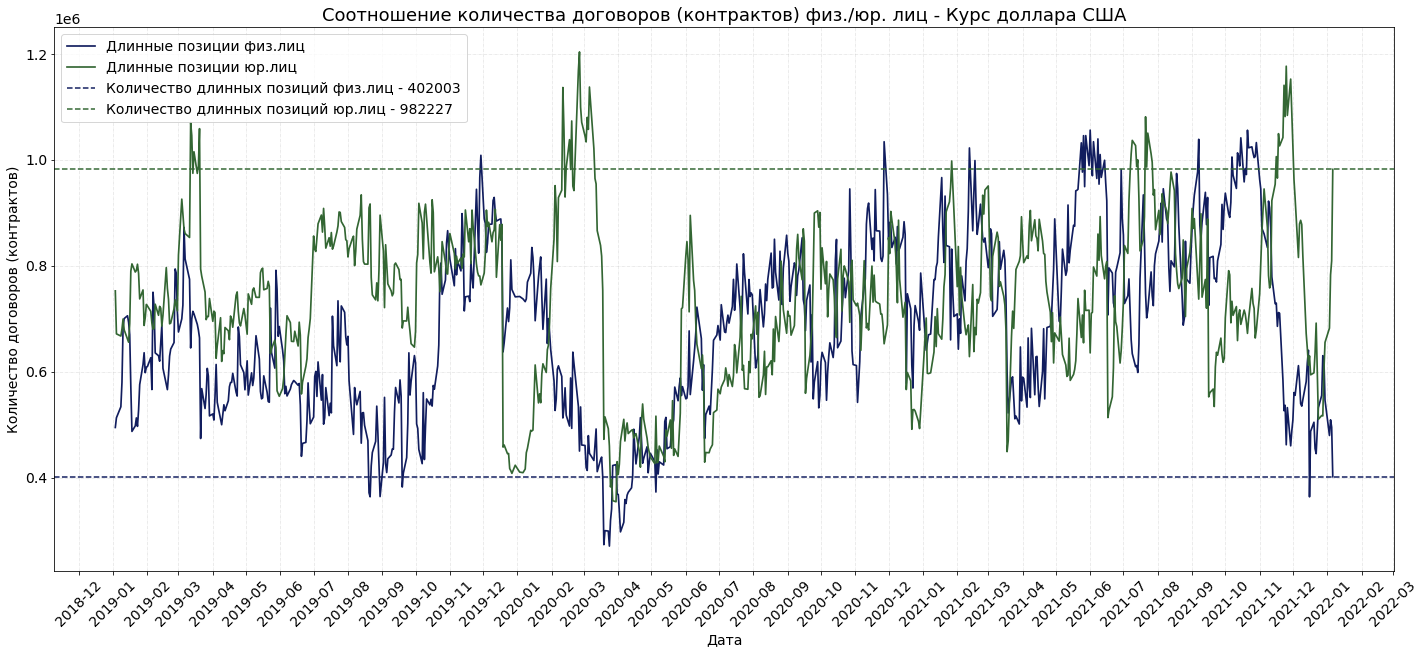

In [154]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_df['moment'], si_df['long_position_si_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(si_df['moment'], si_df['long_position_si_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=si_df['long_position_si_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(si_df['long_position_si_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=si_df['long_position_si_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(si_df['long_position_si_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс доллара США', fontsize=18)
plt.legend()
plt.show()

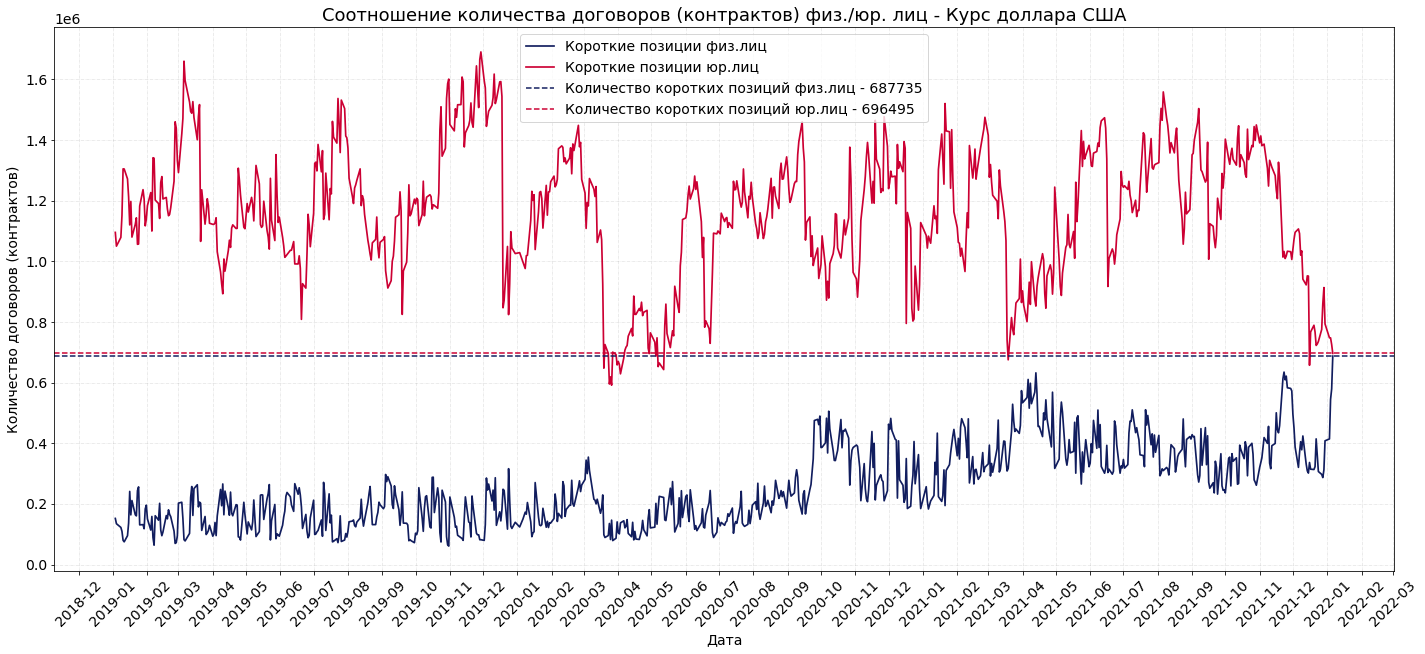

In [155]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_df['moment'], si_df['short_position_si_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(si_df['moment'], si_df['short_position_si_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=si_df['short_position_si_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(si_df['short_position_si_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=si_df['short_position_si_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(si_df['short_position_si_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс доллара США', fontsize=18)
plt.legend()
plt.show()

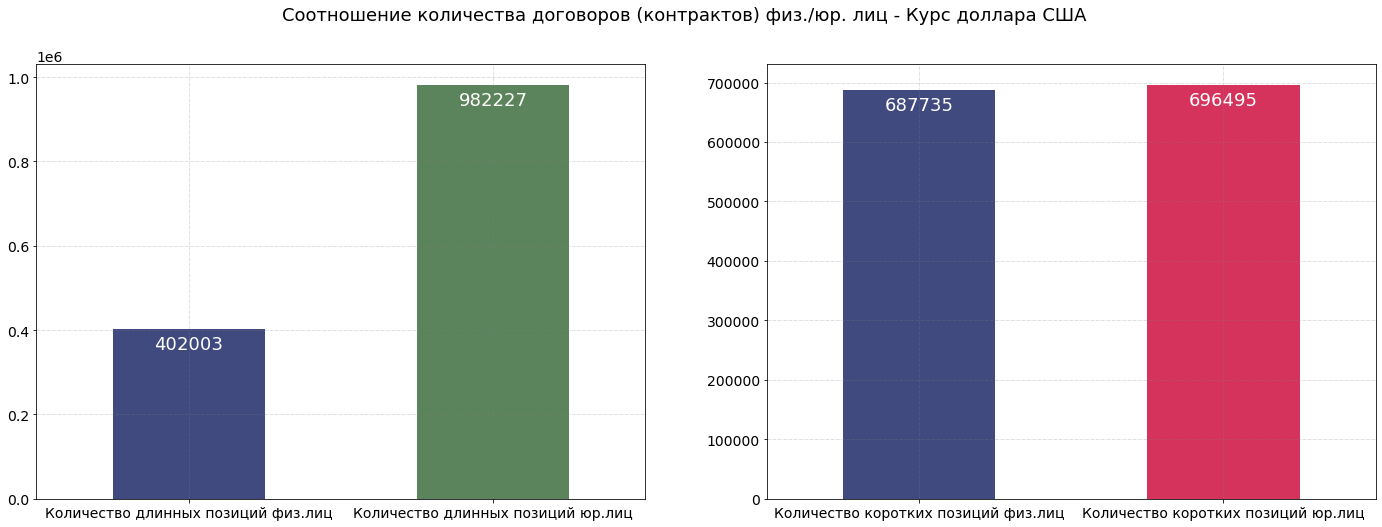

In [156]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_si['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_si['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс доллара США', fontsize=18)
plt.show()

## <a id='402'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a>  
- <a href='#0'>Table of contents</a>  

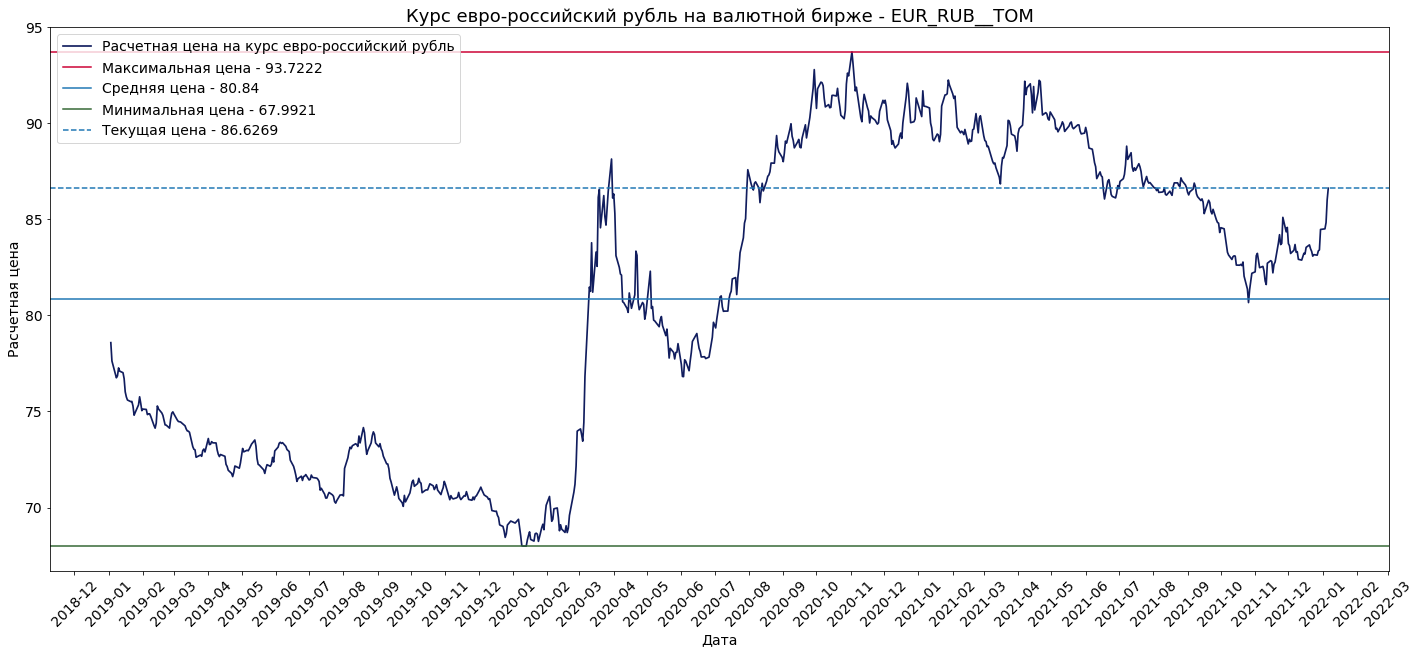

In [157]:
fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(eu_df['moment'], eu_df['eu_price'], label='Расчетная цена на курс евро-российский рубль', color='#111d5e', linewidth=1.7)
plt.axhline(y=np.nanmax(eu_df['eu_price']), label='Максимальная цена - '+str(np.nanmax(eu_df['eu_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(eu_df['eu_price']), label='Средняя цена - '+str(round(np.mean(eu_df['eu_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(eu_df['eu_price']), label='Минимальная цена - '+str(np.nanmin(eu_df['eu_price'])), linestyle='-', color='#336633')
plt.axhline(y=eu_df['eu_price'].iat[-1], label='Текущая цена - '+str(eu_df['eu_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM', fontsize=18)
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/Eu.png')

In [158]:
long_position_eu_ind = round(eu_df['long_position_eu_ind'].iat[-1])
long_position_eu_ent = round(eu_df['long_position_eu_ent'].iat[-1])

long_position_eu = pd.DataFrame({'Количество договоров (контрактов)': [long_position_eu_ind, long_position_eu_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [159]:
short_position_eu_ind = round(eu_df['short_position_eu_ind'].iat[-1])
short_position_eu_ent = round(eu_df['short_position_eu_ent'].iat[-1])

short_position_eu = pd.DataFrame({'Количество договоров (контрактов)': [short_position_eu_ind, short_position_eu_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

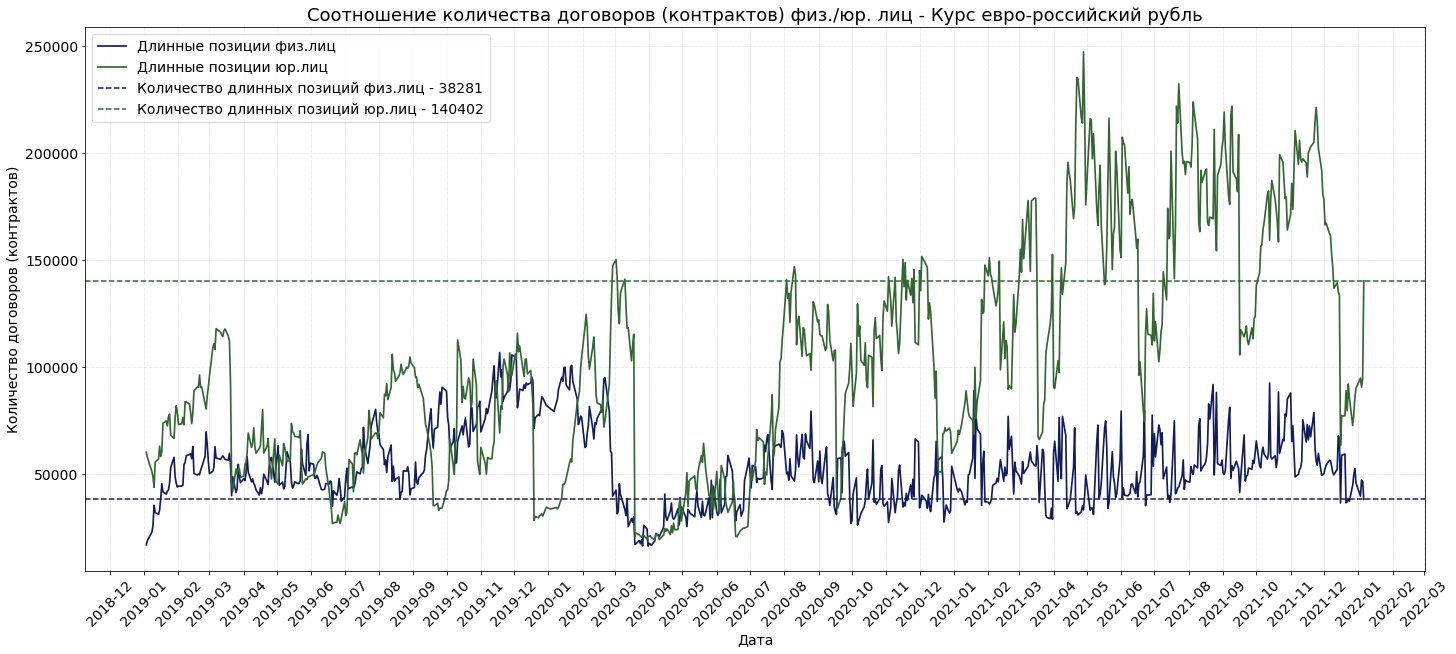

In [160]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(eu_df['moment'], eu_df['long_position_eu_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(eu_df['moment'], eu_df['long_position_eu_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=eu_df['long_position_eu_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(eu_df['long_position_eu_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=eu_df['long_position_eu_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(eu_df['long_position_eu_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс евро-российский рубль', fontsize=18)
plt.legend()
plt.show()

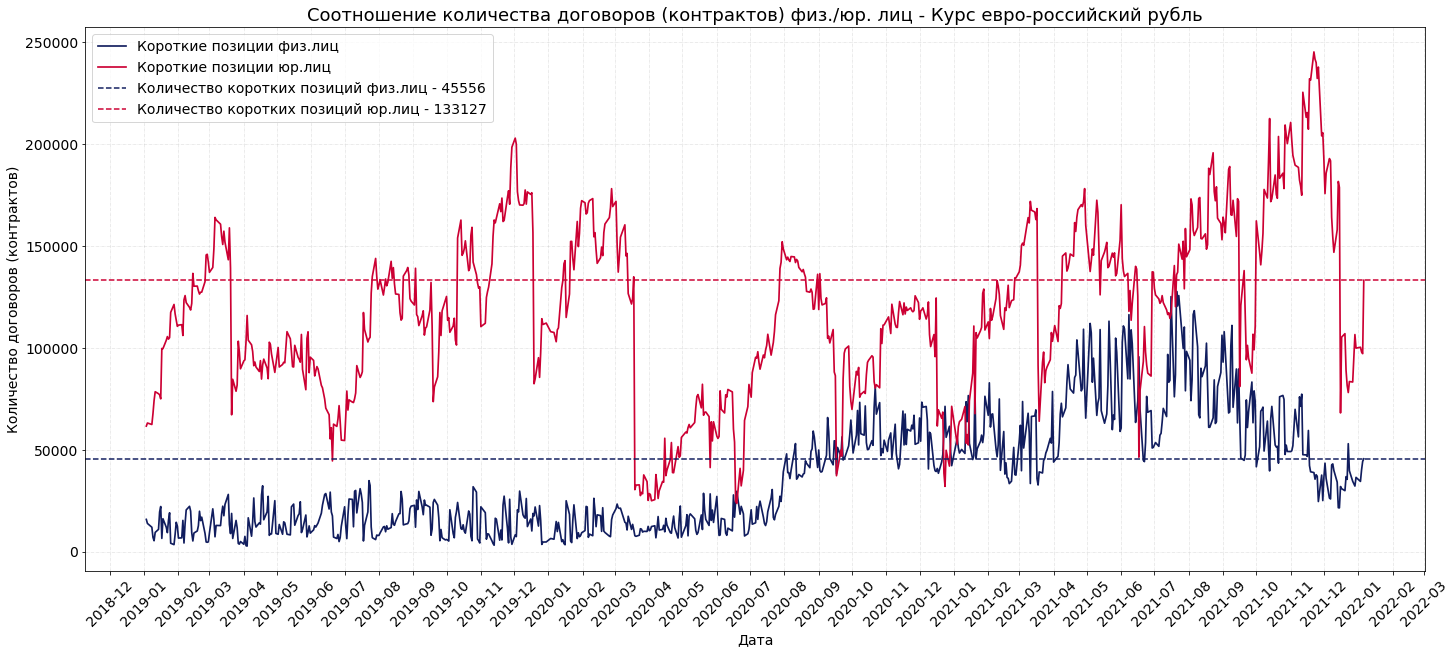

In [161]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(eu_df['moment'], eu_df['short_position_eu_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(eu_df['moment'], eu_df['short_position_eu_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=eu_df['short_position_eu_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(eu_df['short_position_eu_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=eu_df['short_position_eu_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(eu_df['short_position_eu_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс евро-российский рубль', fontsize=18)
plt.legend()
plt.show()

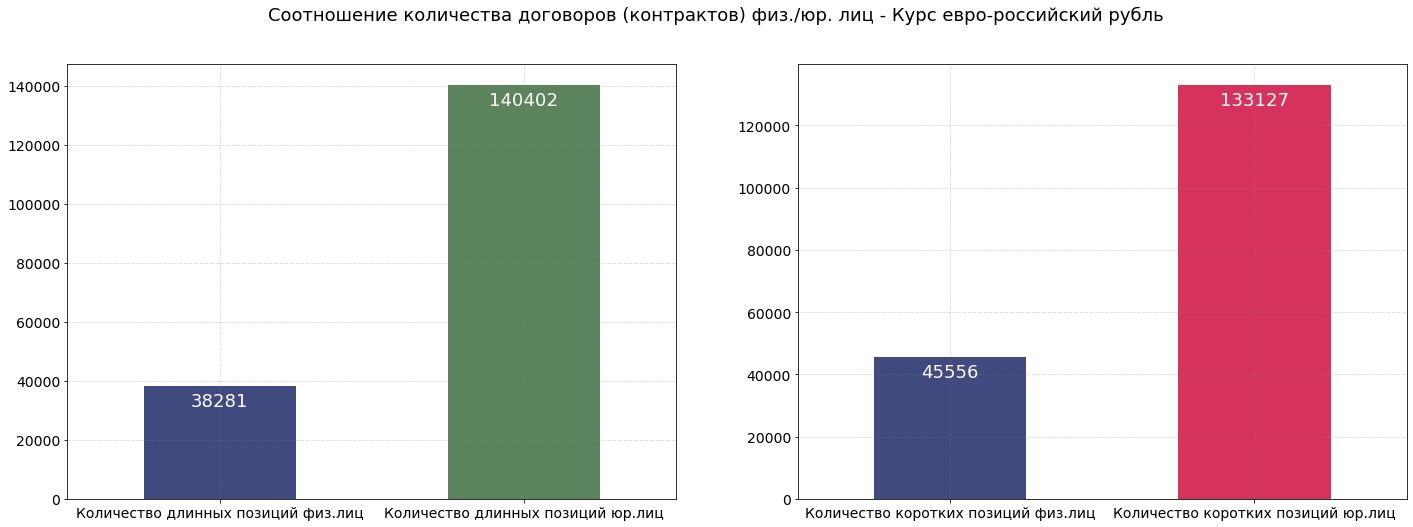

In [162]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_eu['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_eu['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс евро-российский рубль', fontsize=18)
plt.show()

## <a id='403'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>  
- <a href='#0'>Table of contents</a>  

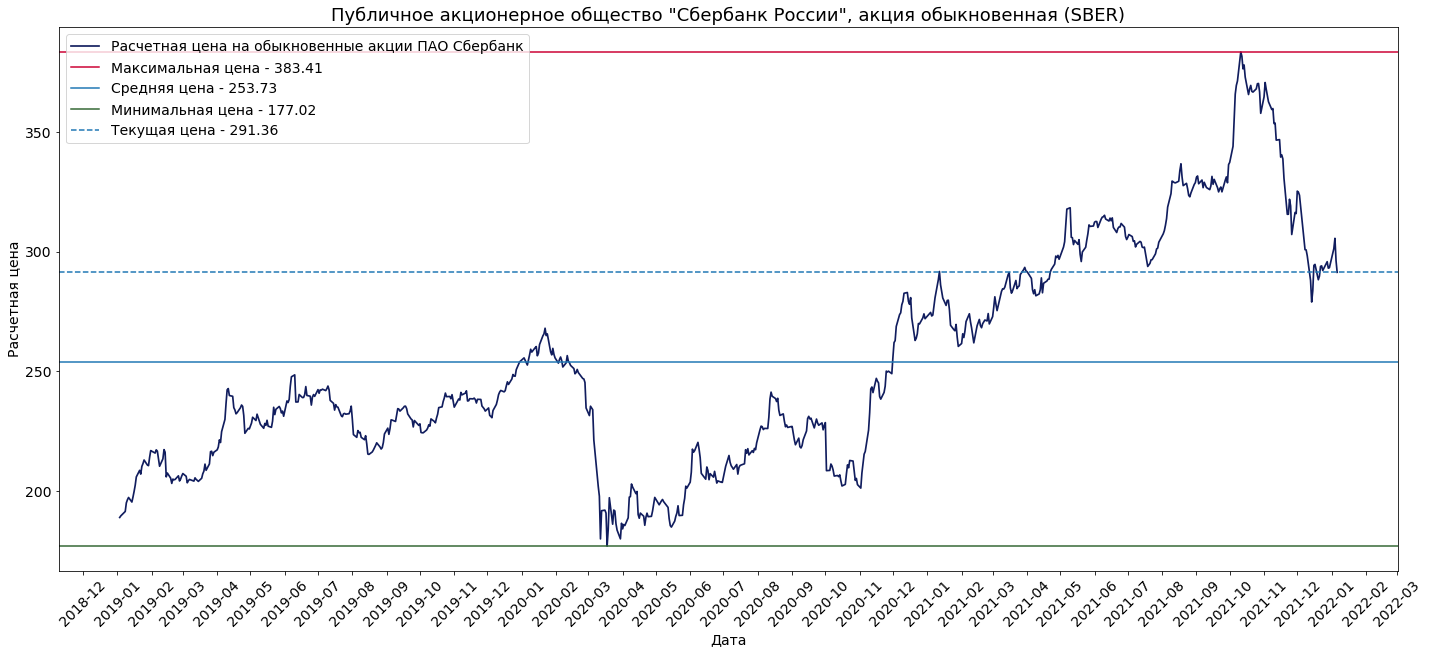

In [163]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_df['moment'], sber_df['sber_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО Сбербанк', linewidth=1.7)
plt.axhline(y=np.nanmax(sber_df['sber_price']), label='Максимальная цена - '+str(np.nanmax(sber_df['sber_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(sber_df['sber_price']), label='Средняя цена - '+str(round(np.mean(sber_df['sber_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(sber_df['sber_price']), label='Минимальная цена - '+str(np.nanmin(sber_df['sber_price'])), linestyle='-', color='#336633')
plt.axhline(y=sber_df['sber_price'].iat[-1], label='Текущая цена - '+str(sber_df['sber_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)', fontsize=18)
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/SBRF.png')

In [164]:
long_position_sbrf_ind = round(sber_df['long_position_sbrf_ind'].iat[-1])
long_position_sbrf_ent = round(sber_df['long_position_sbrf_ent'].iat[-1])

long_position_sbrf = pd.DataFrame({'Количество договоров (контрактов)': [long_position_sbrf_ind, long_position_sbrf_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [165]:
short_position_sbrf_ind = round(sber_df['short_position_sbrf_ind'].iat[-1])
short_position_sbrf_ent = round(sber_df['short_position_sbrf_ent'].iat[-1])

short_position_sbrf = pd.DataFrame({'Количество договоров (контрактов)': [short_position_sbrf_ind, short_position_sbrf_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

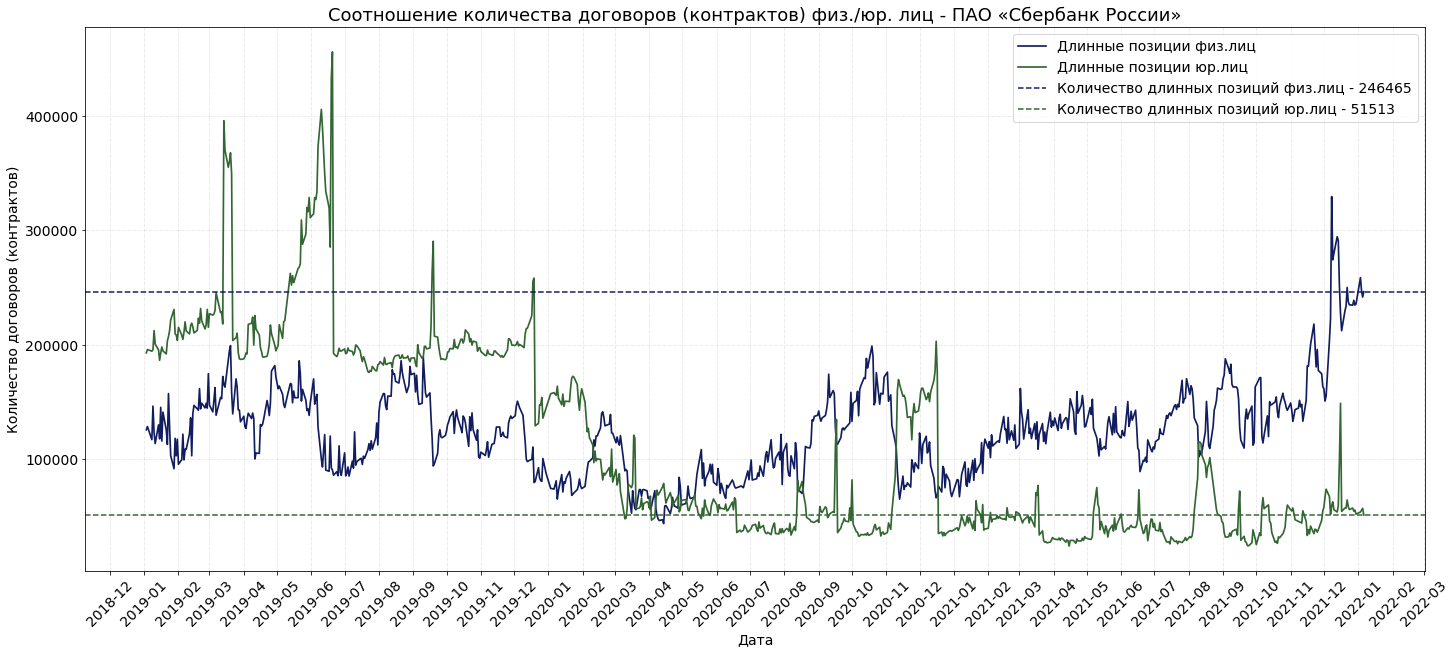

In [166]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_df['moment'], sber_df['long_position_sbrf_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(sber_df['moment'], sber_df['long_position_sbrf_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=sber_df['long_position_sbrf_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(sber_df['long_position_sbrf_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=sber_df['long_position_sbrf_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(sber_df['long_position_sbrf_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Сбербанк России»', fontsize=18)
plt.legend()
plt.show()

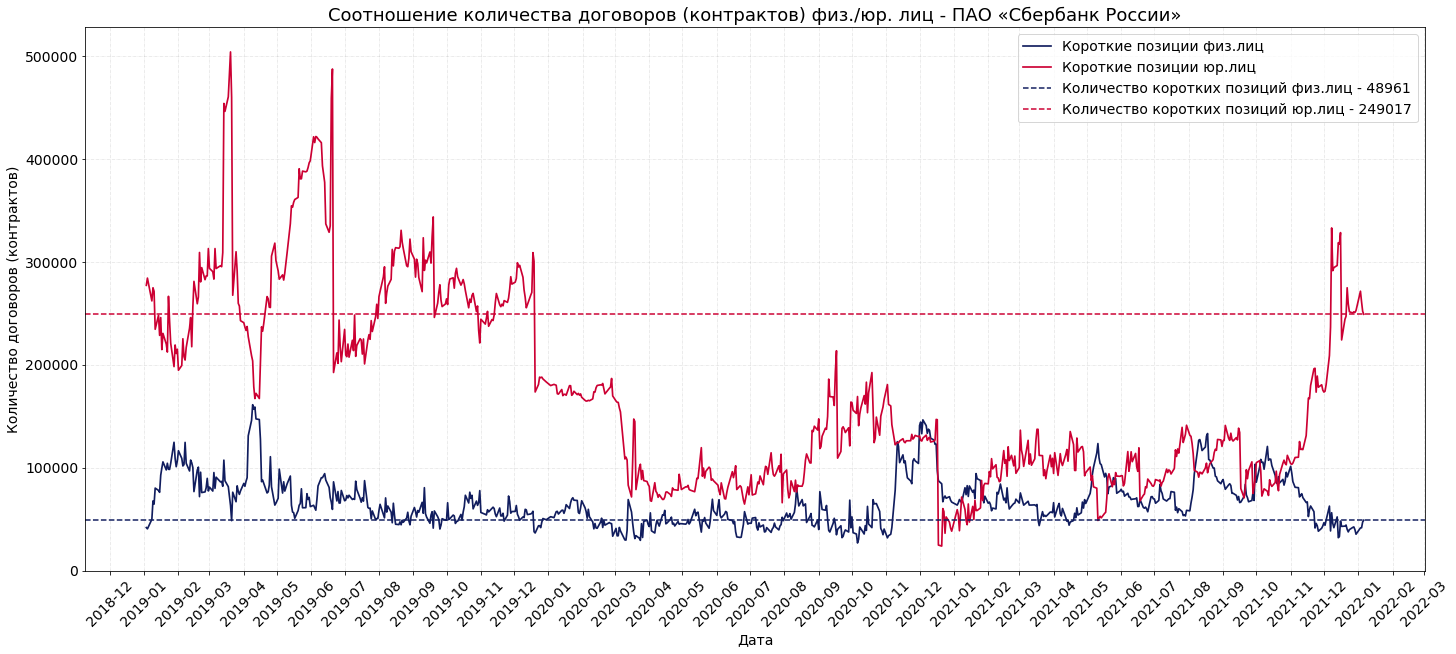

In [167]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_df['moment'], sber_df['short_position_sbrf_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(sber_df['moment'], sber_df['short_position_sbrf_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=sber_df['short_position_sbrf_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(sber_df['short_position_sbrf_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=sber_df['short_position_sbrf_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(sber_df['short_position_sbrf_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Сбербанк России»', fontsize=18)
plt.legend()
plt.show()

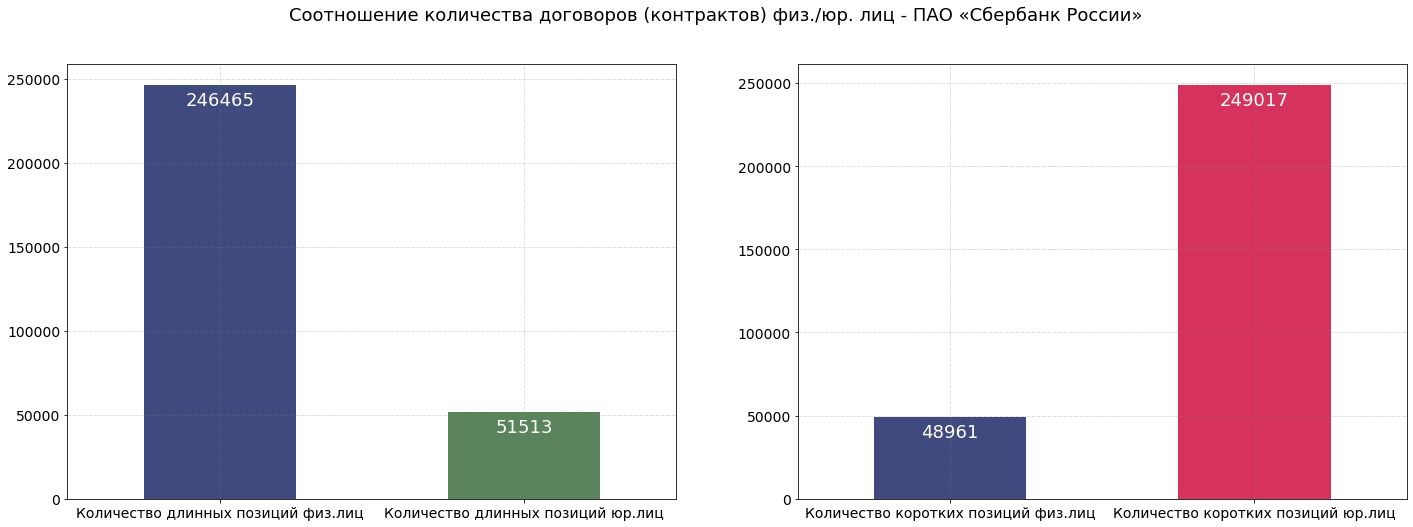

In [168]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_sbrf['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_sbrf['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Сбербанк России»', fontsize=18)
plt.show()

## <a id='404'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a>  
- <a href='#0'>Table of contents</a>  

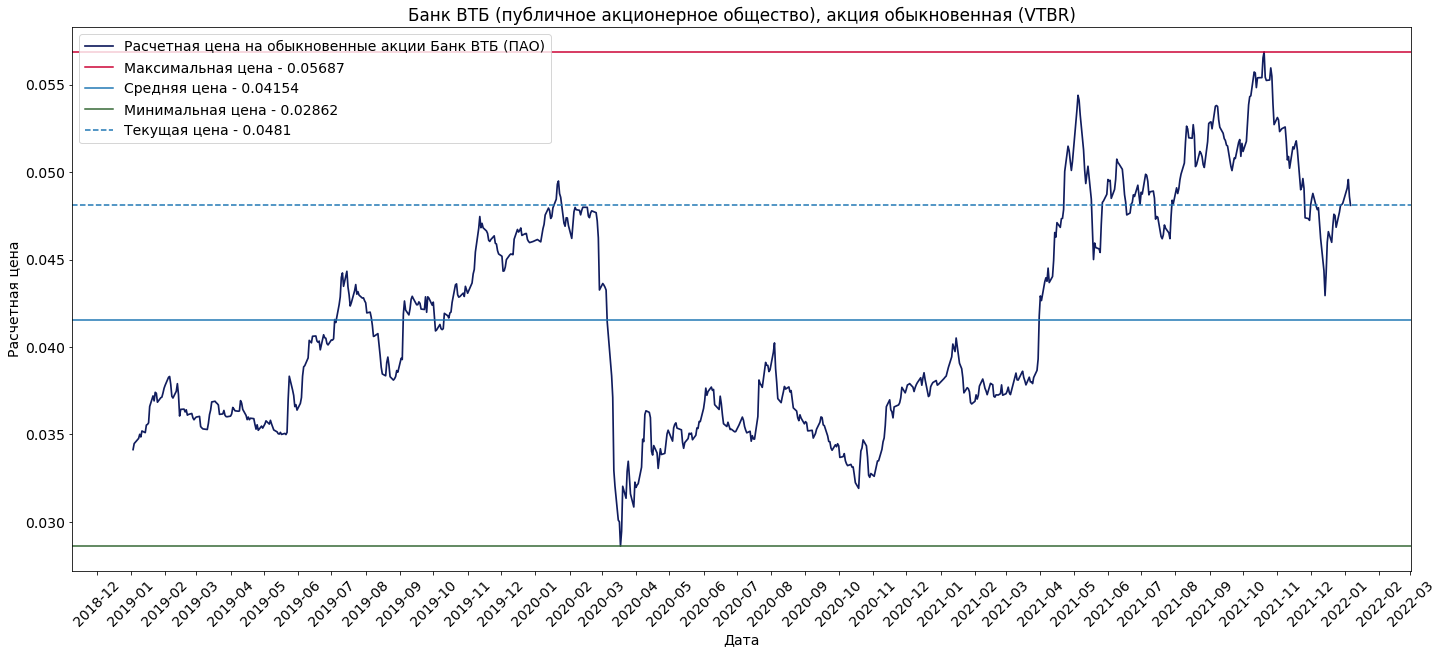

In [169]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], vtbr_df['vtbr_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции Банк ВТБ (ПАО)', linewidth=1.7)
plt.axhline(y=np.nanmax(vtbr_df['vtbr_price']), label='Максимальная цена - '+str(np.nanmax(vtbr_df['vtbr_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(vtbr_df['vtbr_price']), label='Средняя цена - '+str(round(np.mean(vtbr_df['vtbr_price']), 5)), linestyle='-')
plt.axhline(y=np.nanmin(vtbr_df['vtbr_price']), label='Минимальная цена - '+str(np.nanmin(vtbr_df['vtbr_price'])), linestyle='-', color='#336633')
plt.axhline(y=vtbr_df['vtbr_price'].iat[-1], label='Текущая цена - '+str(vtbr_df['vtbr_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/VTBR.png')

In [170]:
long_position_vtbr_ind = round(vtbr_df['long_position_vtbr_ind'].iat[-1])
long_position_vtbr_ent = round(vtbr_df['long_position_vtbr_ent'].iat[-1])

long_position_vtbr = pd.DataFrame({'Количество договоров (контрактов)': [long_position_vtbr_ind, long_position_vtbr_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [171]:
short_position_vtbr_ind = round(vtbr_df['short_position_vtbr_ind'].iat[-1])
short_position_vtbr_ent = round(vtbr_df['short_position_vtbr_ent'].iat[-1])

short_position_vtbr = pd.DataFrame({'Количество договоров (контрактов)': [short_position_vtbr_ind, short_position_vtbr_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

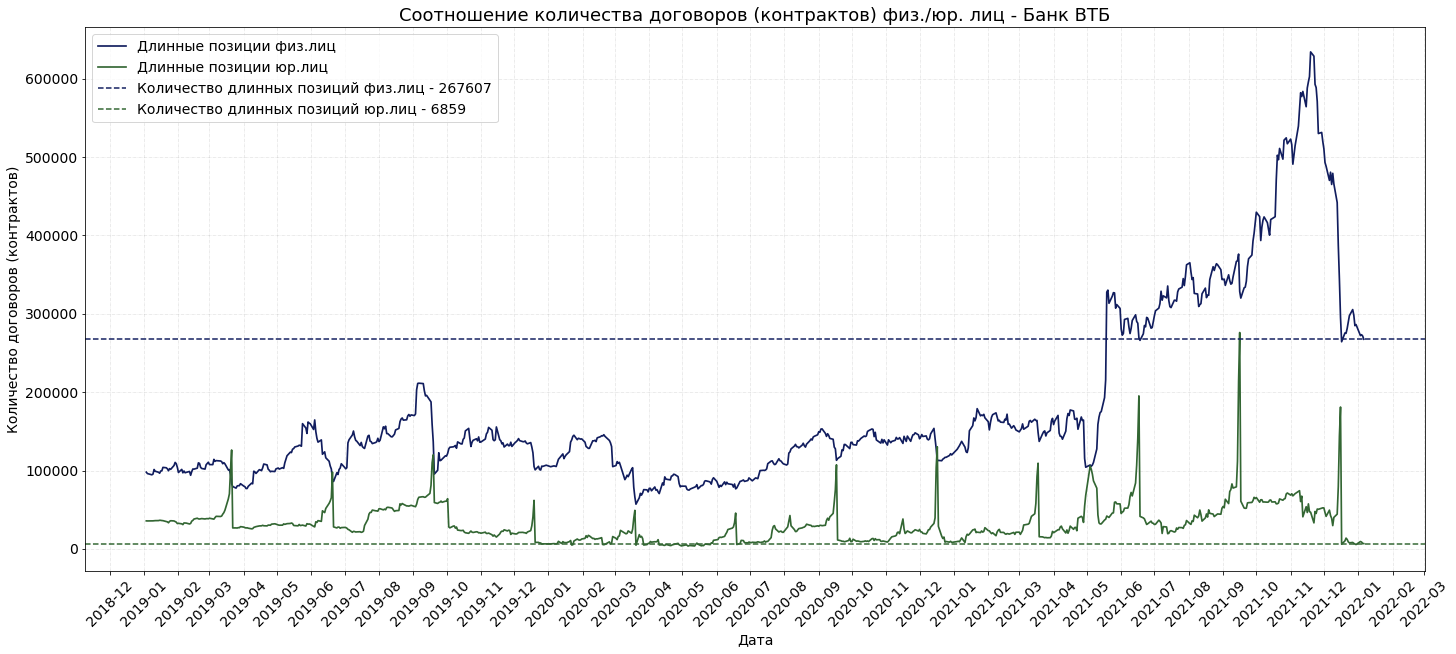

In [172]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], vtbr_df['long_position_vtbr_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], vtbr_df['long_position_vtbr_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=vtbr_df['long_position_vtbr_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(vtbr_df['long_position_vtbr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=vtbr_df['long_position_vtbr_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(vtbr_df['long_position_vtbr_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Банк ВТБ', fontsize=18)
plt.legend()
plt.show()

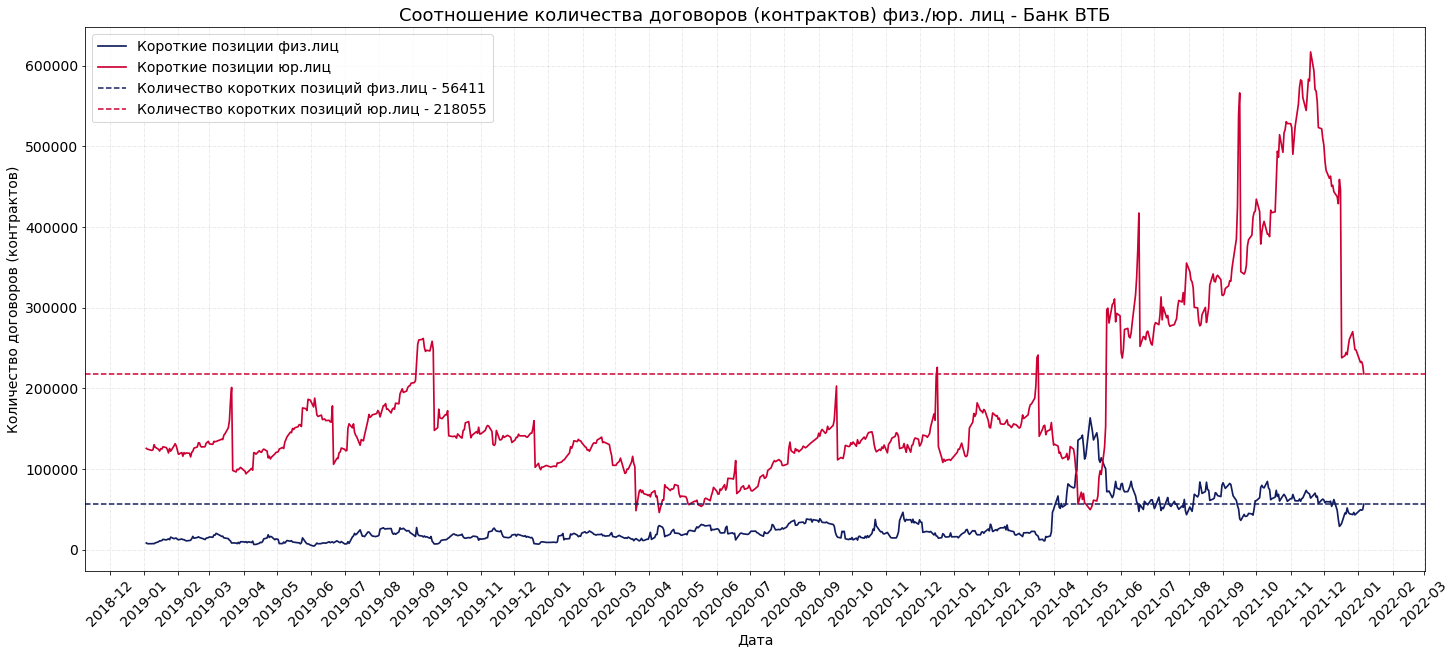

In [173]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], vtbr_df['short_position_vtbr_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], vtbr_df['short_position_vtbr_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=vtbr_df['short_position_vtbr_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(vtbr_df['short_position_vtbr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=vtbr_df['short_position_vtbr_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(vtbr_df['short_position_vtbr_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Банк ВТБ', fontsize=18)
plt.legend()
plt.show()

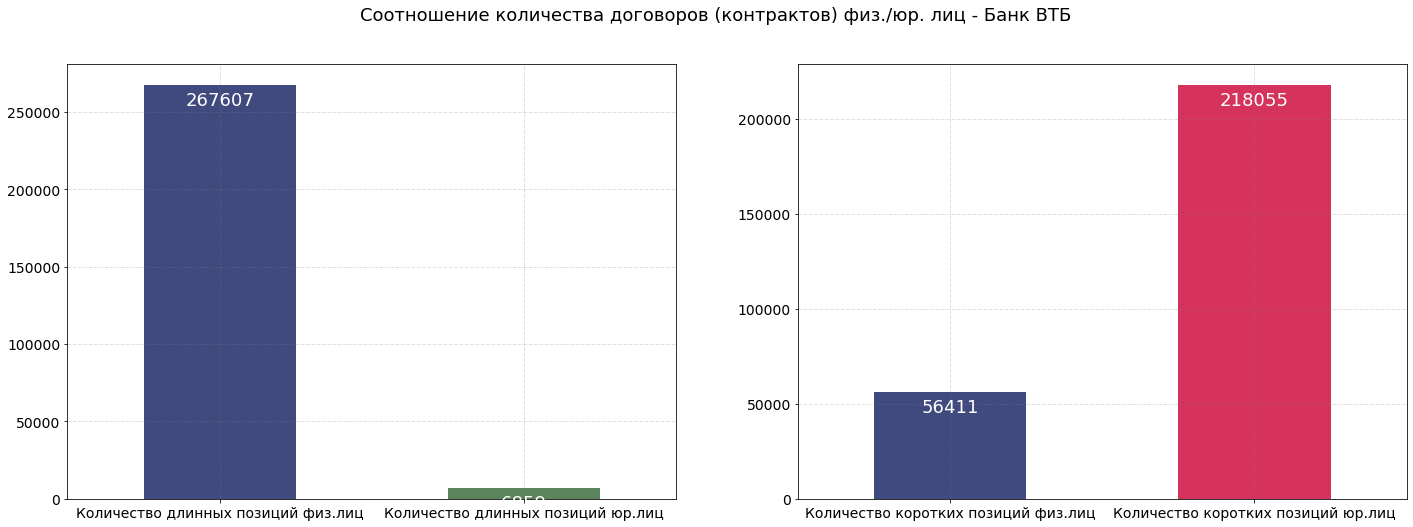

In [174]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_vtbr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_vtbr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - Банк ВТБ', fontsize=18)
plt.show()

## <a id='405'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a>  
- <a href='#0'>Table of contents</a>  

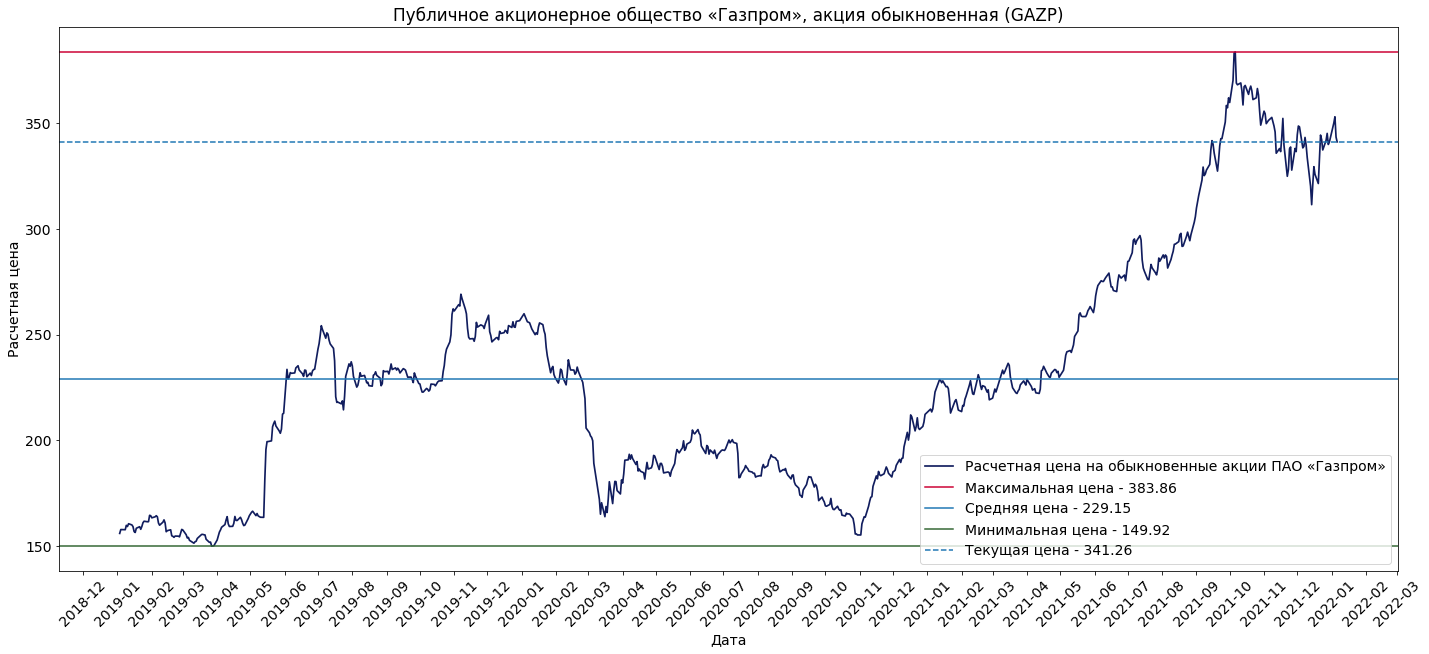

In [175]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_df['moment'], gazr_df['gazr_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «Газпром»', linewidth=1.7)
plt.axhline(y=np.nanmax(gazr_df['gazr_price']), label='Максимальная цена - '+str(np.nanmax(gazr_df['gazr_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(gazr_df['gazr_price']), label='Средняя цена - '+str(round(np.mean(gazr_df['gazr_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(gazr_df['gazr_price']), label='Минимальная цена - '+str(np.nanmin(gazr_df['gazr_price'])), linestyle='-', color='#336633')
plt.axhline(y=gazr_df['gazr_price'].iat[-1], label='Текущая цена - '+str(gazr_df['gazr_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество «Газпром», акция обыкновенная (GAZP)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/GAZP.png')

In [176]:
long_position_gazr_ind = round(gazr_df['long_position_gazr_ind'].iat[-1])
long_position_gazr_ent = round(gazr_df['long_position_gazr_ent'].iat[-1])

long_position_gazr = pd.DataFrame({'Количество договоров (контрактов)': [long_position_gazr_ind, long_position_gazr_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [177]:
short_position_gazr_ind = round(gazr_df['short_position_gazr_ind'].iat[-1])
short_position_gazr_ent = round(gazr_df['short_position_gazr_ent'].iat[-1])

short_position_gazr = pd.DataFrame({'Количество договоров (контрактов)': [short_position_gazr_ind, short_position_gazr_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

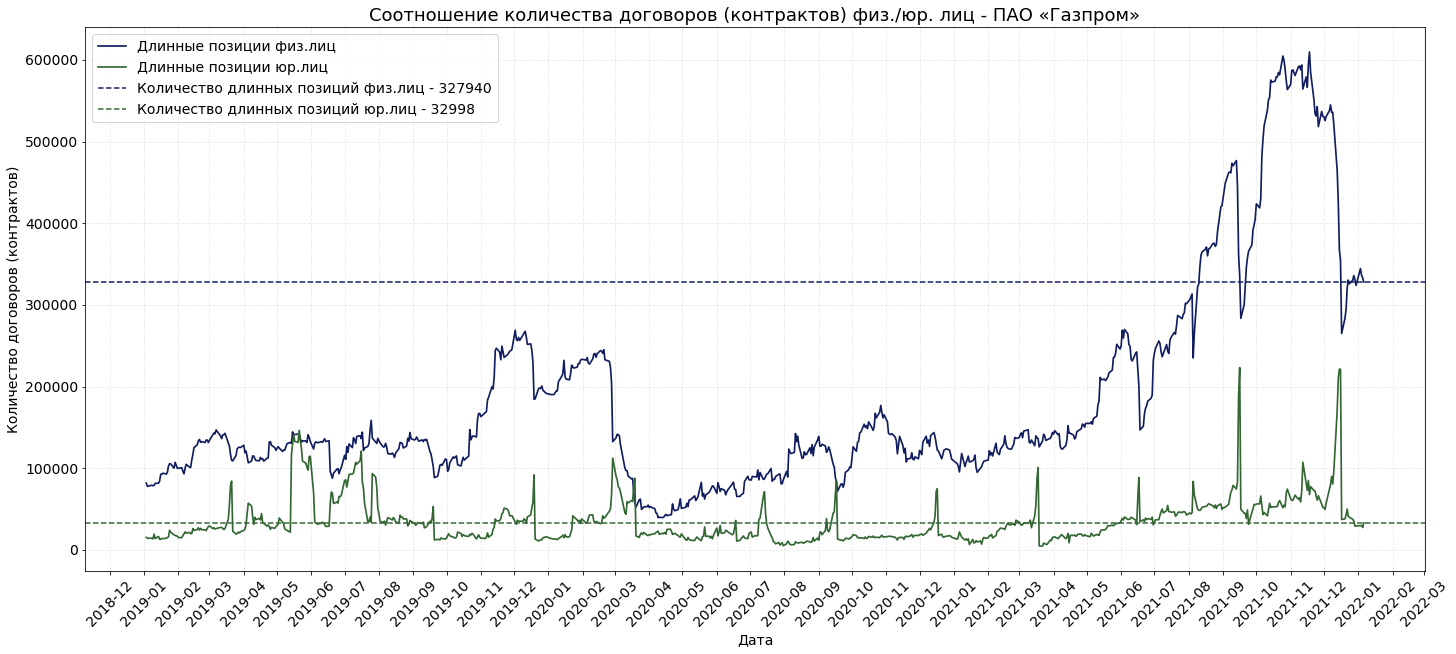

In [178]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_df['moment'], gazr_df['long_position_gazr_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(gazr_df['moment'], gazr_df['long_position_gazr_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gazr_df['long_position_gazr_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(gazr_df['long_position_gazr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gazr_df['long_position_gazr_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(gazr_df['long_position_gazr_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Газпром»', fontsize=18)
plt.legend()
plt.show()

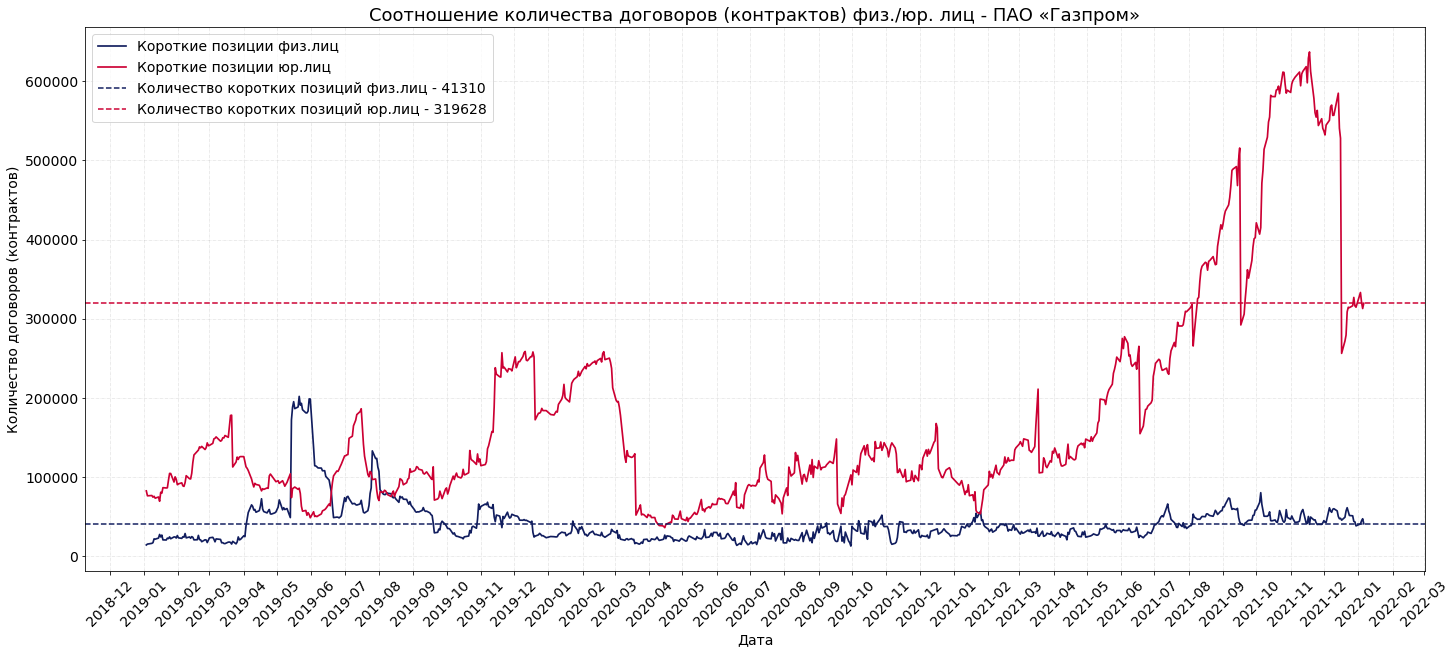

In [179]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_df['moment'], gazr_df['short_position_gazr_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(gazr_df['moment'], gazr_df['short_position_gazr_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gazr_df['short_position_gazr_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(gazr_df['short_position_gazr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gazr_df['short_position_gazr_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(gazr_df['short_position_gazr_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Газпром»', fontsize=18)
plt.legend()
plt.show()

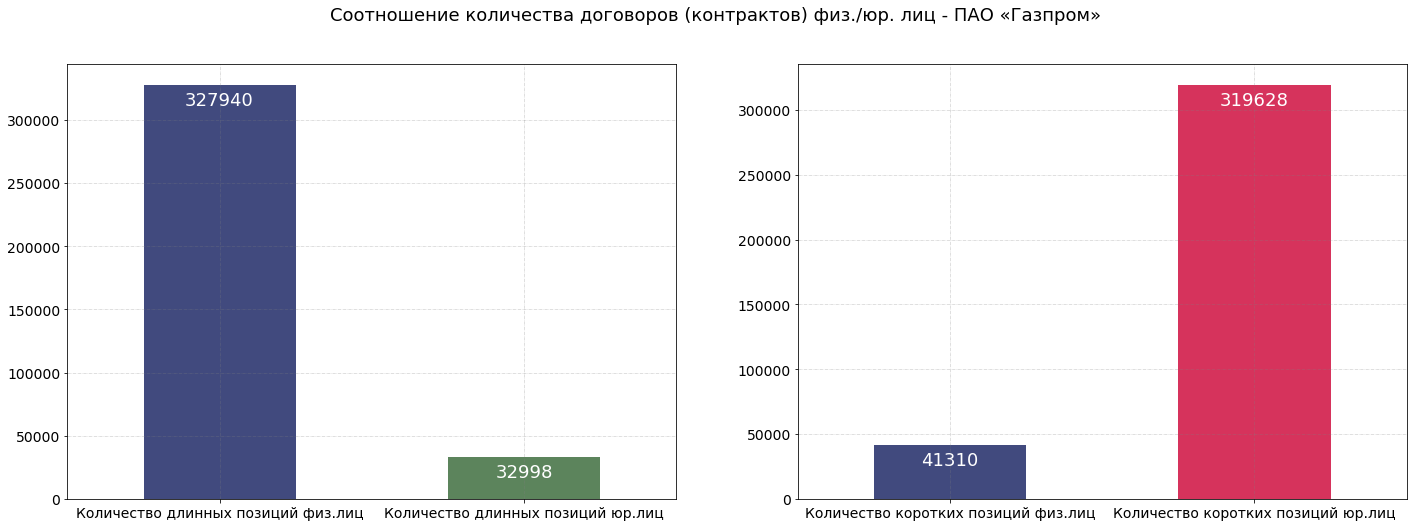

In [180]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_gazr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_gazr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Газпром»', fontsize=18)
plt.show()

## <a id='406'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>  
- <a href='#0'>Table of contents</a>  

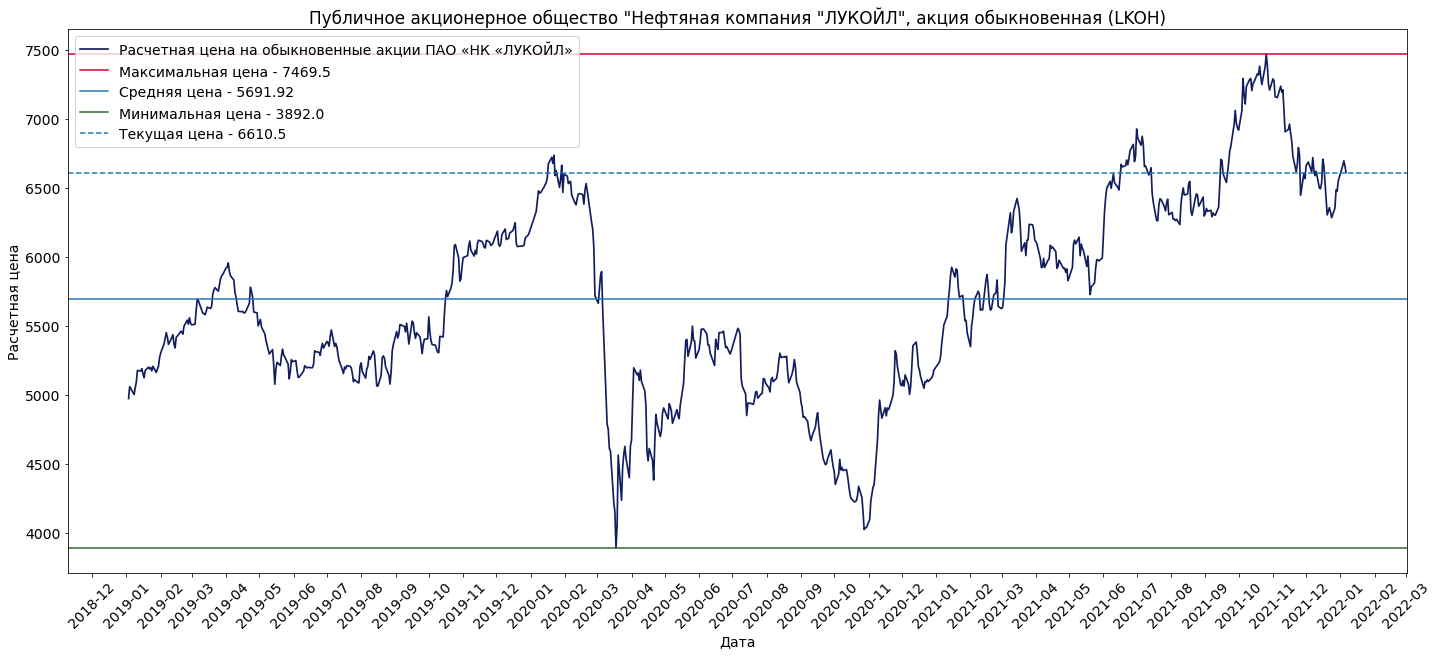

In [181]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(lkoh_df['moment'], lkoh_df['lkoh_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «НК «ЛУКОЙЛ»', linewidth=1.7)
plt.axhline(y=np.nanmax(lkoh_df['lkoh_price']), label='Максимальная цена - '+str(np.nanmax(lkoh_df['lkoh_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(lkoh_df['lkoh_price']), label='Средняя цена - '+str(round(np.mean(lkoh_df['lkoh_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(lkoh_df['lkoh_price']), label='Минимальная цена - '+str(np.nanmin(lkoh_df['lkoh_price'])), linestyle='-', color='#336633')
plt.axhline(y=lkoh_df['lkoh_price'].iat[-1], label='Текущая цена - '+str(lkoh_df['lkoh_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/LKOH.png')

In [182]:
long_position_lkoh_ind = round(lkoh_df['long_position_lkoh_ind'].iat[-1])
long_position_lkoh_ent = round(lkoh_df['long_position_lkoh_ent'].iat[-1])

long_position_lkoh = pd.DataFrame({'Количество договоров (контрактов)': [long_position_lkoh_ind, long_position_lkoh_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [183]:
short_position_lkoh_ind = round(lkoh_df['short_position_lkoh_ind'].iat[-1])
short_position_lkoh_ent = round(lkoh_df['short_position_lkoh_ent'].iat[-1])

short_position_lkoh = pd.DataFrame({'Количество договоров (контрактов)': [short_position_lkoh_ind, short_position_lkoh_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

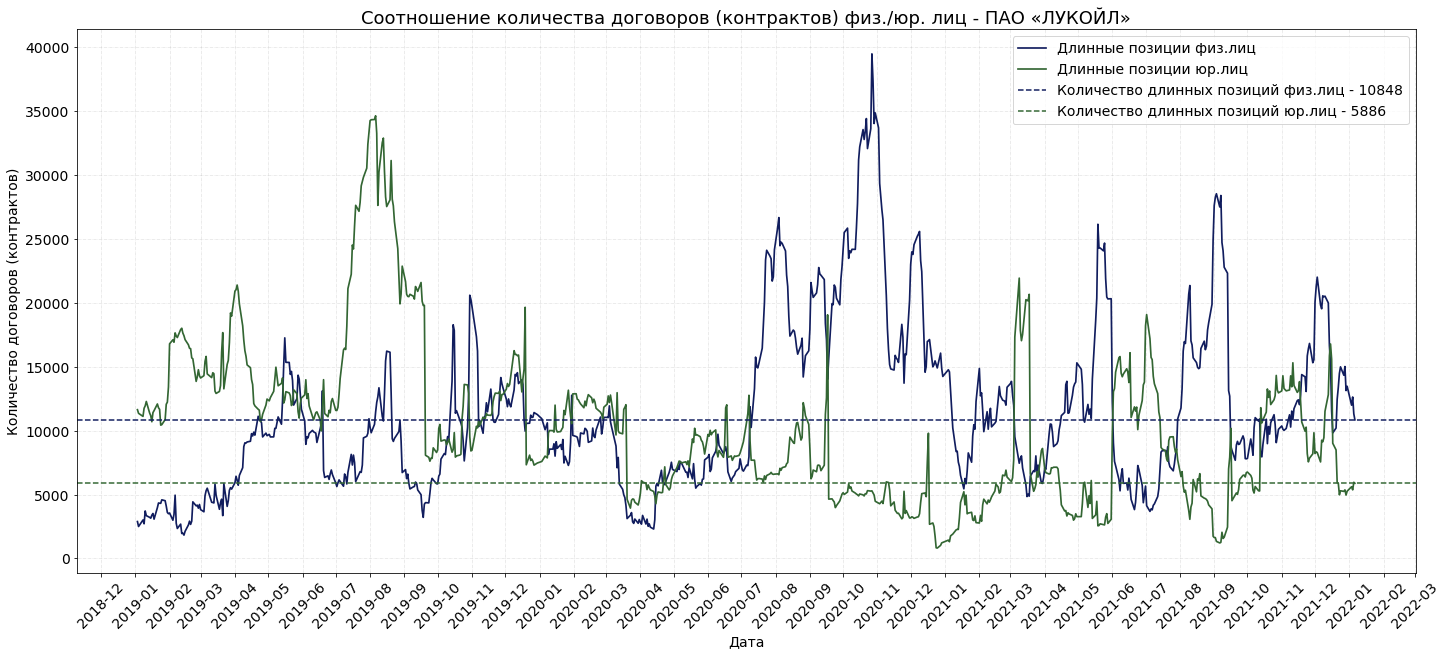

In [184]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(lkoh_df['moment'], lkoh_df['long_position_lkoh_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(lkoh_df['moment'], lkoh_df['long_position_lkoh_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=lkoh_df['long_position_lkoh_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(lkoh_df['long_position_lkoh_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=lkoh_df['long_position_lkoh_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(lkoh_df['long_position_lkoh_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ЛУКОЙЛ»', fontsize=18)
plt.legend()
plt.show()

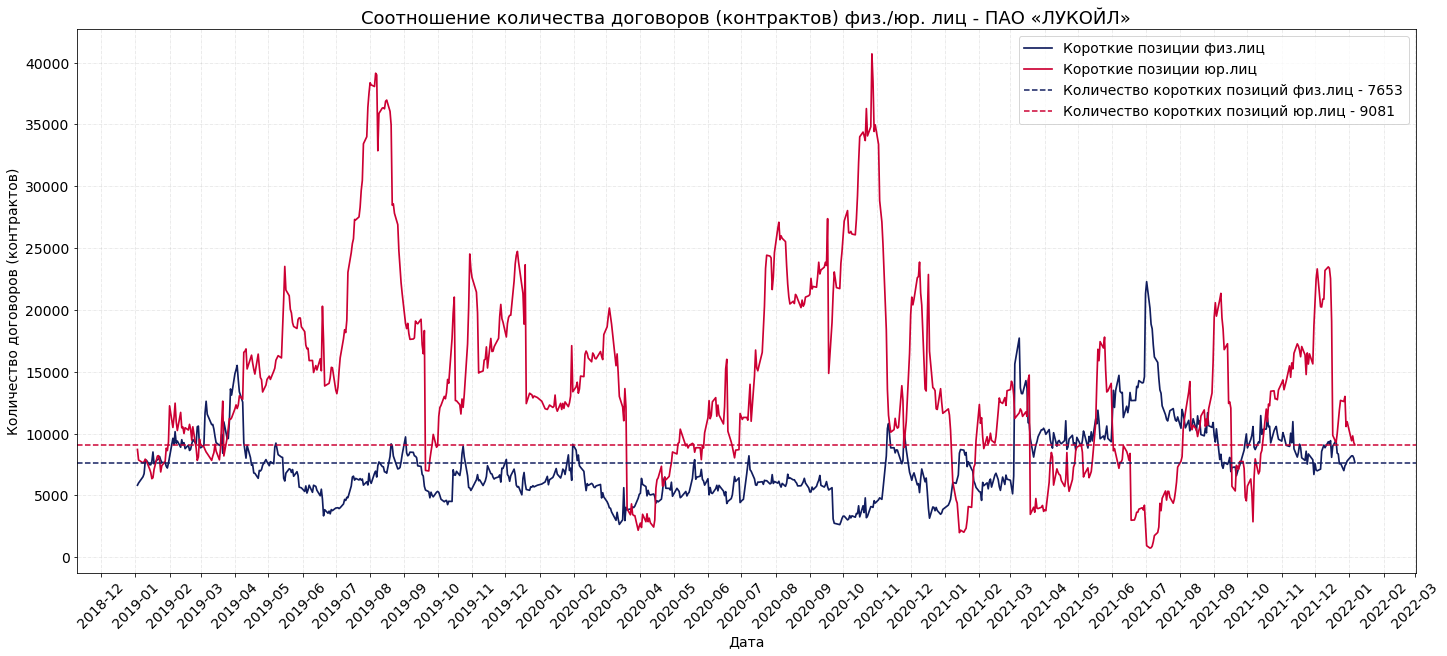

In [185]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(lkoh_df['moment'], lkoh_df['short_position_lkoh_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(lkoh_df['moment'], lkoh_df['short_position_lkoh_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=lkoh_df['short_position_lkoh_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(lkoh_df['short_position_lkoh_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=lkoh_df['short_position_lkoh_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(lkoh_df['short_position_lkoh_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ЛУКОЙЛ»', fontsize=18)
plt.legend()
plt.show()

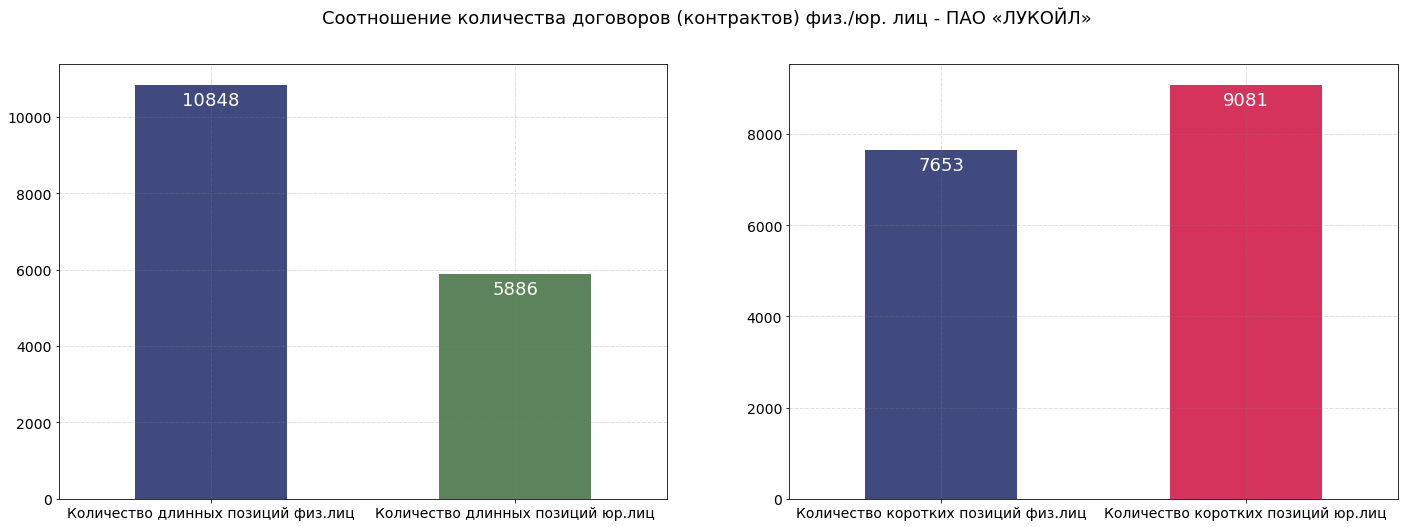

In [186]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_lkoh['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_lkoh['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ЛУКОЙЛ»', fontsize=18)
plt.show()

## <a id='407'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>  
- <a href='#0'>Table of contents</a>  

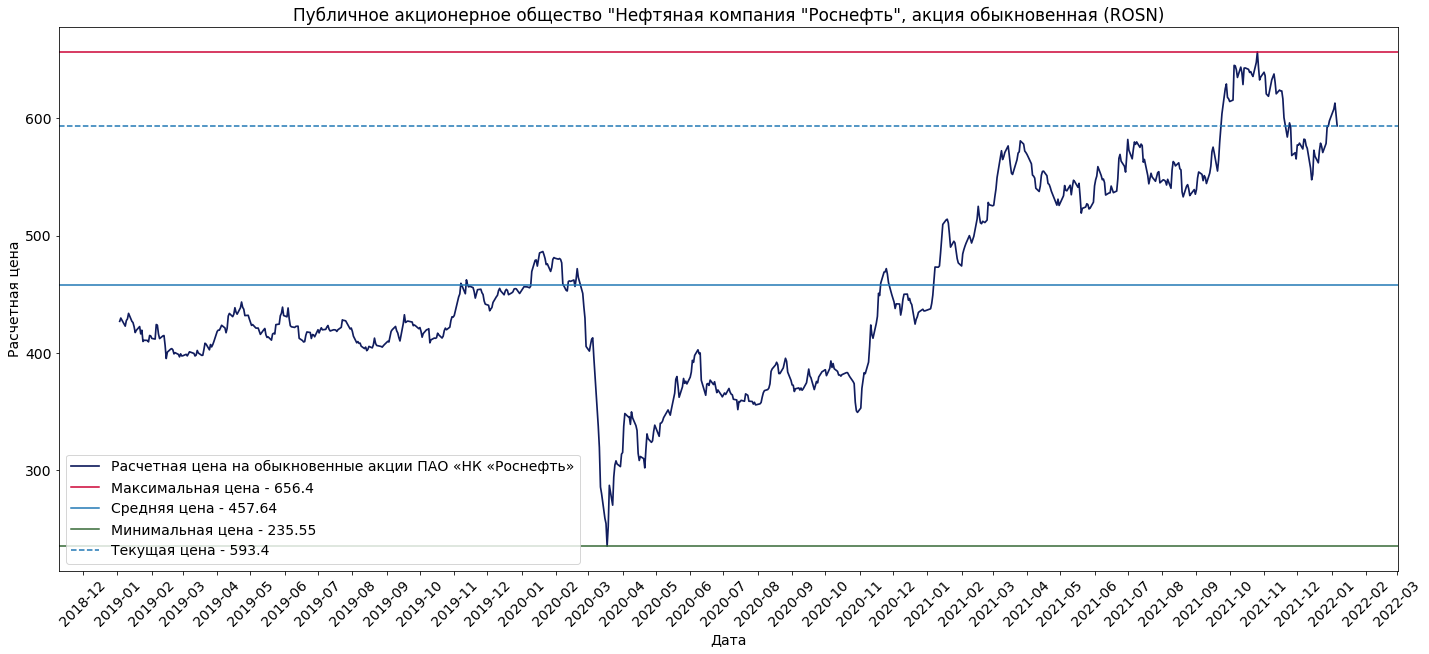

In [187]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(rosn_df['moment'], rosn_df['rosn_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «НК «Роснефть»', linewidth=1.7)
plt.axhline(y=np.nanmax(rosn_df['rosn_price']), label='Максимальная цена - '+str(np.nanmax(rosn_df['rosn_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(rosn_df['rosn_price']), label='Средняя цена - '+str(round(np.mean(rosn_df['rosn_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(rosn_df['rosn_price']), label='Минимальная цена - '+str(np.nanmin(rosn_df['rosn_price'])), linestyle='-', color='#336633')
plt.axhline(y=rosn_df['rosn_price'].iat[-1], label='Текущая цена - '+str(rosn_df['rosn_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/ROSN.png')

In [188]:
long_position_rosn_ind = round(rosn_df['long_position_rosn_ind'].iat[-1])
long_position_rosn_ent = round(rosn_df['long_position_rosn_ent'].iat[-1])

long_position_rosn = pd.DataFrame({'Количество договоров (контрактов)': [long_position_rosn_ind, long_position_rosn_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [189]:
short_position_rosn_ind = round(rosn_df['short_position_rosn_ind'].iat[-1])
short_position_rosn_ent = round(rosn_df['short_position_rosn_ent'].iat[-1])

short_position_rosn = pd.DataFrame({'Количество договоров (контрактов)': [short_position_rosn_ind, short_position_rosn_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

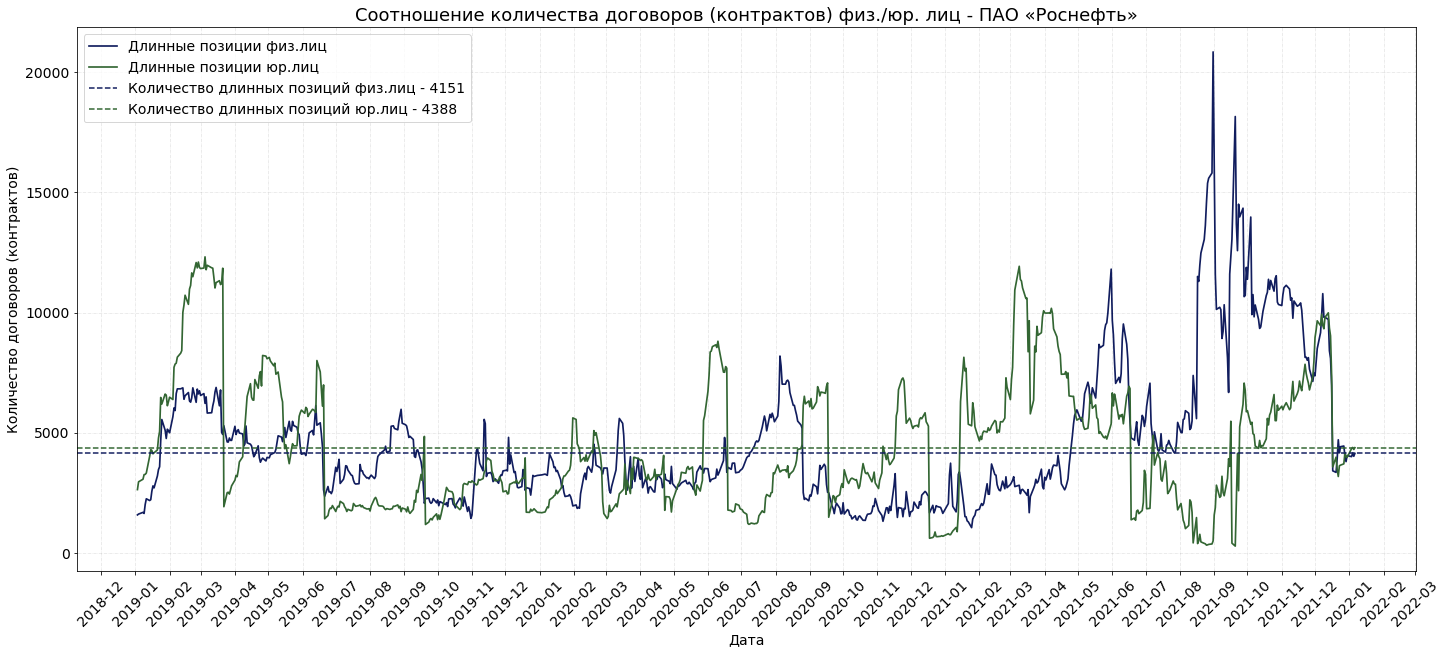

In [190]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(rosn_df['moment'], rosn_df['long_position_rosn_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(rosn_df['moment'], rosn_df['long_position_rosn_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=rosn_df['long_position_rosn_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(rosn_df['long_position_rosn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=rosn_df['long_position_rosn_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(rosn_df['long_position_rosn_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Роснефть»', fontsize=18)
plt.legend()
plt.show()

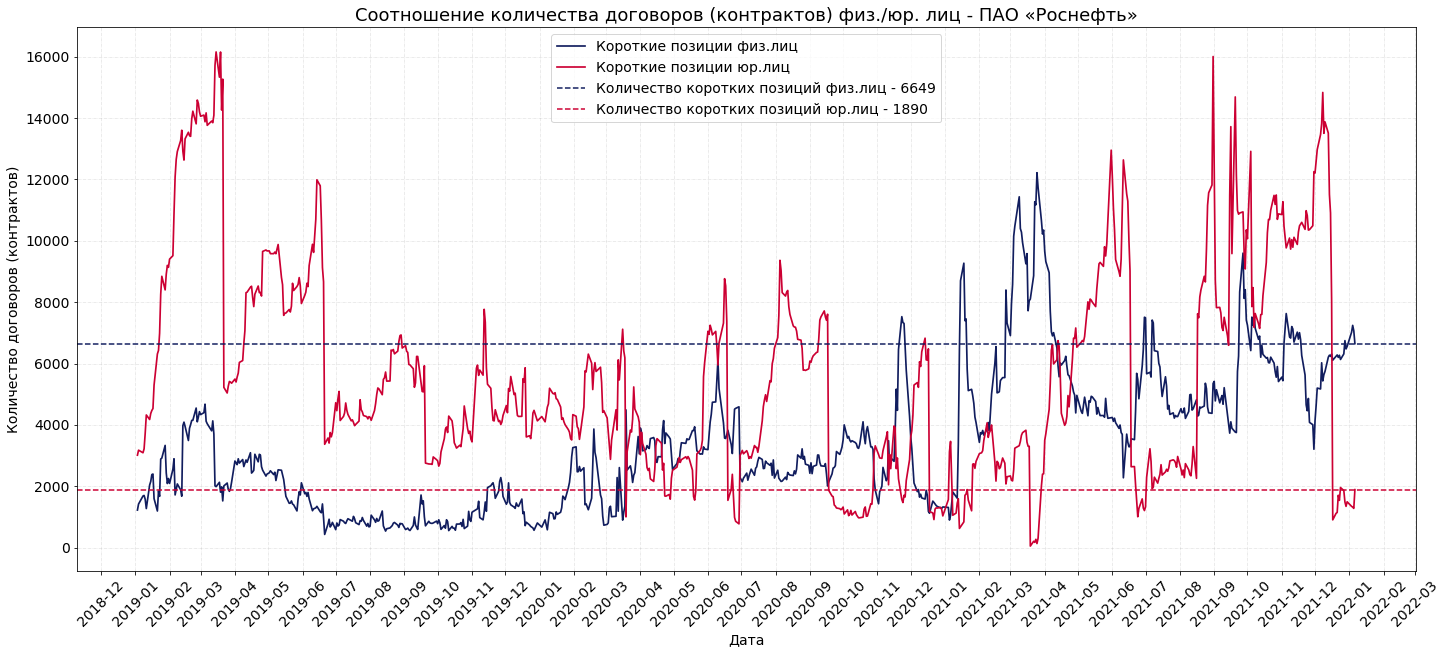

In [191]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(rosn_df['moment'], rosn_df['short_position_rosn_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(rosn_df['moment'], rosn_df['short_position_rosn_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=rosn_df['short_position_rosn_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(rosn_df['short_position_rosn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=rosn_df['short_position_rosn_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(rosn_df['short_position_rosn_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Роснефть»', fontsize=18)
plt.legend()
plt.show()

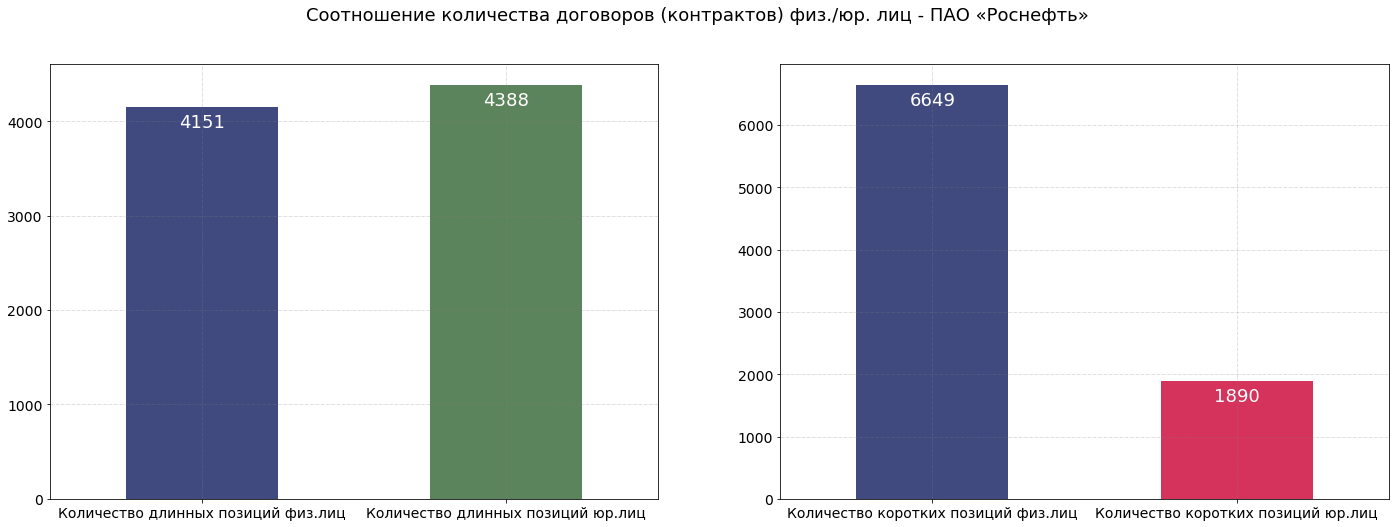

In [192]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_rosn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_rosn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Роснефть»', fontsize=18)
plt.show()

## <a id='408'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>  
- <a href='#0'>Table of contents</a>  

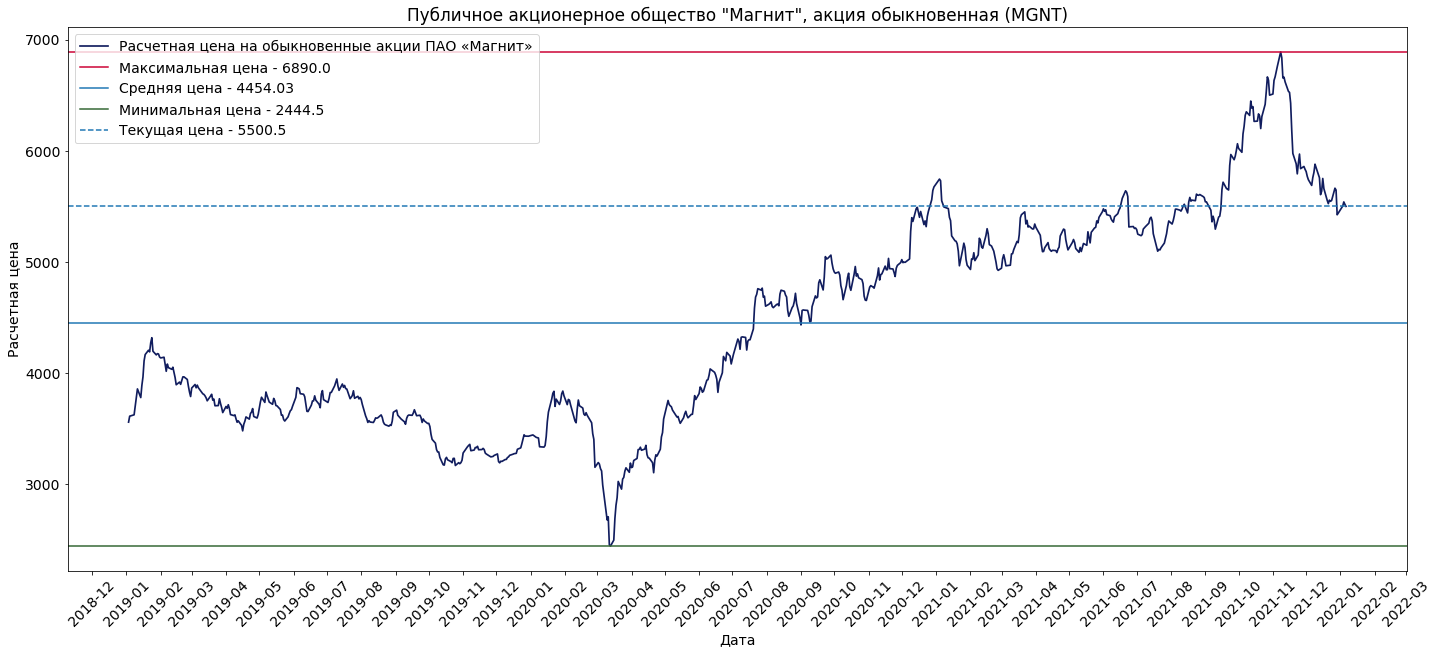

In [193]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(mgnt_df['moment'], mgnt_df['mgnt_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «Магнит»', linewidth=1.7)
plt.axhline(y=np.nanmax(mgnt_df['mgnt_price']), label='Максимальная цена - '+str(np.nanmax(mgnt_df['mgnt_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(mgnt_df['mgnt_price']), label='Средняя цена - '+str(round(np.mean(mgnt_df['mgnt_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(mgnt_df['mgnt_price']), label='Минимальная цена - '+str(np.nanmin(mgnt_df['mgnt_price'])), linestyle='-', color='#336633')
plt.axhline(y=mgnt_df['mgnt_price'].iat[-1], label='Текущая цена - '+str(mgnt_df['mgnt_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/MGNT.png')

In [194]:
long_position_mgnt_ind = round(mgnt_df['long_position_mgnt_ind'].iat[-1])
long_position_mgnt_ent = round(mgnt_df['long_position_mgnt_ent'].iat[-1])

long_position_mgnt = pd.DataFrame({'Количество договоров (контрактов)': [long_position_mgnt_ind, long_position_mgnt_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [195]:
short_position_mgnt_ind = round(mgnt_df['short_position_mgnt_ind'].iat[-1])
short_position_mgnt_ent = round(mgnt_df['short_position_mgnt_ent'].iat[-1])

short_position_mgnt = pd.DataFrame({'Количество договоров (контрактов)': [short_position_mgnt_ind, short_position_mgnt_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

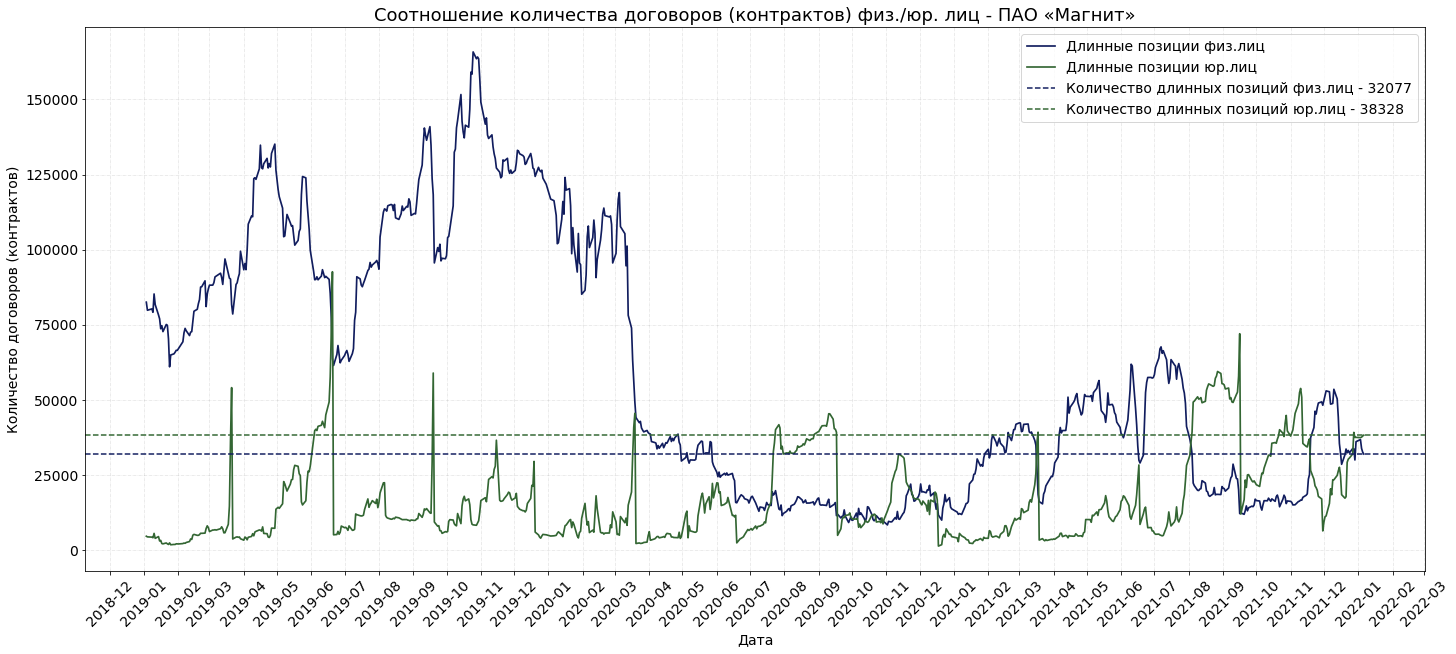

In [196]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], mgnt_df['long_position_mgnt_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], mgnt_df['long_position_mgnt_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=mgnt_df['long_position_mgnt_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(mgnt_df['long_position_mgnt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=mgnt_df['long_position_mgnt_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(mgnt_df['long_position_mgnt_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Магнит»', fontsize=18)
plt.legend()
plt.show()

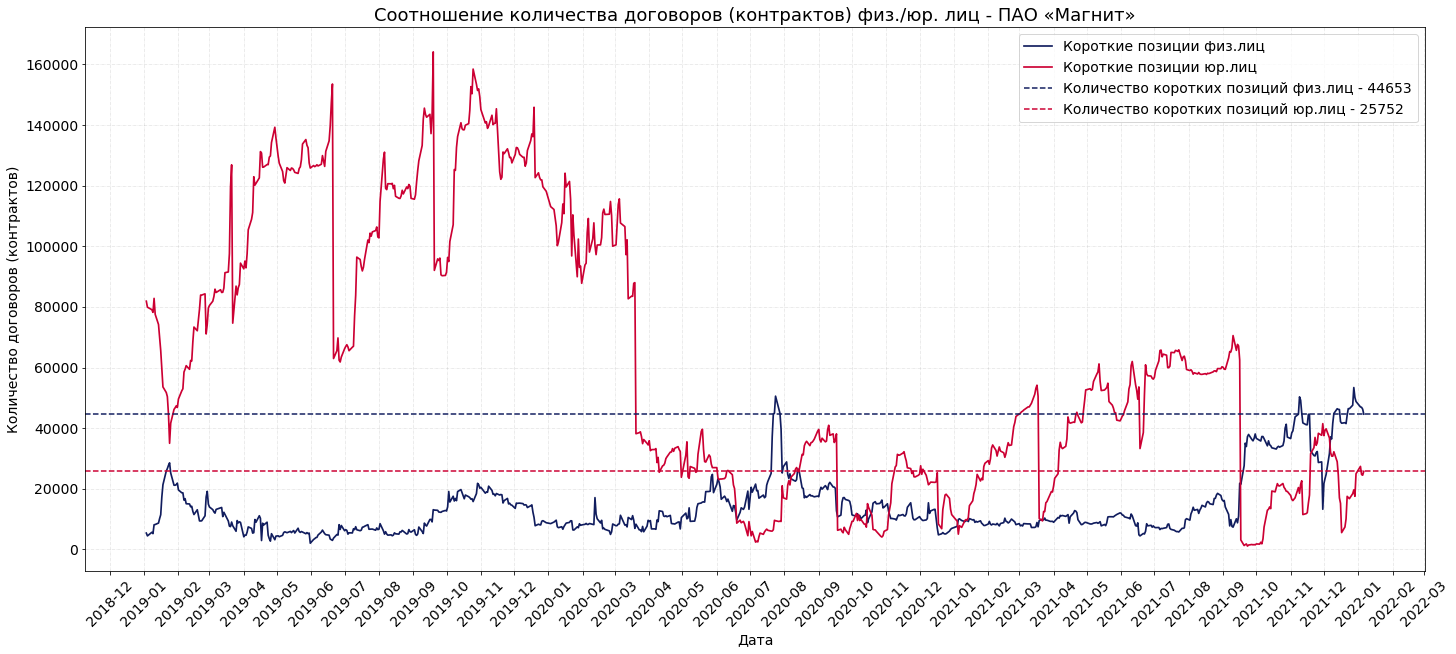

In [197]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], mgnt_df['short_position_mgnt_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], mgnt_df['short_position_mgnt_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=mgnt_df['short_position_mgnt_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(mgnt_df['short_position_mgnt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=mgnt_df['short_position_mgnt_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(mgnt_df['short_position_mgnt_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Магнит»', fontsize=18)
plt.legend()
plt.show()

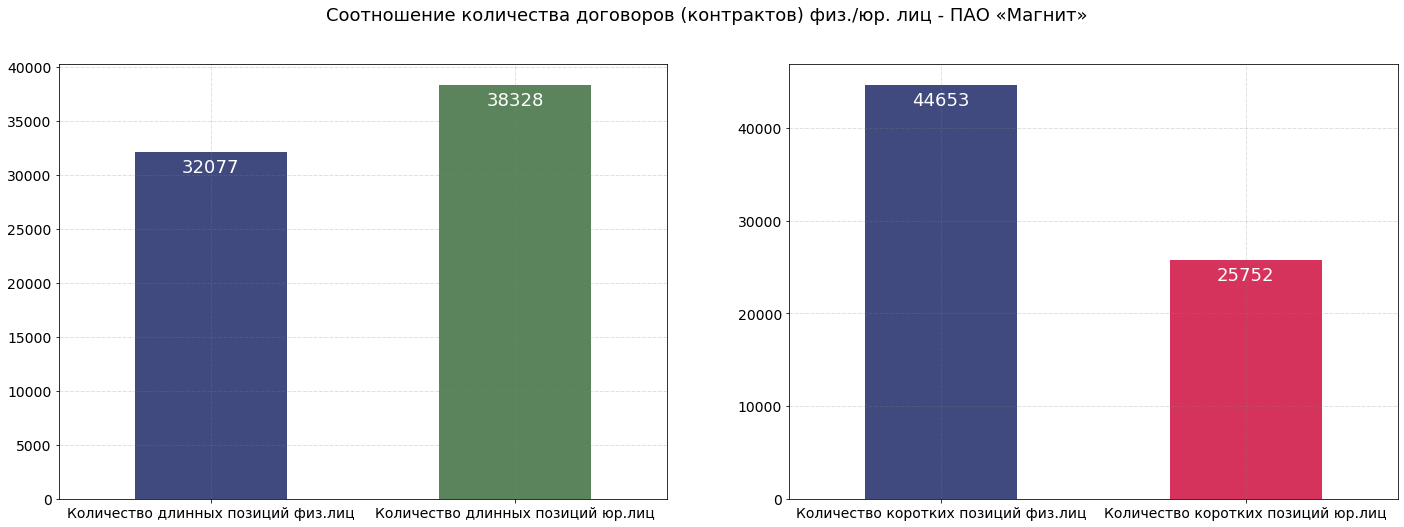

In [198]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_mgnt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_mgnt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Магнит»', fontsize=18)
plt.show()

## <a id='409'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>  
- <a href='#0'>Table of contents</a>  

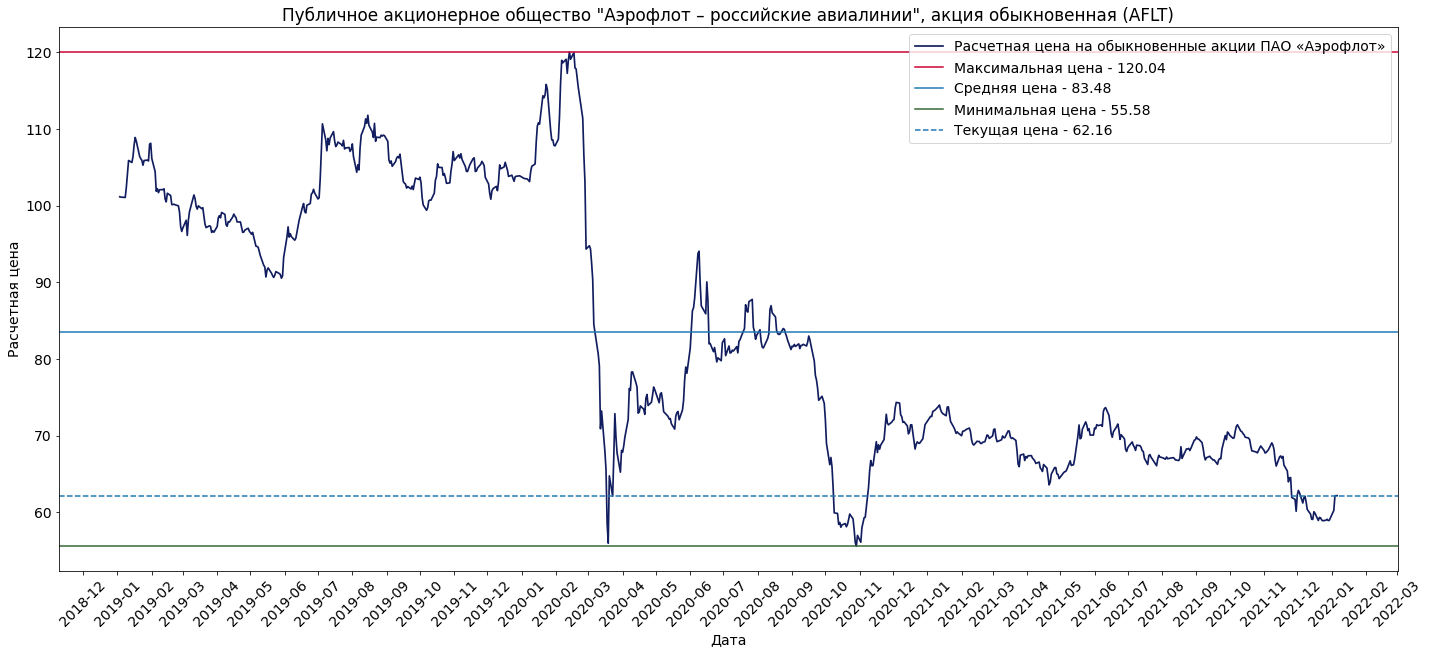

In [199]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(aflt_df['moment'], aflt_df['aflt_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «Аэрофлот»', linewidth=1.7)
plt.axhline(y=np.nanmax(aflt_df['aflt_price']), label='Максимальная цена - '+str(np.nanmax(aflt_df['aflt_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(aflt_df['aflt_price']), label='Средняя цена - '+str(round(np.mean(aflt_df['aflt_price']), 2)), linestyle='-')
plt.axhline(y=np.nanmin(aflt_df['aflt_price']), label='Минимальная цена - '+str(np.nanmin(aflt_df['aflt_price'])), linestyle='-', color='#336633')
plt.axhline(y=aflt_df['aflt_price'].iat[-1], label='Текущая цена - '+str(aflt_df['aflt_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/AFLT.png')

In [200]:
long_position_aflt_ind = round(aflt_df['long_position_aflt_ind'].iat[-1])
long_position_aflt_ent = round(aflt_df['long_position_aflt_ent'].iat[-1])

long_position_aflt = pd.DataFrame({'Количество договоров (контрактов)': [long_position_aflt_ind, long_position_aflt_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [201]:
short_position_aflt_ind = round(aflt_df['short_position_aflt_ind'].iat[-1])
short_position_aflt_ent = round(aflt_df['short_position_aflt_ent'].iat[-1])

short_position_aflt = pd.DataFrame({'Количество договоров (контрактов)': [short_position_aflt_ind, short_position_aflt_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

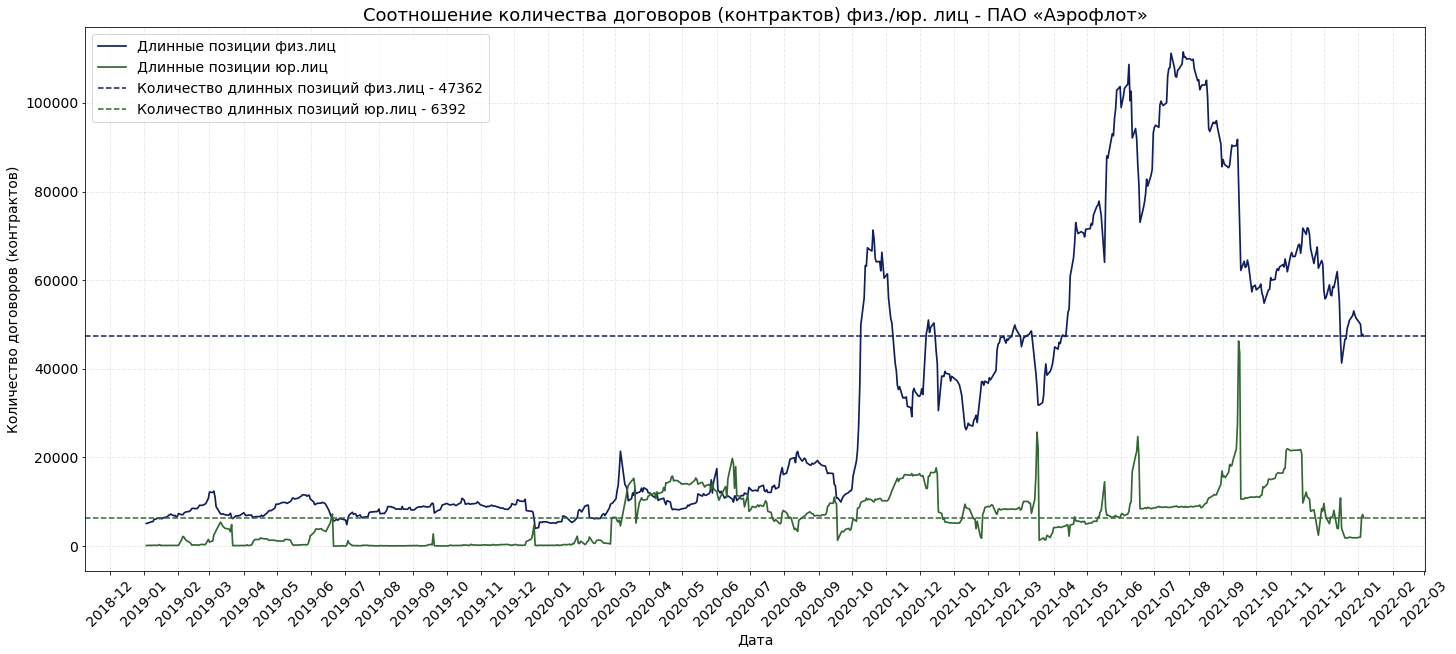

In [202]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(aflt_df['moment'], aflt_df['long_position_aflt_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(aflt_df['moment'], aflt_df['long_position_aflt_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=aflt_df['long_position_aflt_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(aflt_df['long_position_aflt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=aflt_df['long_position_aflt_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(aflt_df['long_position_aflt_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Аэрофлот»', fontsize=18)
plt.legend()
plt.show()

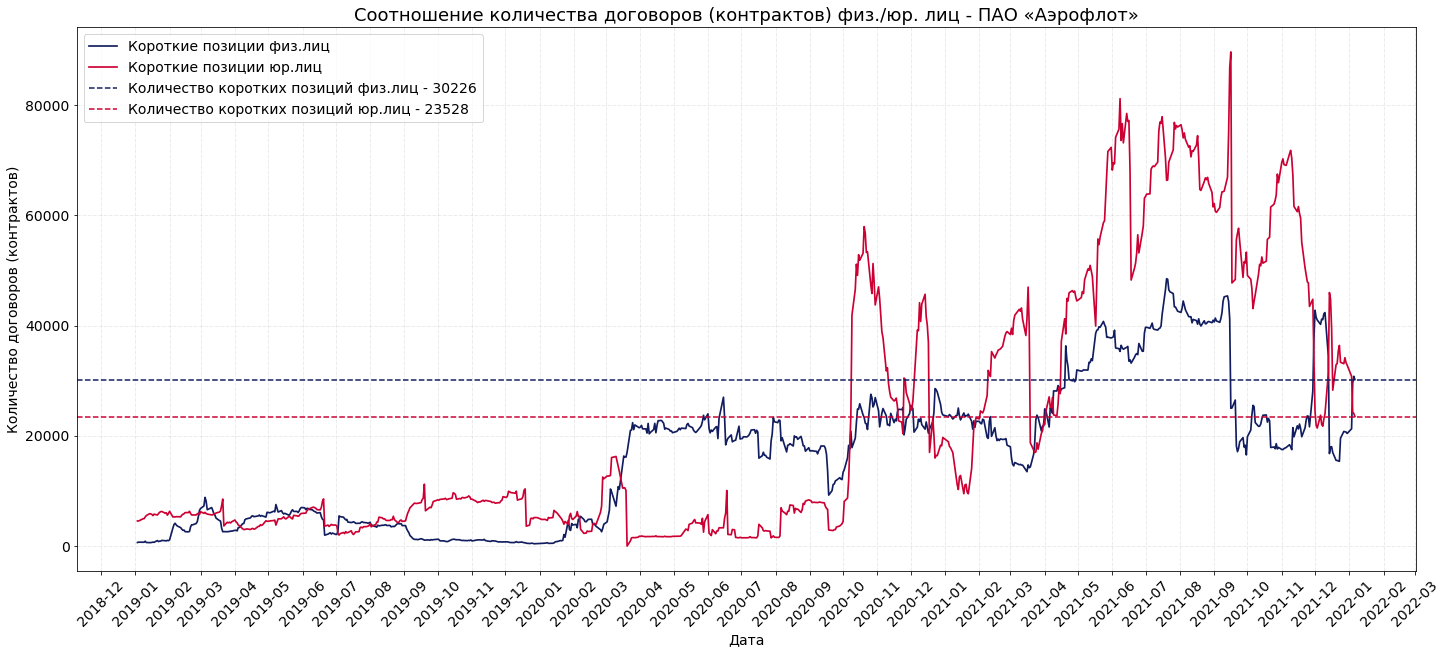

In [203]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(aflt_df['moment'], aflt_df['short_position_aflt_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(aflt_df['moment'], aflt_df['short_position_aflt_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=aflt_df['short_position_aflt_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(aflt_df['short_position_aflt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=aflt_df['short_position_aflt_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(aflt_df['short_position_aflt_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Аэрофлот»', fontsize=18)
plt.legend()
plt.show()

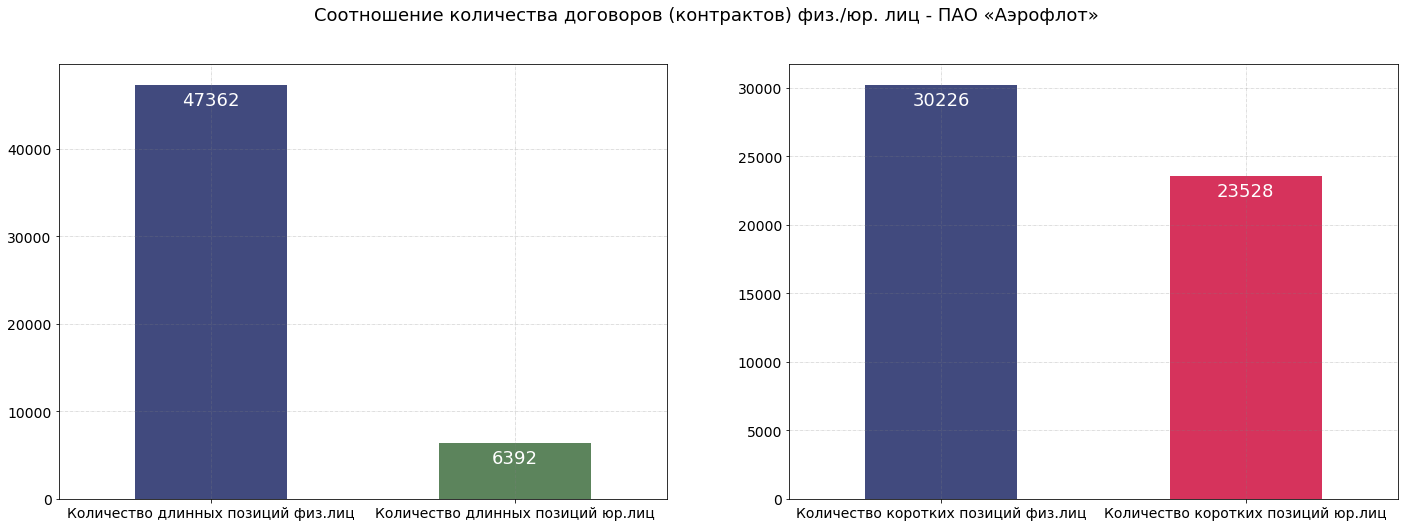

In [204]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_aflt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_aflt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Аэрофлот»', fontsize=18)
plt.show()

## <a id='410'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a>  
- <a href='#0'>Table of contents</a>  

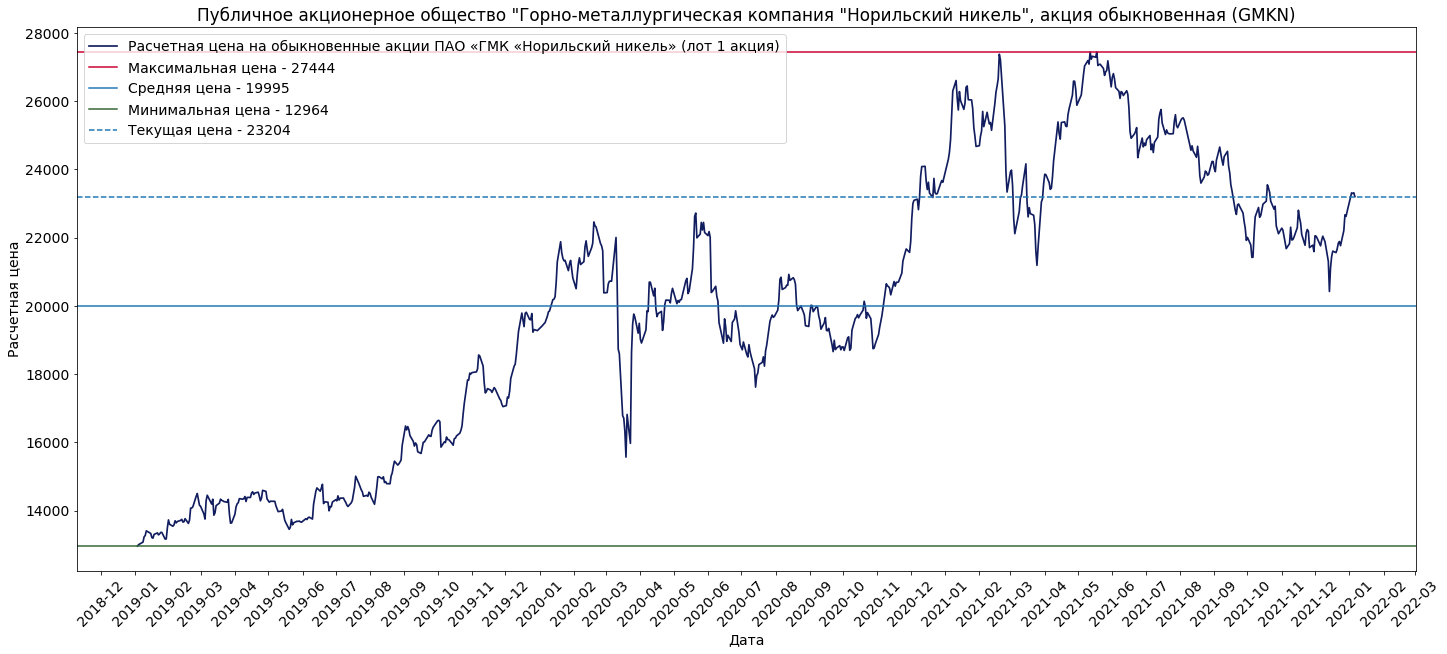

In [205]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gmkn_df['moment'], gmkn_df['gmkn_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «ГМК «Норильский никель» (лот 1 акция)', linewidth=1.7)
plt.axhline(y=np.nanmax(gmkn_df['gmkn_price']), label='Максимальная цена - '+str(np.nanmax(gmkn_df['gmkn_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(gmkn_df['gmkn_price']), label='Средняя цена - '+str(round(np.mean(gmkn_df['gmkn_price']))), linestyle='-')
plt.axhline(y=np.nanmin(gmkn_df['gmkn_price']), label='Минимальная цена - '+str(np.nanmin(gmkn_df['gmkn_price'])), linestyle='-', color='#336633')
plt.axhline(y=gmkn_df['gmkn_price'].iat[-1], label='Текущая цена - '+str(gmkn_df['gmkn_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

fig.savefig('./graphs/GMKN.png')

In [206]:
long_position_gmkn_ind = round(gmkn_df['long_position_gmkn_ind'].iat[-1])
long_position_gmkn_ent = round(gmkn_df['long_position_gmkn_ent'].iat[-1])

long_position_gmkn = pd.DataFrame({'Количество договоров (контрактов)': [long_position_gmkn_ind, long_position_gmkn_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [207]:
short_position_gmkn_ind = round(gmkn_df['short_position_gmkn_ind'].iat[-1])
short_position_gmkn_ent = round(gmkn_df['short_position_gmkn_ent'].iat[-1])

short_position_gmkn = pd.DataFrame({'Количество договоров (контрактов)': [short_position_gmkn_ind, short_position_gmkn_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

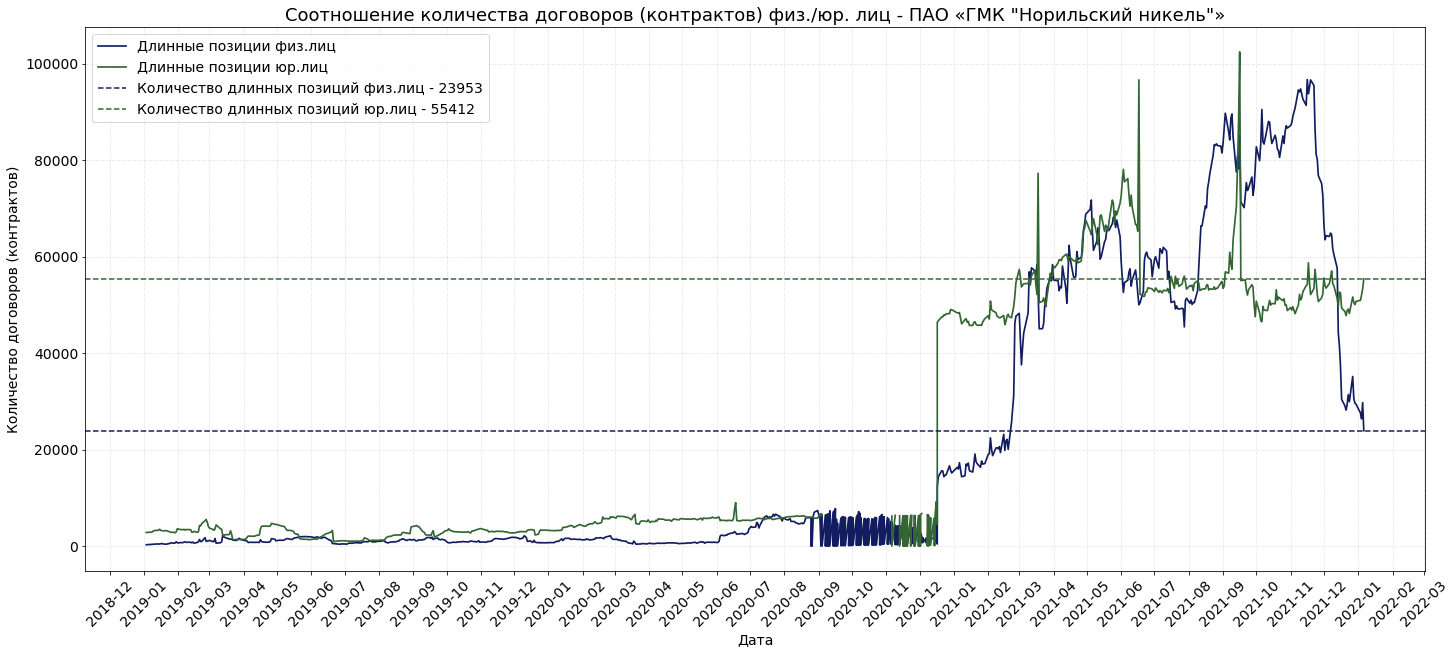

In [208]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gmkn_df['moment'], gmkn_df['long_position_gmkn_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(gmkn_df['moment'], gmkn_df['long_position_gmkn_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gmkn_df['long_position_gmkn_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(gmkn_df['long_position_gmkn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gmkn_df['long_position_gmkn_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(gmkn_df['long_position_gmkn_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ГМК "Норильский никель"»', fontsize=18)
plt.legend()
plt.show()

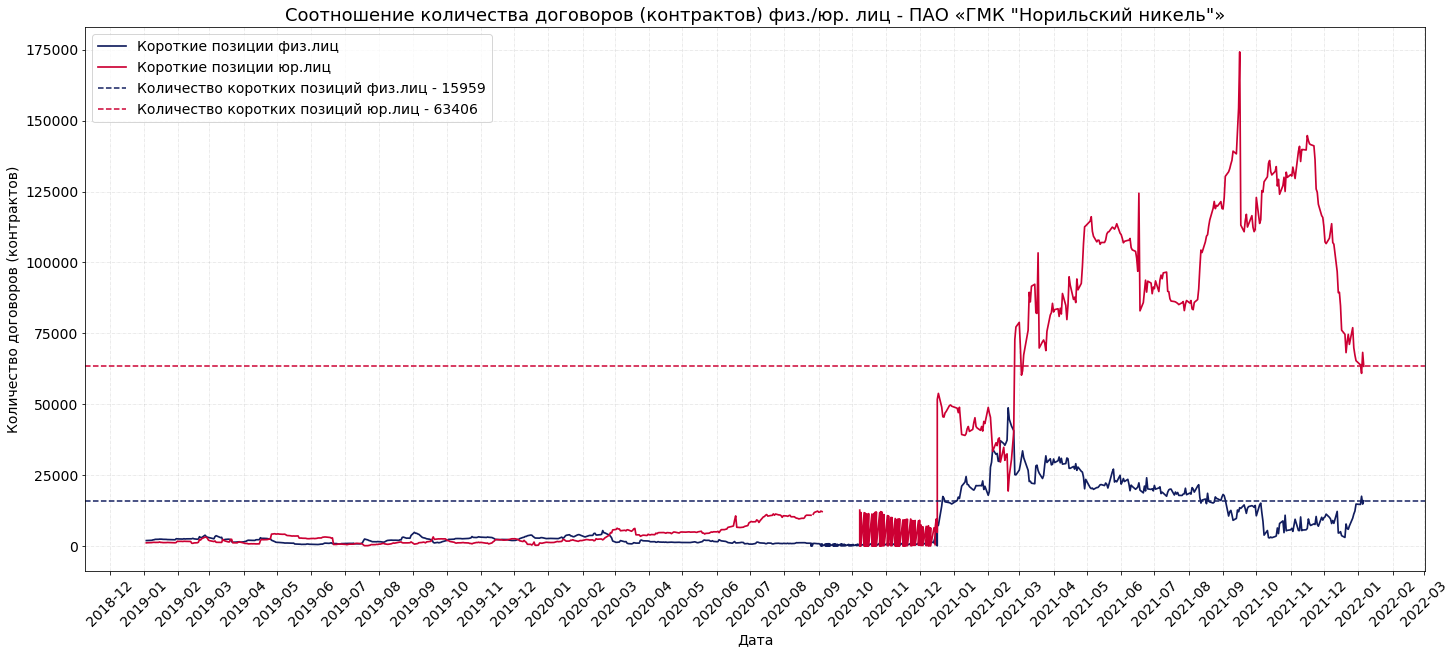

In [209]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gmkn_df['moment'], gmkn_df['short_position_gmkn_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(gmkn_df['moment'], gmkn_df['short_position_gmkn_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gmkn_df['short_position_gmkn_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(gmkn_df['short_position_gmkn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gmkn_df['short_position_gmkn_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(gmkn_df['short_position_gmkn_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ГМК "Норильский никель"»', fontsize=18)
plt.legend()
plt.show()

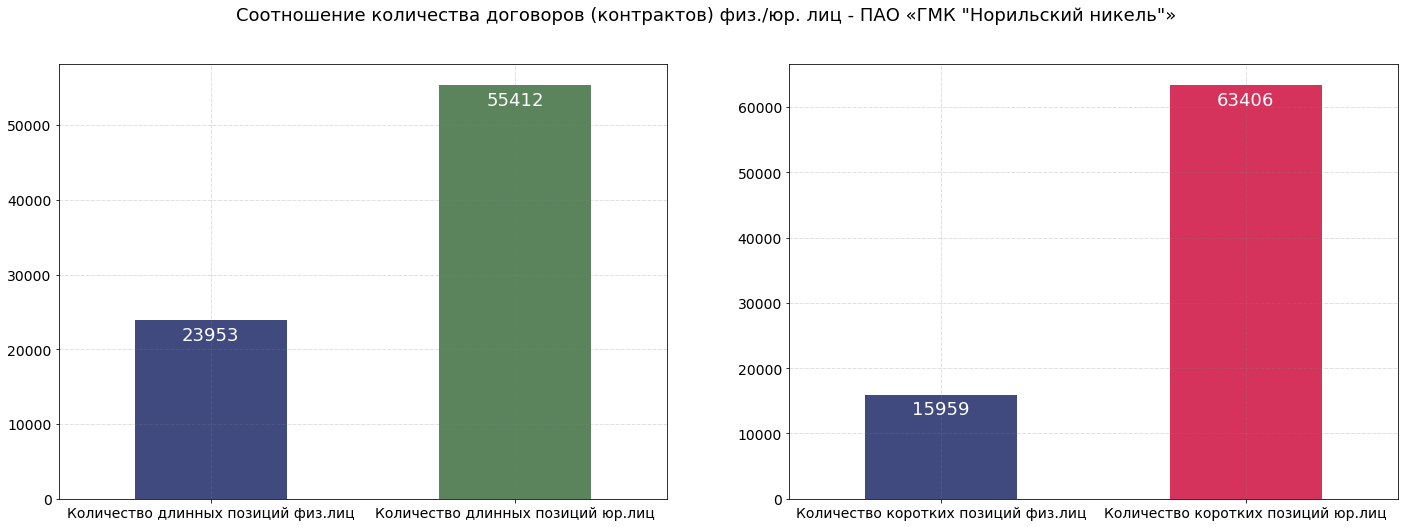

In [210]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_gmkn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_gmkn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ГМК "Норильский никель"»', fontsize=18)
plt.show()

# <a id='5'>Создание датасета</a>  

In [211]:
# Курс доллара США на валютной бирже - USD000UTSTOM - si_df
# Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM - eu_df      
# Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER) - sber_df    
# Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR) - vtbr_df  
# Публичное акционерное общество "Газпром", акция обыкновенная (GAZP) - gazr_df    
# Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN) - gmkn_df     
# Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT) - aflt_df    
# Публичное акционерное общество "Магнит", акция обыкновенная (MGNT) - mgnt_df    
# Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH) - lkoh_df   
# Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN) - rosn_df   
# Фьючерсный контракт на Индекс РТС - rts_df    
# Фьючерсный контракт на Индекс МосБиржи - mix_df     
# Фьючерсный контракт на инвестиционные паи SPDR S&P 500 ETF Trust - spyf_df   
# Фьючерсный контракт на нефть Brent  - brent_df  
# Фьючерсный контракт на золото - gold_df    
# Фьючерсный контракт на серебро - silv_df    
# Фьючерсный контракт на природный газ  - ng_df   

## <a id='502'>Объединение таблиц</a>  
- <a href='#0'>Table of contents</a> 

In [212]:
# Объединение таблиц на основе ключа - 'moment'
train_df = pd.merge(si_df, eu_df, on='moment', how='left')
train_df = pd.merge(train_df, sber_df, on='moment', how='left')
train_df = pd.merge(train_df, vtbr_df, on='moment', how='left')
train_df = pd.merge(train_df, gazr_df, on='moment', how='left')
train_df = pd.merge(train_df, gmkn_df, on='moment', how='left')
# train_df = pd.merge(train_df, aflt_df, on='moment', how='left')
# train_df = pd.merge(train_df, mgnt_df, on='moment', how='left')
train_df = pd.merge(train_df, lkoh_df, on='moment', how='left')
train_df = pd.merge(train_df, rosn_df, on='moment', how='left')

## <a id='503'>Пропуски в данных</a>  
- <a href='#0'>Table of contents</a> 

In [213]:
train_df.isnull().sum()

moment                        0
long_position_si_ind          0
short_position_si_ind         0
clients_in_long_si_ind        0
clients_in_short_si_ind       0
long_position_si_ent          0
short_position_si_ent         0
clients_in_long_si_ent        0
clients_in_short_si_ent       0
si_volrur                     0
si_price                      0
si_h                          0
si_l                          0
si_r                          0
long_position_eu_ind          0
short_position_eu_ind         0
clients_in_long_eu_ind        0
clients_in_short_eu_ind       0
long_position_eu_ent          0
short_position_eu_ent         0
clients_in_long_eu_ent        0
clients_in_short_eu_ent       0
eu_volrur                     0
eu_price                      0
eu_h                          0
eu_l                          0
eu_r                          0
long_position_sbrf_ind        0
short_position_sbrf_ind       0
clients_in_long_sbrf_ind      0
clients_in_short_sbrf_ind     0
long_pos

## <a id='504'>Корреляционная зависимость - Курс доллара США</a>  
- <a href='#0'>Table of contents</a> 

In [214]:
si_correlation = train_df.corr()
si_corr_with_target = si_correlation['si_price'].sort_values(ascending = False)
si_corr_with_target

si_price                     1.00000
eu_price                     0.95644
clients_in_short_si_ind      0.69702
short_position_eu_ind        0.62989
short_position_si_ind        0.59974
gmkn_price                   0.59824
clients_in_short_eu_ind      0.57889
si_volrur                    0.54988
clients_in_short_si_ent      0.52254
short_position_rosn_ind      0.51781
long_position_gmkn_ent       0.49890
clients_in_long_lkoh_ind     0.47880
long_position_lkoh_ind       0.47201
clients_in_long_gazr_ind     0.43704
long_position_eu_ent         0.41050
clients_in_long_sbrf_ind     0.40408
sber_value                   0.40051
short_position_gmkn_ent      0.39525
clients_in_short_vtbr_ind    0.39087
clients_in_short_rosn_ind    0.38119
short_position_vtbr_ind      0.37779
sber_volume                  0.36734
clients_in_short_vtbr_ent    0.34983
lkoh_volume                  0.34696
clients_in_long_vtbr_ind     0.34540
gmkn_volume                  0.33654
rosn_volume                  0.33413
l

## <a id='505'>Парная корреляция USD & EUR_RUB</a>  
- <a href='#0'>Table of contents</a> 

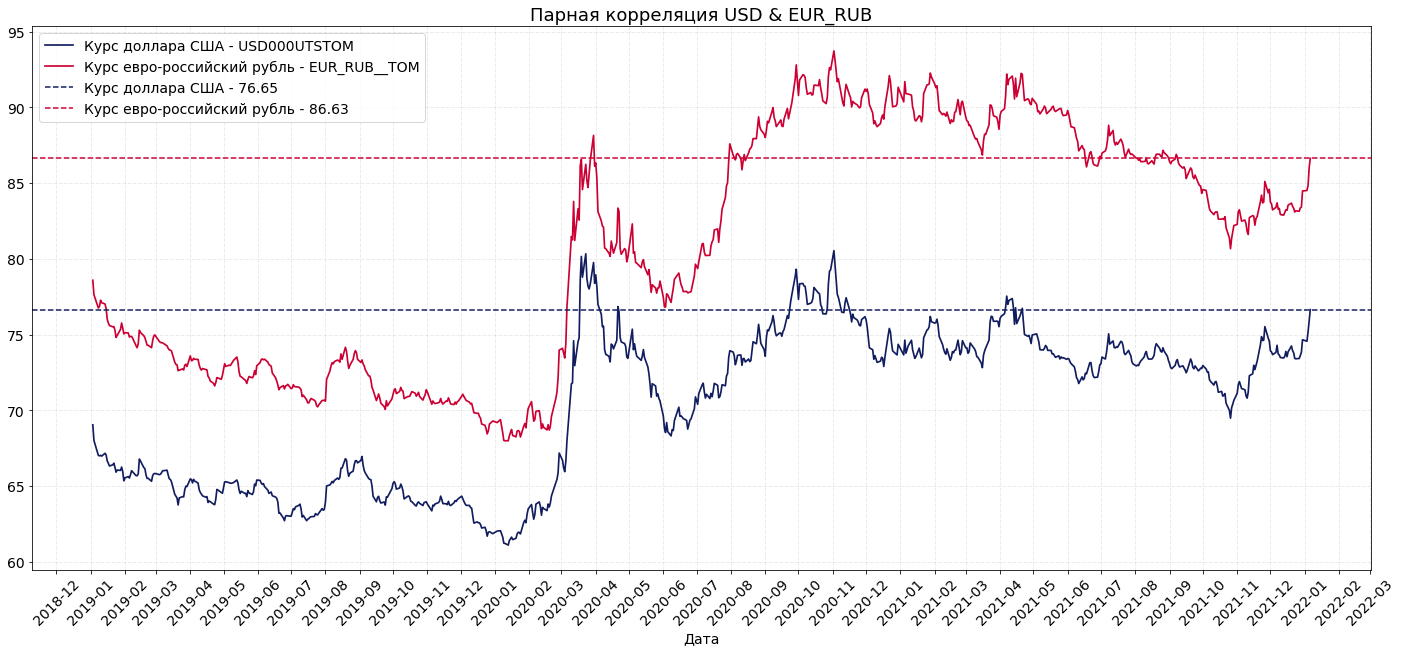

In [215]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(train_df['moment'], train_df['si_price'], color='#111d5e', label='Курс доллара США - USD000UTSTOM', linewidth=1.7)
plt.plot(train_df['moment'], train_df['eu_price'], color='#CC0033', label='Курс евро-российский рубль - EUR_RUB__TOM', linewidth=1.7)
plt.axhline(y=train_df['si_price'].iat[-1], label='Курс доллара США - '+str(round(train_df['si_price'].iat[-1], 2)), linestyle='--', color='#111d5e')
plt.axhline(y=train_df['eu_price'].iat[-1], label='Курс евро-российский рубль - '+str(round(train_df['eu_price'].iat[-1], 2)), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Парная корреляция USD & EUR_RUB', fontsize=18)
plt.legend()
plt.show()

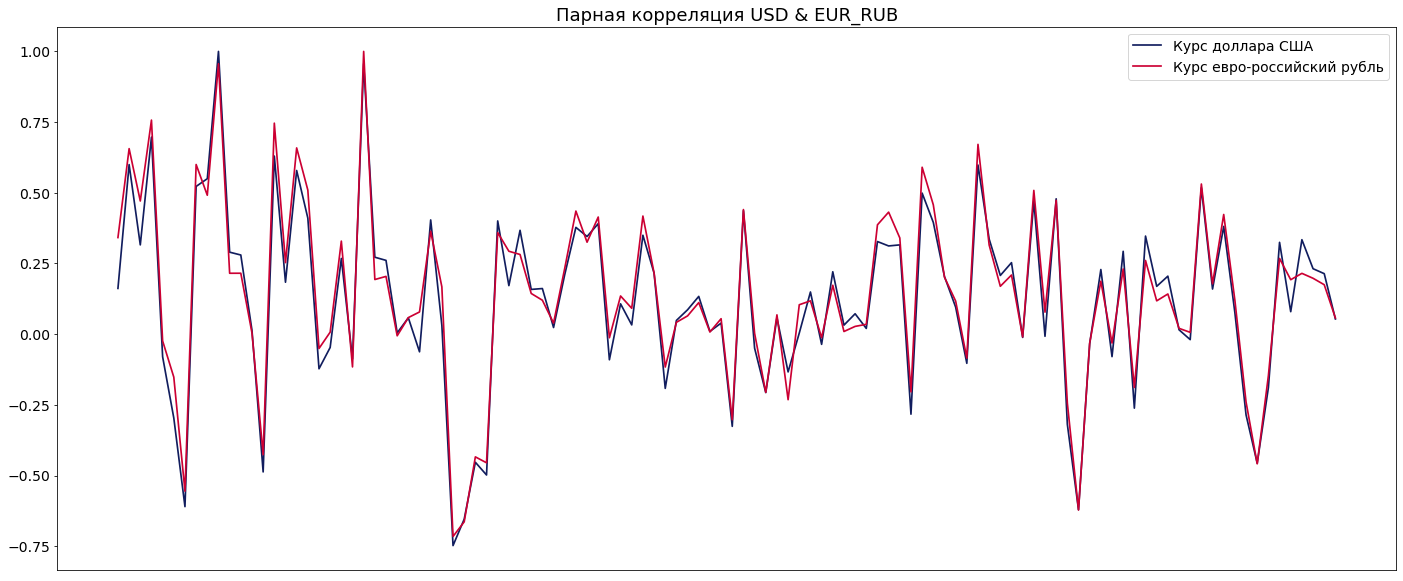

In [216]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_correlation['si_price'], color='#111d5e', label='Курс доллара США', linewidth=1.7)
plt.plot(si_correlation['eu_price'], color='#CC0033', label='Курс евро-российский рубль', linewidth=1.7)
plt.xticks([])
plt.title('Парная корреляция USD & EUR_RUB', fontsize=18)
plt.legend()
plt.show()

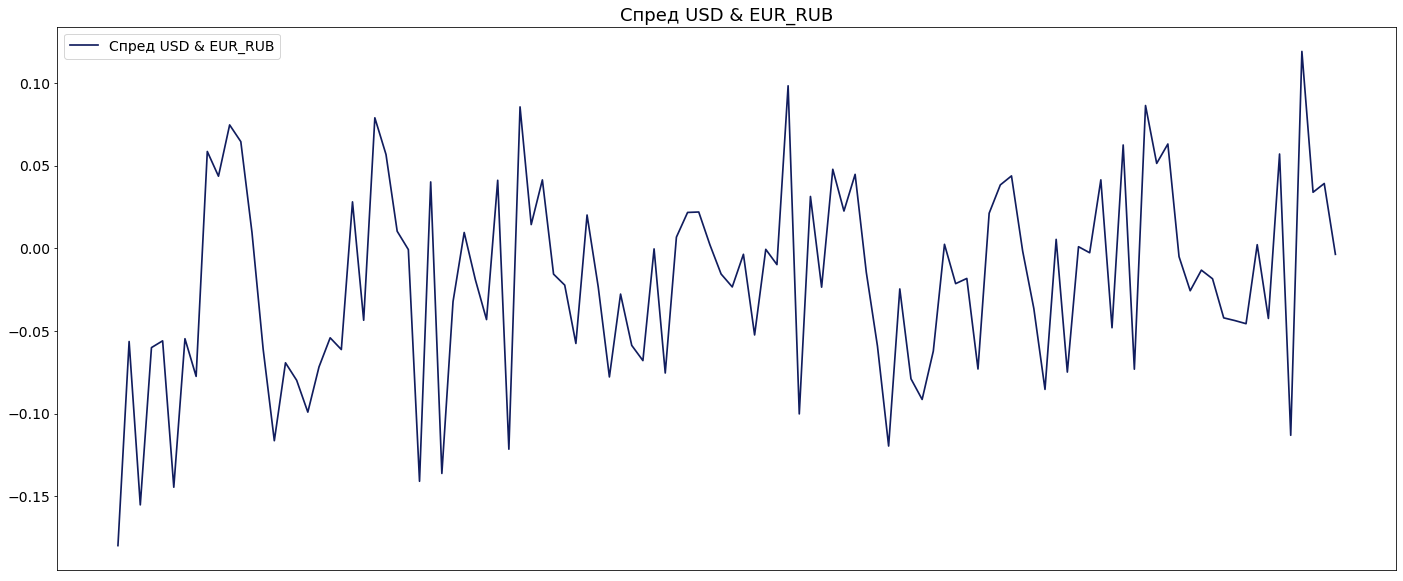

In [217]:
fig, ax = plt.subplots(figsize=(24, 10))
si_eu_spread = si_correlation['si_price'] - si_correlation['eu_price']
plt.plot(si_eu_spread, color='#111d5e', label='Спред USD & EUR_RUB', linewidth=1.7) # spread_sr.cumsum()
plt.xticks([])
plt.title('Спред USD & EUR_RUB', fontsize=18)
plt.legend()
plt.show()

In [218]:
si_eu_adf = adfuller(si_eu_spread)

In [219]:
print(f'ADF Test Statistic: {si_eu_adf[0]}')
print(f'P-Value: {si_eu_adf[1]}')
print(f'Number of lags used: {si_eu_adf[2]}')
print(f'Number of observations: {si_eu_adf[3]}')
print('Critical Values:')
for k, v in si_eu_adf[4].items():
    print(f'{k}: {v}')

ADF Test Statistic: -1.7163581283930953
P-Value: 0.4227045948177342
Number of lags used: 13
Number of observations: 96
Critical Values:
1%: -3.5003788874873405
5%: -2.8921519665075235
10%: -2.5830997960069446


In [220]:
si_eu_coint = coint(si_correlation['si_price'], si_correlation['eu_price'])

In [221]:
print(f'T-statistic of unit-root test on residuals {si_eu_coint[0]}')
print(f'P-Value: {si_eu_coint[1]}')
print(f'Critical Values: {si_eu_coint[2]}')

T-statistic of unit-root test on residuals -1.5878988291174434
P-Value: 0.7259705535078764
Critical Values: [-3.99973805 -3.39276024 -3.08358903]


## <a id='506'>Корреляционная зависимость - ПАО «Сбербанк»</a>  
- <a href='#0'>Table of contents</a> 

In [222]:
sber_correlation = train_df.corr()
sber_corr_with_target = si_correlation['sber_price'].sort_values(ascending = False)
sber_corr_with_target

sber_price                   1.00000
rosn_price                   0.93842
short_position_gmkn_ent      0.89285
long_position_gmkn_ind       0.89208
clients_in_long_gmkn_ind     0.85714
gazr_price                   0.84745
vtbr_price                   0.83537
long_position_gmkn_ent       0.83040
long_position_vtbr_ind       0.82596
lkoh_price                   0.80467
long_position_gazr_ind       0.79684
short_position_gazr_ent      0.78117
short_position_vtbr_ent      0.77172
clients_in_long_si_ind       0.76887
clients_in_long_gazr_ind     0.76259
clients_in_long_rosn_ind     0.72315
short_position_vtbr_ind      0.70955
clients_in_long_vtbr_ind     0.69905
long_position_eu_ent         0.68827
clients_in_short_vtbr_ind    0.68726
gmkn_price                   0.66151
clients_in_long_eu_ind       0.64803
short_position_eu_ind        0.61116
long_position_rosn_ind       0.60946
short_position_gmkn_ind      0.60234
short_position_si_ind        0.55687
short_position_rosn_ind      0.54993
s

## <a id='507'>Парная корреляция SBER & ROSN</a>  
- <a href='#0'>Table of contents</a> 

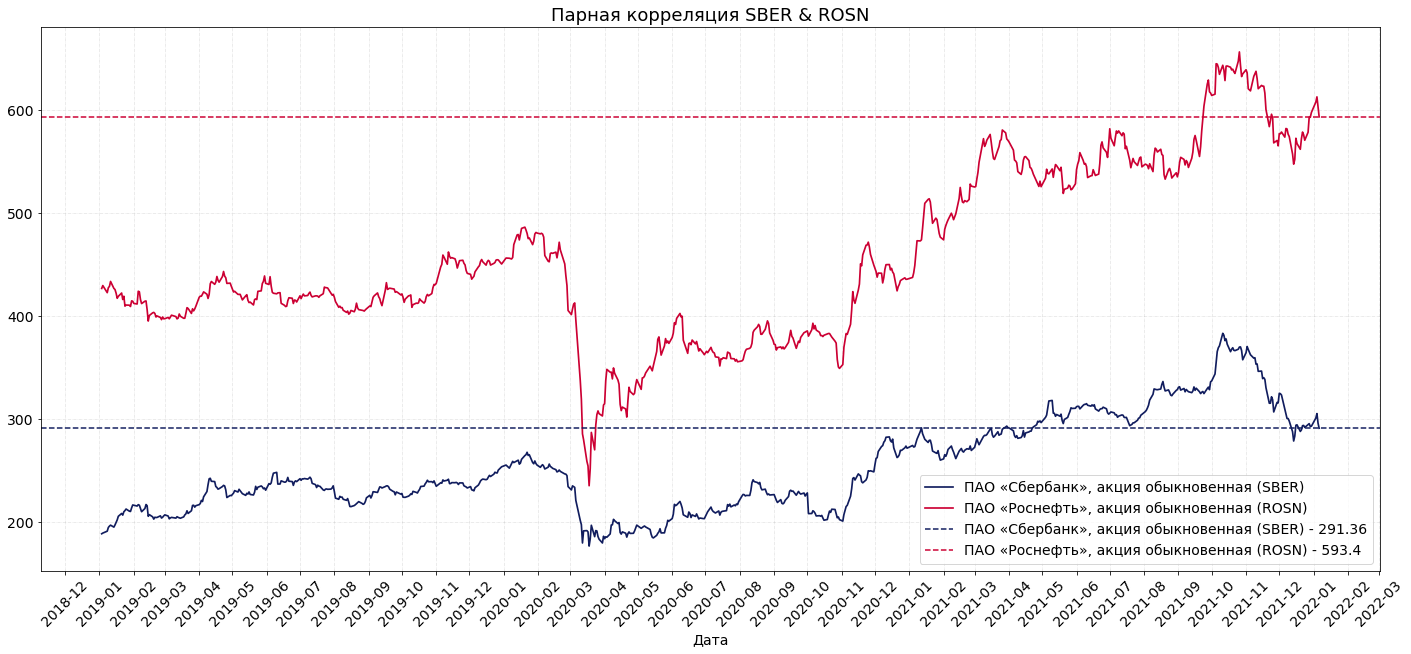

In [223]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(train_df['moment'], train_df['sber_price'], color='#111d5e', label='ПАО «Сбербанк», акция обыкновенная (SBER)', linewidth=1.7)
plt.plot(train_df['moment'], train_df['rosn_price'], color='#CC0033', label='ПАО «Роснефть», акция обыкновенная (ROSN)', linewidth=1.7)
plt.axhline(y=train_df['sber_price'].iat[-1], label='ПАО «Сбербанк», акция обыкновенная (SBER) - '+str(round(train_df['sber_price'].iat[-1], 2)), linestyle='--', color='#111d5e')
plt.axhline(y=train_df['rosn_price'].iat[-1], label='ПАО «Роснефть», акция обыкновенная (ROSN) - '+str(round(train_df['rosn_price'].iat[-1], 2)), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Парная корреляция SBER & ROSN', fontsize=18)
plt.legend()
plt.show()

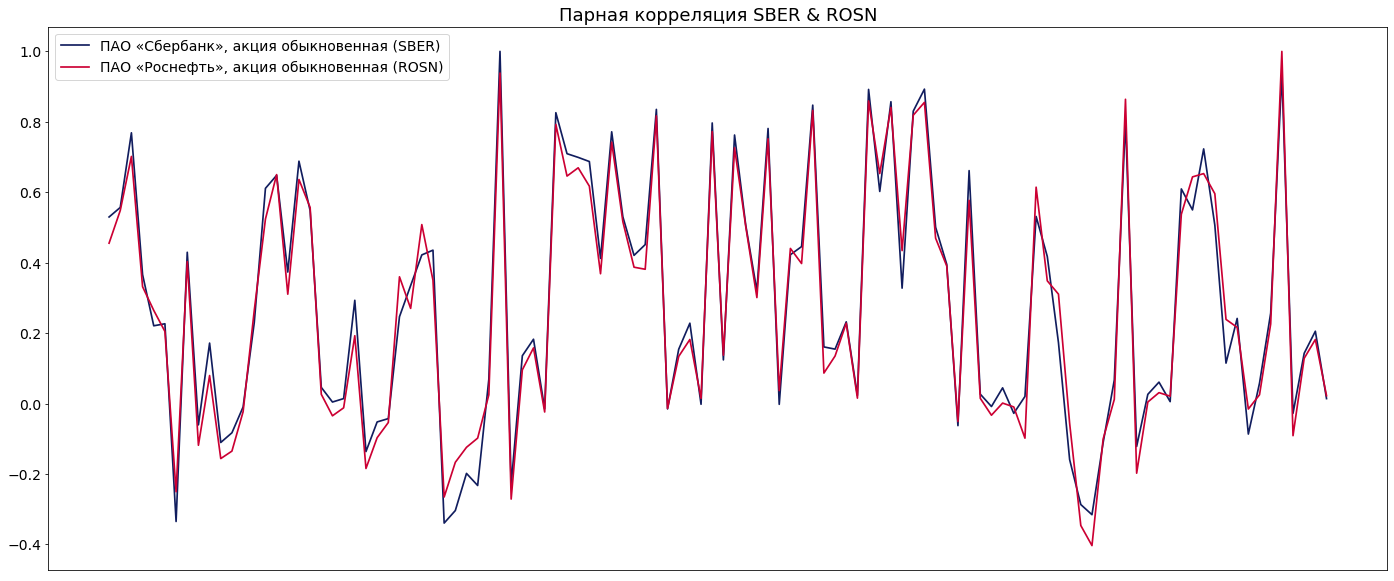

In [224]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_correlation['sber_price'], color='#111d5e', label='ПАО «Сбербанк», акция обыкновенная (SBER)', linewidth=1.7)
plt.plot(sber_correlation['rosn_price'], color='#CC0033', label='ПАО «Роснефть», акция обыкновенная (ROSN)', linewidth=1.7)
plt.xticks([])
plt.title('Парная корреляция SBER & ROSN', fontsize=18)
plt.legend()
plt.show()

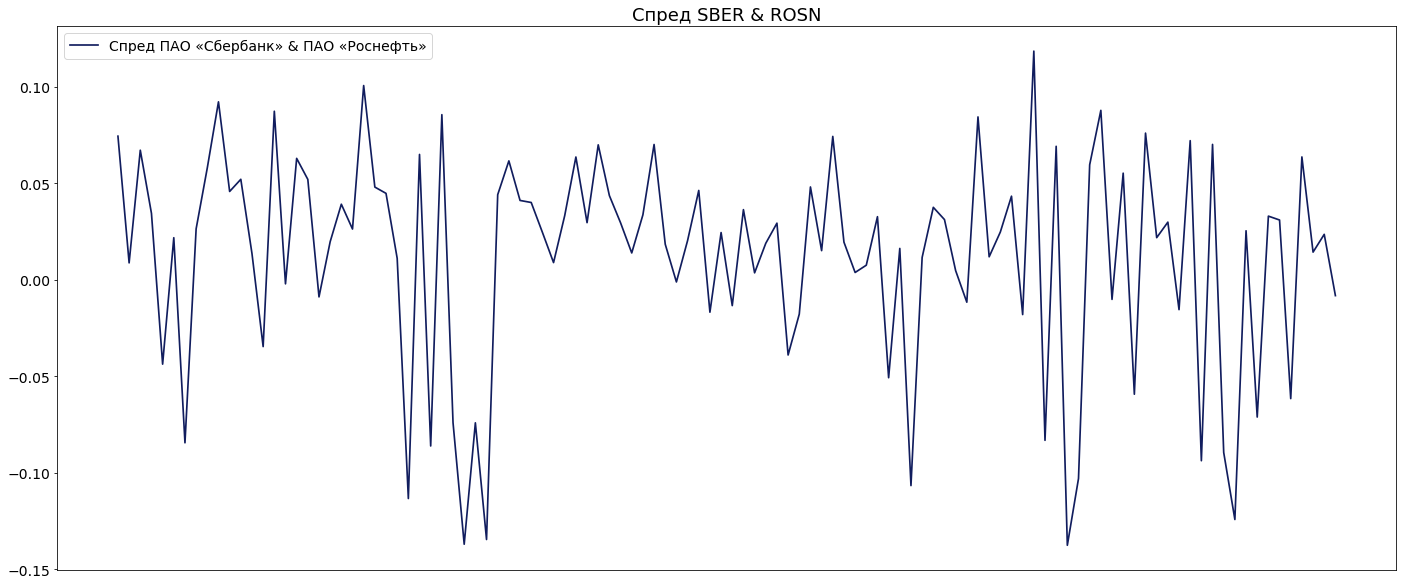

In [225]:
fig, ax = plt.subplots(figsize=(24, 10))
sber_rosn_spread = sber_correlation['sber_price'] - sber_correlation['rosn_price']
plt.plot(sber_rosn_spread, color='#111d5e', label='Спред ПАО «Сбербанк» & ПАО «Роснефть»', linewidth=1.7) # spread_sr.cumsum()
plt.xticks([])
plt.title('Спред SBER & ROSN', fontsize=18)
plt.legend()
plt.show()

In [226]:
sber_rosn_adf = adfuller(sber_rosn_spread)

In [227]:
print(f'ADF Test Statistic: {sber_rosn_adf[0]}')
print(f'P-Value: {sber_rosn_adf[1]}')
print(f'Number of lags used: {sber_rosn_adf[2]}')
print(f'Number of observations: {sber_rosn_adf[3]}')
print('Critical Values:')
for k, v in sber_rosn_adf[4].items():
    print(f'{k}: {v}')

ADF Test Statistic: -3.75879674777613
P-Value: 0.0033581578475024043
Number of lags used: 6
Number of observations: 103
Critical Values:
1%: -3.4954932834550623
5%: -2.8900369024285117
10%: -2.5819706975209726


In [228]:
sber_rosn_coint = coint(sber_correlation['sber_price'], sber_correlation['rosn_price'])

In [229]:
print(f'T-statistic of unit-root test on residuals {sber_rosn_coint[0]}')
print(f'P-Value: {sber_rosn_coint[1]}')
print(f'Critical Values: {sber_rosn_coint[2]}')

T-statistic of unit-root test on residuals -3.820842021938531
P-Value: 0.012712848552598006
Critical Values: [-3.99973805 -3.39276024 -3.08358903]


## <a id='508'>Корреляционная зависимость - ПАО «Газпром»</a>  
- <a href='#0'>Table of contents</a> 

In [230]:
gazr_correlation = train_df.corr()
gazr_corr_with_target = gazr_correlation['gazr_price'].sort_values(ascending = False)
gazr_corr_with_target

gazr_price                   1.00000
vtbr_price                   0.88732
long_position_gazr_ind       0.85238
sber_price                   0.84745
long_position_vtbr_ind       0.84166
short_position_gazr_ent      0.83386
rosn_price                   0.83237
lkoh_price                   0.83032
short_position_vtbr_ent      0.80976
clients_in_long_gmkn_ind     0.80244
long_position_gmkn_ind       0.77954
short_position_gmkn_ent      0.77619
clients_in_long_rosn_ind     0.75145
clients_in_long_gazr_ind     0.74006
clients_in_long_vtbr_ind     0.72192
long_position_gmkn_ent       0.66122
long_position_rosn_ind       0.62446
clients_in_short_vtbr_ind    0.60190
short_position_vtbr_ind      0.57053
clients_in_short_gazr_ind    0.57007
clients_in_long_eu_ind       0.55314
gazr_value                   0.53980
clients_in_long_si_ind       0.52095
short_position_eu_ent        0.50781
clients_in_long_gmkn_ent     0.50273
clients_in_long_vtbr_ent     0.49747
clients_in_long_sbrf_ind     0.47055
l

## <a id='509'>Парная корреляция GAZP & VTBR</a>  
- <a href='#0'>Table of contents</a> 

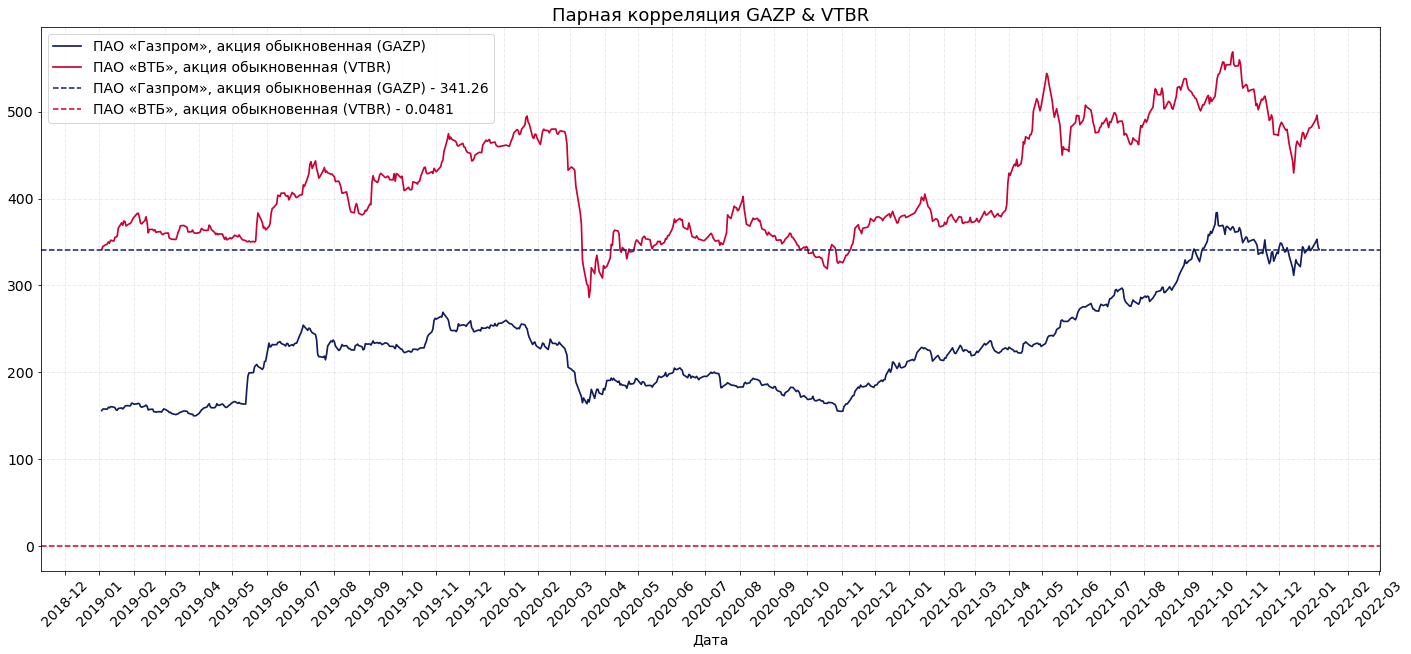

In [231]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(train_df['moment'], train_df['gazr_price'], color='#111d5e', label='ПАО «Газпром», акция обыкновенная (GAZP)', linewidth=1.7)
plt.plot(train_df['moment'], train_df['vtbr_price']*10000, color='#CC0033', label='ПАО «ВТБ», акция обыкновенная (VTBR)', linewidth=1.7)
plt.axhline(y=train_df['gazr_price'].iat[-1], label='ПАО «Газпром», акция обыкновенная (GAZP) - '+str(round(train_df['gazr_price'].iat[-1], 2)), linestyle='--', color='#111d5e')
plt.axhline(y=train_df['vtbr_price'].iat[-1], label='ПАО «ВТБ», акция обыкновенная (VTBR) - '+str(train_df['vtbr_price'].iat[-1]), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Парная корреляция GAZP & VTBR', fontsize=18)
plt.legend()
plt.show()

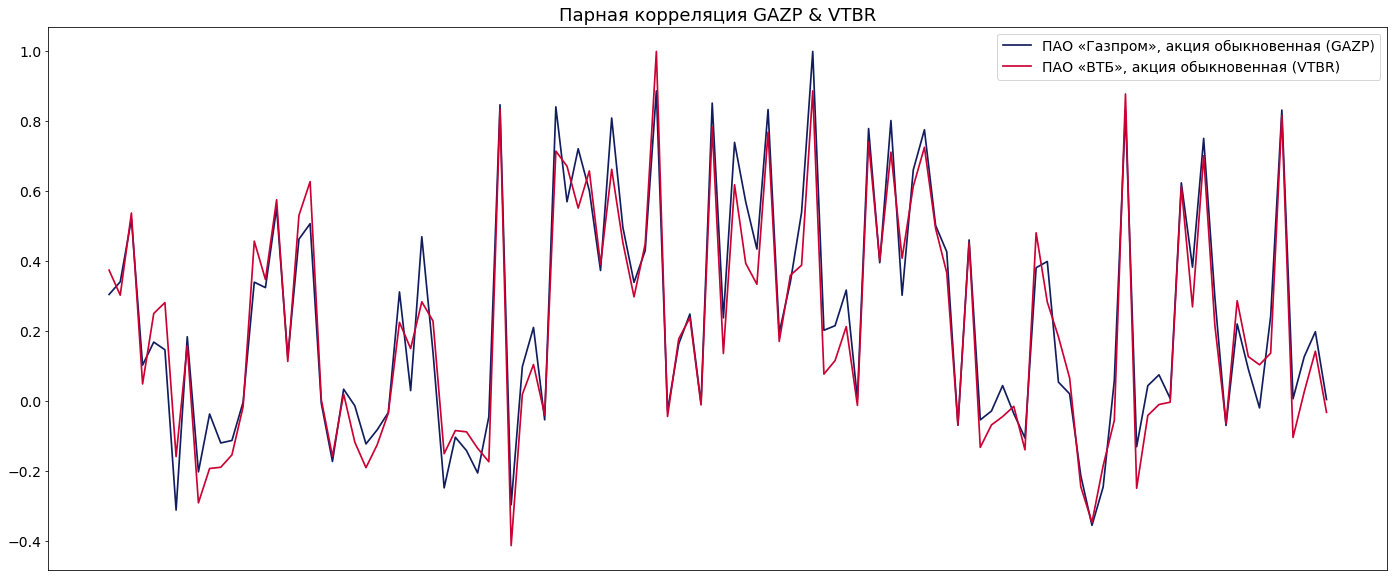

In [232]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_correlation['gazr_price'], color='#111d5e', label='ПАО «Газпром», акция обыкновенная (GAZP)', linewidth=1.7)
plt.plot(gazr_correlation['vtbr_price'], color='#CC0033', label='ПАО «ВТБ», акция обыкновенная (VTBR)', linewidth=1.7)
plt.xticks([])
plt.title('Парная корреляция GAZP & VTBR', fontsize=18)
plt.legend()
plt.show()

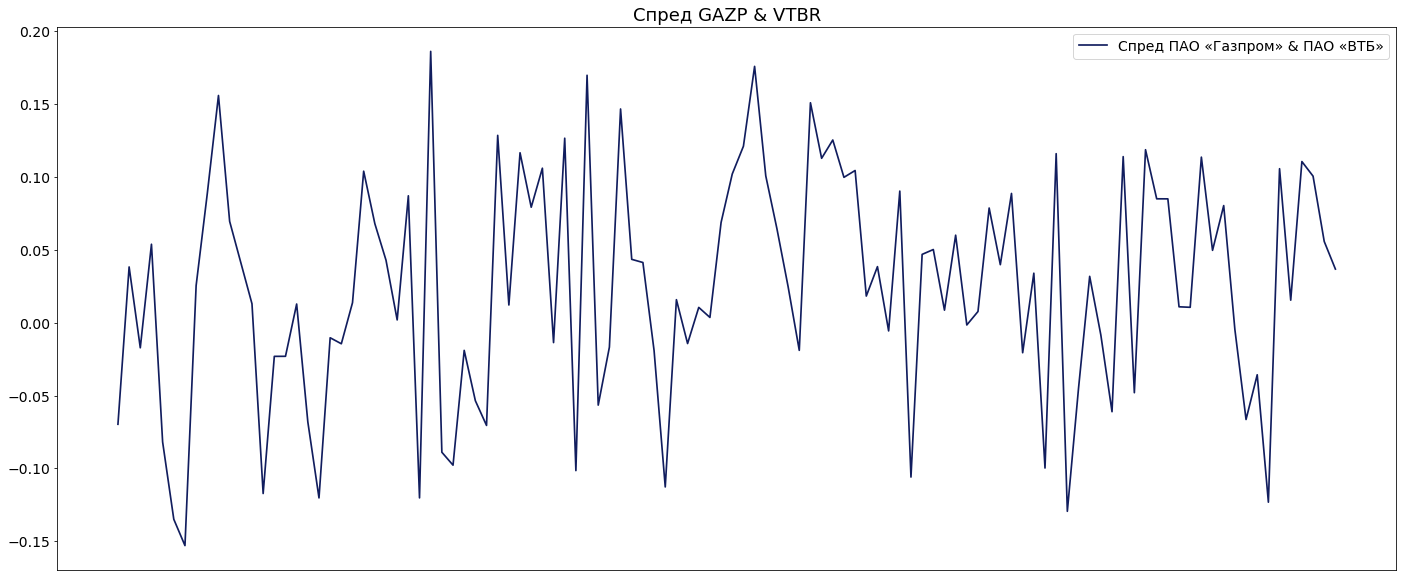

In [233]:
fig, ax = plt.subplots(figsize=(24, 10))
gazr_vtbr_spread = gazr_correlation['gazr_price'] - gazr_correlation['vtbr_price']
plt.plot(gazr_vtbr_spread, color='#111d5e', label='Спред ПАО «Газпром» & ПАО «ВТБ»', linewidth=1.7) # gazr_vtbr_spread.cumsum()
plt.xticks([])
plt.title('Спред GAZP & VTBR', fontsize=18)
plt.legend()
plt.show()

In [234]:
gazr_vtbr_adf = adfuller(gazr_vtbr_spread)

In [235]:
print(f'ADF Test Statistic: {gazr_vtbr_adf[0]}')
print(f'P-Value: {gazr_vtbr_adf[1]}')
print(f'Number of lags used: {gazr_vtbr_adf[2]}')
print(f'Number of observations: {gazr_vtbr_adf[3]}')
print('Critical Values:')
for k, v in gazr_vtbr_adf[4].items():
    print(f'{k}: {v}')

ADF Test Statistic: -5.106017567535092
P-Value: 1.363361952872143e-05
Number of lags used: 1
Number of observations: 108
Critical Values:
1%: -3.4924012594942333
5%: -2.8886968193364835
10%: -2.5812552709190673


In [236]:
gazr_vtbr_coint = coint(gazr_correlation['gazr_price'], gazr_correlation['vtbr_price'])

In [237]:
print(f'T-statistic of unit-root test on residuals {gazr_vtbr_coint[0]}')
print(f'P-Value: {gazr_vtbr_coint[1]}')
print(f'Critical Values: {gazr_vtbr_coint[2]}')

T-statistic of unit-root test on residuals -5.076179280274317
P-Value: 0.0001189652004521125
Critical Values: [-3.99973805 -3.39276024 -3.08358903]


## <a id='510'>Конструирование признаков</a>  
- <a href='#0'>Table of contents</a> 

In [238]:
# def feature_engineering(df):
#     # Дата
#     df['month'] = df['moment'].apply(lambda t: t.month)
#     df['year'] = df['moment'].apply(lambda t: t.year)

In [239]:
# feature_engineering(train_df)

In [240]:
X = train_df.drop(['si_price', 'moment',  'vtbr_volume'], axis=1)
y = train_df['si_price'] 

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# <a id='6'>Выбор модели и обучение</a>  

## <a id='601'>Первичный выбор модели</a>  
- <a href='#0'>Table of contents</a> 

In [242]:
models = []

models.append(('CatBoostRegressor', CatBoostRegressor(silent=True)))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('XGBRegressor', XGBRegressor()))

In [243]:
results = []

for name, model in models:
    start_time = time.time()
    
    model.fit(X_train, y_train)
    
    train_predictions  = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    R2 = r2_score(y_test, test_predictions)
    MAE = mean_absolute_error(y_test, test_predictions)
    MSE = mean_squared_error(y_test, test_predictions)
    EV = explained_variance_score(y_test, test_predictions)
    
    lr_time = (time.time() - start_time)
    results.append((name, R2, EV, MAE, MSE, lr_time))
    
best_models = pd.DataFrame(results, columns = ['model','R2', 'EV', 'MAE', 'MSE', 'time'])
best_models.sort_values('R2', ascending=False)

model      R2      EV     MAE     MSE    time
1      LGBMRegressor 0.99387 0.99389 0.28190 0.16868 0.15800
0  CatBoostRegressor 0.99331 0.99331 0.30309 0.18429 7.19973
2       XGBRegressor 0.98964 0.98966 0.36567 0.28521 0.30017

## <a id='602'>Обучение модели</a>  
- <a href='#0'>Table of contents</a> 

In [244]:
results_lgb = []

# params = {
#     'objective': 'rmse',
#     'boosting_type': 'gbdt',
#     'max_depth': 3,
#     'learning_rate': 0.1,
#     'n_jobs': -1,
#     'verbose': -1
# }

# params = {
#     'objective': 'rmse',
#     'boosting_type': 'goss',
#     'max_depth': -1,
#     'learning_rate': 0.031,
#     'max_bin': 342,
#     'n_jobs': -1,
#     'verbose': -1
# }

params = {
    'objective': 'rmse',
    'boosting_type': 'dart',
    'max_depth': 7,
    'learning_rate': 0.2,
    'max_bin': 225,
    'n_jobs': -1,
    'verbose': -1
}

folds = KFold(n_splits=5, random_state=23, shuffle=True)

for fold, (train_index, test_index) in enumerate(folds.split(X, y)):
    print(f'Training fold {fold + 1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    start_time = time.time()
    model_lgb = LGBMRegressor(**params, num_iterations=22500) 
    
    model_lgb.fit(X_train, y_train, 
              eval_set = [(X_train, y_train), (X_test, y_test)], 
              verbose=250, early_stopping_rounds=250) # feval=feval_rmspe

    train_predictions_lgb = model_lgb.predict(X_train)
    test_predictions_lgb = model_lgb.predict(X_test)

    train_score_r2 = r2_score(y_train, train_predictions_lgb)
    test_score_r2 = r2_score(y_test, test_predictions_lgb)
    train_score_mae = mean_absolute_error(y_train, train_predictions_lgb)
    test_score_mae = mean_absolute_error(y_test, test_predictions_lgb)
    train_score_mse = mean_squared_error(y_train, train_predictions_lgb)
    test_score_mse = mean_squared_error(y_test, test_predictions_lgb)
    test_rmspe_score = rmspe(y_test, test_predictions_lgb)

    lr_time = (time.time() - start_time)
    results_lgb.append((fold, train_score_r2, train_score_mae, train_score_mse, test_score_r2, test_score_mae, test_score_mse, test_rmspe_score, lr_time))

Training fold 1
[250]	training's rmse: 0.860452	valid_1's rmse: 0.911328
[500]	training's rmse: 0.183282	valid_1's rmse: 0.431786
[750]	training's rmse: 0.302039	valid_1's rmse: 0.483046
[1000]	training's rmse: 0.227192	valid_1's rmse: 0.449289
[1250]	training's rmse: 0.235443	valid_1's rmse: 0.454209
[1500]	training's rmse: 0.30554	valid_1's rmse: 0.487721
[1750]	training's rmse: 0.105063	valid_1's rmse: 0.420843
[2000]	training's rmse: 0.144276	valid_1's rmse: 0.427381
[2250]	training's rmse: 0.0836529	valid_1's rmse: 0.419782
[2500]	training's rmse: 0.121737	valid_1's rmse: 0.424457
[2750]	training's rmse: 0.156323	valid_1's rmse: 0.430878
[3000]	training's rmse: 0.0825475	valid_1's rmse: 0.418389
[3250]	training's rmse: 0.0406439	valid_1's rmse: 0.417197
[3500]	training's rmse: 0.103928	valid_1's rmse: 0.421084
[3750]	training's rmse: 0.0797322	valid_1's rmse: 0.419127
[4000]	training's rmse: 0.0956962	valid_1's rmse: 0.421551
[4250]	training's rmse: 0.0761186	valid_1's rmse: 0.419

[12500]	training's rmse: 0.0286337	valid_1's rmse: 0.333938
[12750]	training's rmse: 0.0261811	valid_1's rmse: 0.333594
[13000]	training's rmse: 0.0247574	valid_1's rmse: 0.333449
[13250]	training's rmse: 0.0184322	valid_1's rmse: 0.33282
[13500]	training's rmse: 0.0234022	valid_1's rmse: 0.333149
[13750]	training's rmse: 0.0156298	valid_1's rmse: 0.332148
[14000]	training's rmse: 0.00667051	valid_1's rmse: 0.331413
[14250]	training's rmse: 0.046049	valid_1's rmse: 0.335633
[14500]	training's rmse: 0.0135073	valid_1's rmse: 0.331714
[14750]	training's rmse: 0.0216691	valid_1's rmse: 0.332551
[15000]	training's rmse: 0.0243313	valid_1's rmse: 0.333104
[15250]	training's rmse: 0.0249929	valid_1's rmse: 0.33303
[15500]	training's rmse: 0.0100964	valid_1's rmse: 0.331662
[15750]	training's rmse: 0.0217612	valid_1's rmse: 0.332645
[16000]	training's rmse: 0.0284484	valid_1's rmse: 0.333373
[16250]	training's rmse: 0.00656434	valid_1's rmse: 0.331468
[16500]	training's rmse: 0.00955334	valid

[2000]	training's rmse: 0.143757	valid_1's rmse: 0.365674
[2250]	training's rmse: 0.0833666	valid_1's rmse: 0.353432
[2500]	training's rmse: 0.121333	valid_1's rmse: 0.360574
[2750]	training's rmse: 0.155795	valid_1's rmse: 0.370978
[3000]	training's rmse: 0.0822635	valid_1's rmse: 0.35243
[3250]	training's rmse: 0.0404863	valid_1's rmse: 0.350041
[3500]	training's rmse: 0.10357	valid_1's rmse: 0.355678
[3750]	training's rmse: 0.0794574	valid_1's rmse: 0.351395
[4000]	training's rmse: 0.0953387	valid_1's rmse: 0.353634
[4250]	training's rmse: 0.0758549	valid_1's rmse: 0.35193
[4500]	training's rmse: 0.0828593	valid_1's rmse: 0.353103
[4750]	training's rmse: 0.056587	valid_1's rmse: 0.350819
[5000]	training's rmse: 0.0538254	valid_1's rmse: 0.350801
[5250]	training's rmse: 0.04329	valid_1's rmse: 0.351069
[5500]	training's rmse: 0.0596199	valid_1's rmse: 0.351092
[5750]	training's rmse: 0.0727729	valid_1's rmse: 0.352336
[6000]	training's rmse: 0.0776526	valid_1's rmse: 0.353135
[6250]	

[14250]	training's rmse: 0.0461288	valid_1's rmse: 0.415013
[14500]	training's rmse: 0.0135318	valid_1's rmse: 0.410884
[14750]	training's rmse: 0.021707	valid_1's rmse: 0.411733
[15000]	training's rmse: 0.0243758	valid_1's rmse: 0.412176
[15250]	training's rmse: 0.0250374	valid_1's rmse: 0.412002
[15500]	training's rmse: 0.0101178	valid_1's rmse: 0.410341
[15750]	training's rmse: 0.0217978	valid_1's rmse: 0.411371
[16000]	training's rmse: 0.0284964	valid_1's rmse: 0.412147
[16250]	training's rmse: 0.00657821	valid_1's rmse: 0.410043
[16500]	training's rmse: 0.00957521	valid_1's rmse: 0.41017
[16750]	training's rmse: 0.00703854	valid_1's rmse: 0.410001
[17000]	training's rmse: 0.0220888	valid_1's rmse: 0.411544
[17250]	training's rmse: 0.00625116	valid_1's rmse: 0.41025
[17500]	training's rmse: 0.0131071	valid_1's rmse: 0.410882
[17750]	training's rmse: 0.0107713	valid_1's rmse: 0.410636
[18000]	training's rmse: 0.00840367	valid_1's rmse: 0.410501
[18250]	training's rmse: 0.0164939	val

In [245]:
best_models = pd.DataFrame((results_lgb))
best_models.columns = ['Fold', 'train_score_r2', 'train_score_mae', 'train_score_mse', 'test_score_r2', 'test_score_mae', 'test_score_mse', 'test_rmspe_score', 'time']
best_models.sort_values('Fold', ascending=True)

Fold  train_score_r2  train_score_mae  train_score_mse  test_score_r2  \
0     0         1.00000          0.00643          0.00004        0.99315   
1     1         1.00000          0.00641          0.00004        0.99569   
2     2         1.00000          0.00642          0.00004        0.99476   
3     3         1.00000          0.00641          0.00004        0.99542   
4     4         1.00000          0.00643          0.00004        0.99369   

   test_score_mae  test_score_mse  test_rmspe_score     time  
0         0.27514         0.18179           0.00589 59.65207  
1         0.22996         0.10978           0.00459 60.69916  
2         0.24556         0.12998           0.00500 60.29057  
3         0.22925         0.12312           0.00492 58.97454  
4         0.25014         0.16773           0.00578 64.85682

In [246]:
print(f'Train mean score: {round(np.mean(best_models.train_score_mse), 4)}, std: {round(np.std(best_models.train_score_mse), 4)}')
print(f'Test mean score: {round(np.mean(best_models.test_score_mse), 4)}, std: {round(np.std(best_models.test_score_mse), 4)}')

Train mean score: 0.0, std: 0.0
Test mean score: 0.1425, std: 0.0275


In [247]:
# Train mean score: 0.0, std: 0.0
# Test mean score: 0.1721, std: 0.0262

In [248]:
# Train mean score: 0.0, std: 0.0 - dart
# Test mean score: 0.1317, std: 0.0315

In [249]:
# Train mean score: 0.0, std: 0.0 - gbdt
# Test mean score: 0.1602, std: 0.0226

In [250]:
# Train mean score: 0.0002, std: 0.0002 - goss
# Test mean score: 0.1673, std: 0.0306

# <a id='7'>Прогнозирование временных рядов</a>  

## <a id='701'>Подготовка данных</a>  
- <a href='#0'>Table of contents</a> 

In [251]:
si_tsf = pd.DataFrame()

In [252]:
si_tsf['moment'] = si_df['moment']
si_tsf['si_price'] = si_df['si_price']

In [253]:
si_tsf.head()

moment  si_price
0 2019-01-03  69.04240
1 2019-01-04  68.01030
2 2019-01-08  67.02320
3 2019-01-09  66.99830
4 2019-01-10  67.03050

In [254]:
si_tsf.tail()

moment  si_price
756 2021-12-30  74.66140
757 2022-01-03  74.55980
758 2022-01-04  75.16900
759 2022-01-05  75.93680
760 2022-01-06  76.64830

In [255]:
si_tsf.shape

(761, 2)

In [256]:
si_dataset = si_tsf.iloc[:,1].values

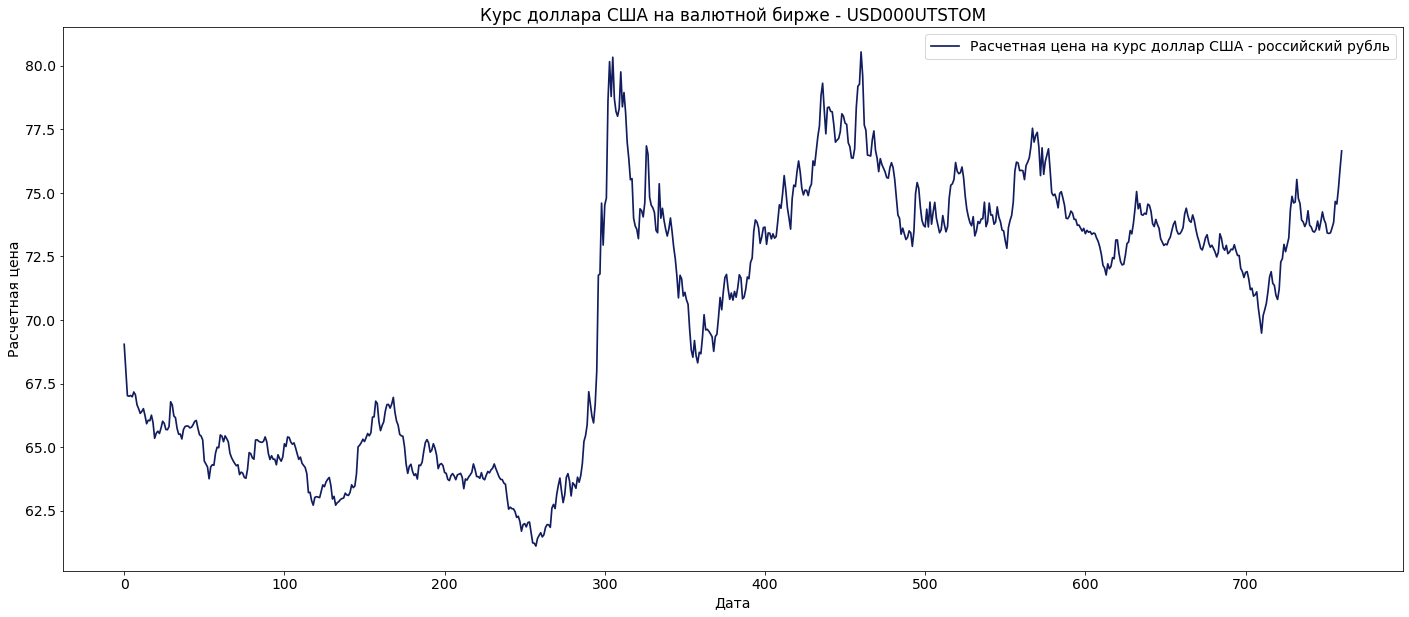

In [257]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_dataset, color='#111d5e', label='Расчетная цена на курс доллар США - российский рубль', linewidth=1.7)
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс доллара США на валютной бирже - USD000UTSTOM')
plt.legend()
plt.show()

# fig.savefig('./fig.savefig('./graphs/Si_TSF.png')/Si_TSF.png')

In [258]:
# Preprocessing
si_dataset = si_dataset.reshape(-1, 1)
si_dataset = si_dataset.astype('float32')
si_dataset.shape

(761, 1)

In [259]:
minmax_scaler = MinMaxScaler()
# robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

si_dataset = standard_scaler.fit_transform(si_dataset)
# si_dataset = robust_scaler.fit_transform(si_dataset)
si_dataset = minmax_scaler.fit_transform(si_dataset)

In [260]:
train_size = int(len(si_dataset)*0.51)
test_size = len(si_dataset) - train_size
si_train = si_dataset[0:train_size,:]
si_test = si_dataset[train_size:len(si_dataset),:]
print(len(si_train), len(si_test))

388 373


In [261]:
time_temp = 7
X_temp = []
Y_temp = []
for i in range(len(si_train)-time_temp-1):
    a = si_train[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(si_train[i + time_temp, 0])
X_train = np.array(X_temp)
y_train = np.array(Y_temp) 

In [262]:
ast = len(si_train)
act = ast-time_temp-1
aaa = si_train[i, 0]
print(ast, act, aaa)

388 380 0.5120602


In [263]:
X_temp = []
Y_temp = []
for i in range(len(si_test)-time_temp-1):
    a = si_test[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(si_test[i + time_temp, 0])
X_test = np.array(X_temp)
y_test = np.array(Y_temp) 

In [264]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [265]:
model = Sequential([
    LSTM(300, input_shape=(1, time_temp)),
    Dense(1)
])

In [266]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [267]:
%%time
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
380/380 [==============================] - 3s 2ms/step - loss: 0.0069
Epoch 2/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 3/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 4/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 5/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 6/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 7/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 8/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 9/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 10/50
380/380 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 11/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 12/50
380/380 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 13/50
380/380 [====

In [268]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = minmax_scaler.inverse_transform(trainPredict)
y_train = minmax_scaler.inverse_transform([y_train])
testPredict = minmax_scaler.inverse_transform(testPredict)
y_test = minmax_scaler.inverse_transform([y_test])

trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.13 RMSE
Test Score: 0.14 RMSE


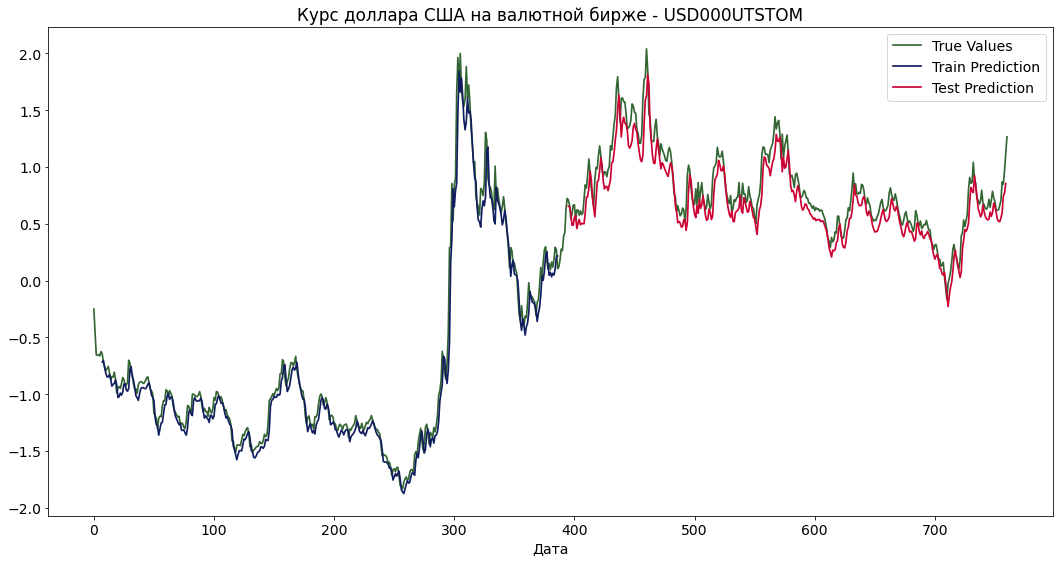

In [269]:
trainPredictPlot = np.empty_like(si_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_temp:len(trainPredict)+time_temp, :] = trainPredict

testPredictPlot = np.empty_like(si_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_temp*2)+1:len(si_dataset)-1, :] = testPredict

fig, ax = plt.subplots(figsize=(18, 9))
plt.plot(minmax_scaler.inverse_transform(si_dataset), label = 'True Values', color='#336633', linewidth=1.7)
plt.plot(trainPredictPlot, label='Train Prediction', color='#111d5e', linewidth=1.7)
plt.plot(testPredictPlot, label = 'Test Prediction', color='#CC0033', linewidth=1.7)
plt.xlabel('Дата')
plt.ylabel('')
plt.title('Курс доллара США на валютной бирже - USD000UTSTOM')
plt.legend()
plt.show()